# Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from IPython.display import display
from datetime import datetime
from google.colab import drive

#Reading the DataSet

## Mount Google Drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load the dataset from Google Drive

In [2]:
file_path = 'Cleaned_Dataset_Week1.csv'
df = pd.read_csv(file_path, encoding='latin1')

In [ ]:
df_subset = df.iloc[:, :19]

## Reading the Data

# Understanding the Dataset / Overview

In [3]:
# Check the first 5 rows
df.head()

,learner_signup_datetime,opportunity_id,opportunity_name,opportunity_category,opportunity_end_date,first_name,date_of_birth,gender,country,institution_name,...,entry_created_at_day,apply_date_year,apply_date_month,apply_date_day,opportunity_start_date_year,opportunity_start_date_month,opportunity_start_date_day,engagement_time,duration_age_interaction,engagement_score
0,2023-06-14,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29,Faria,2001-01-12,Female,Pakistan,Nwihs,...,11,2023,6,14,2022,11,3,223,14496,315.7
1,2023-05-01,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29,Poojitha,2000-08-16,Female,India,Saint Louis University,...,11,2023,5,1,2022,11,3,179,14496,302.5
2,2023-04-09,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29,Emmanuel,2002-01-27,Male,United States,Illinois Institute of Technology,...,11,2023,5,11,2022,11,3,189,13892,305.2
3,2023-08-29,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29,Amrutha Varshini,1999-11-01,Female,United States,Saint Louis University,...,11,2023,10,9,2022,11,3,340,15100,351.1
4,2023-01-06,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29,Vinay Varshith,2000-04-19,Male,United States,Saint Louis University,...,11,2023,1,6,2022,11,3,64,14496,268.0


In [4]:
# overview of dataset
datetime_columns = [
    'learner_signup_datetime', 'opportunity_end_date', 'date_of_birth',
    'entry_created_at', 'apply_date', 'opportunity_start_date'
]

for col in datetime_columns:
    df[col] = pd.to_datetime(df[col])

# Check the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8536 entries, 0 to 8535
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   learner_signup_datetime        8536 non-null   datetime64[ns]
 1   opportunity_id                 8536 non-null   object        
 2   opportunity_name               8536 non-null   object        
 3   opportunity_category           8536 non-null   object        
 4   opportunity_end_date           8536 non-null   datetime64[ns]
 5   first_name                     8534 non-null   object        
 6   date_of_birth                  8536 non-null   datetime64[ns]
 7   gender                         8536 non-null   object        
 8   country                        8536 non-null   object        
 9   institution_name               8536 non-null   object        
 10  current/intended_major         8536 non-null   object        
 11  entry_created_at 

In [5]:
df.columns

Index(['learner_signup_datetime', 'opportunity_id', 'opportunity_name',
       'opportunity_category', 'opportunity_end_date', 'first_name',
       'date_of_birth', 'gender', 'country', 'institution_name',
       'current/intended_major', 'entry_created_at', 'status_description',
       'status_code', 'apply_date', 'opportunity_start_date', 'age',
       'opportunity_duration', 'learner_signup_datetime_year',
       'learner_signup_datetime_month', 'learner_signup_datetime_day',
       'opportunity_end_date_year', 'opportunity_end_date_month',
       'opportunity_end_date_day', 'date_of_birth_year', 'date_of_birth_month',
       'date_of_birth_day', 'entry_created_at_year', 'entry_created_at_month',
       'entry_created_at_day', 'apply_date_year', 'apply_date_month',
       'apply_date_day', 'opportunity_start_date_year',
       'opportunity_start_date_month', 'opportunity_start_date_day',
       'engagement_time', 'duration_age_interaction', 'engagement_score'],
      dtype='object')

In [6]:
df.status_description.unique()

array(['Started', 'Team Allocated', 'Waitlisted', 'Withdraw',
       'Rewards Award', 'Dropped Out', 'Rejected', 'Applied'],
      dtype=object)

## Dataset Overview

The dataset consists of **8,536 entries** (rows) and **39 columns**, providing a comprehensive set of information related to learners' engagement with various opportunities. Here's an overview of the data:

### 1. **Datetime Columns**:
The dataset includes six columns related to dates in `datetime64[ns]` format:
- **`learner_signup_datetime`**: Timestamp of when the learner signed up.
- **`opportunity_end_date`**: The end date of the opportunity.
- **`date_of_birth`**: Learner's date of birth.
- **`entry_created_at`**: The date the entry was created.
- **`apply_date`**: Date when the learner applied.
- **`opportunity_start_date`**: The start date of the opportunity.

### 2. **Personal Information**:
The dataset includes columns with personal information about the learners, including:
- **`first_name`**: First name of the learner (with a small number of missing values: 8534 non-null).
- **`gender`**: Gender of the learner.
- **`country`**: The country the learner is from.
- **`institution_name`**: The name of the institution to which the learner belongs.
- **`current/intended_major`**: The current or intended major of the learner.
- **`age`**: The age of the learner.

### 3. **Opportunity Details**:
The dataset provides details about the opportunities, such as:
- **`opportunity_id`**: A unique identifier for each opportunity.
- **`opportunity_name`**: Name of the opportunity.
- **`opportunity_category`**: The category of the opportunity.
- **`opportunity_duration`**: The duration of the opportunity in days.
- **`status_description`**: Describes the status of the opportunity.
- **`status_code`**: Numeric code representing the status.

### 4. **Date Breakdown**:
Several columns represent the breakdown of various date-related information into year, month, and day, for the following:
- **`learner_signup_datetime`**
- **`opportunity_end_date`**
- **`date_of_birth`**
- **`entry_created_at`**
- **`apply_date`**
- **`opportunity_start_date`**

### 5. **Engagement and Interaction Metrics**:
- **`engagement_time`**: The amount of time the learner engaged with the opportunity.
- **`duration_age_interaction`**: A measure of the interaction's duration based on age.
- **`engagement_score`**: A score representing the learner's engagement level with the opportunity, which is a `float64` type.

### 6. **Data Quality**:
- The dataset contains no missing values for the majority of columns, except for a minor missing value in the **`first_name`** column.
- All columns with numeric data types (`int64` and `float64`) are completely populated, ensuring reliable calculations and analysis.

### Data Types Summary:
- **Object**: 9 columns (including categorical and textual information such as `opportunity_name`, `gender`, `country`, etc.).
- **Integer**: 23 columns (including date breakdowns and status-related codes).
- **Datetime**: 6 columns (storing timestamp information for various events).
- **Float64**: 1 column (`engagement_score`).



## Seeing the describtion of the dataset

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
learner_signup_datetime,8536,NaN,NaN,NaN,2023-09-29 14:49:02.080599808,2023-01-05 00:00:00,2023-07-09 00:00:00,2023-09-21 00:00:00,2024-01-11 00:00:00,2024-04-09 00:00:00,NaN
opportunity_id,8536,23,00000000-0GN2-A0AY-7XK8-C5FZPP,1413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
opportunity_name,8536,22,Career Essentials: Getting Started with Your P...,1413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
opportunity_category,8536,5,Internship,5414,NaN,NaN,NaN,NaN,NaN,NaN,NaN
opportunity_end_date,8536,NaN,NaN,NaN,2024-05-04 07:07:48.978444288,2023-03-01 00:00:00,2024-03-11 00:00:00,2024-03-11 00:00:00,2024-06-29 00:00:00,2025-12-24 00:00:00,NaN
first_name,8534,2881,Bhargavi,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_of_birth,8536,NaN,NaN,NaN,1999-10-02 02:20:31.490159232,1966-08-08 00:00:00,1998-07-25 00:00:00,2000-07-14 00:00:00,2001-12-21 00:00:00,2011-02-17 00:00:00,NaN
gender,8536,4,Male,5006,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,8536,69,United States,3974,NaN,NaN,NaN,NaN,NaN,NaN,NaN
institution_name,8536,1916,Saint Louis University,4522,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Descriptive Statistics Overview

### 1. **Datetime Columns:**
- **`learner_signup_datetime`**:
  - **Min**: 2023-01-05 00:00:00
  - **Max**: 2024-04-09 00:00:00
  - **Mean**: 2023-09-29 14:49:02

- **`opportunity_end_date`**:
  - **Min**: 2023-03-01 00:00:00
  - **Max**: 2025-12-24 00:00:00
  - **Mean**: 2024-05-04 07:07:48

- **`date_of_birth`**:
  - **Min**: 1966-08-08 00:00:00
  - **Max**: 2011-02-17 00:00:00
  - **Mean**: 1999-10-02 02:20:31

- **`entry_created_at`**:
  - **Min**: 2024-03-11 00:00:00
  - **Max**: 2024-03-11 00:00:00
  - **Mean**: 2024-03-11 00:00:00

- **`apply_date`**:
  - **Min**: 2022-10-05 00:00:00
  - **Max**: 2024-04-10 00:00:00
  - **Mean**: 2023-11-24 22:01:24

- **`opportunity_start_date`**:
  - **Min**: 2022-11-03 00:00:00
  - **Max**: 2024-05-31 00:00:00
  - **Mean**: 2023-10-26 07:08:39

### 2. **Categorical Columns:**
- **`opportunity_id`**:
  - **Unique**: 23
  - **Most Frequent (`top`)**: 00000000-0GN2-A0AY-7XK8-C5FZPP
  - **Frequency (`freq`)**: 1413

- **`opportunity_name`**:
  - **Unique**: 22
  - **Most Frequent (`top`)**: Career Essentials: Getting Started with Your P...
  - **Frequency (`freq`)**: 1413

- **`opportunity_category`**:
  - **Unique**: 5
  - **Most Frequent (`top`)**: Internship
  - **Frequency (`freq`)**: 5414

- **`gender`**:
  - **Unique**: 4
  - **Most Frequent (`top`)**: Male
  - **Frequency (`freq`)**: 5006

- **`country`**:
  - **Unique**: 69
  - **Most Frequent (`top`)**: United States
  - **Frequency (`freq`)**: 3974

- **`institution_name`**:
  - **Unique**: 1916
  - **Most Frequent (`top`)**: Saint Louis University
  - **Frequency (`freq`)**: 4522

- **`current/intended_major`**:
  - **Unique**: 343
  - **Most Frequent (`top`)**: Information Systems
  - **Frequency (`freq`)**: 2176

- **`status_description`**:
  - **Unique**: 8
  - **Most Frequent (`top`)**: Rejected
  - **Frequency (`freq`)**: 3563

### 3. **Numerical Columns:**
- **`status_code`**:
  - **Mean**: 1052.202437
  - **Std**: 21.652294

- **`age`**:
  - **Mean**: 24.89
  - **Min**: 14
  - **Max**: 58
  - **Std**: 4.37

- **`opportunity_duration`**:
  - **Mean**: 191.00 days
  - **Min**: -313.0 days (possible data issue)
  - **Max**: 913.0 days
  - **Std**: 240.32

- **Engagement & Interaction**:
  - **`engagement_time`**:
    - **Mean**: 29.62
    - **Min**: -338.0 (possible data issue)
    - **Max**: 490.0
    - **Std**: 133.68

  - **`duration_age_interaction`**:
    - **Mean**: 4742.61
    - **Min**: -8138.0 (possible data issue)
    - **Max**: 52041.0
    - **Std**: 6133.76

  - **`engagement_score`**:
    - **Mean**: 92.75
    - **Min**: -221.2 (possible data issue)
    - **Max**: 448.3
    - **Std**: 127.99

### 4. **Year, Month, Day Columns:**
For each of the datetime columns, the dataset also includes their year, month, and day breakdowns:
- **`learner_signup_datetime_year`**: Mean = 2023.32, Min = 2023, Max = 2024
- **`opportunity_end_date_year`**: Mean = 2024.03, Min = 2023, Max = 2025
- **`date_of_birth_year`**: Mean = 1999.24, Min = 1966, Max = 2011
- **`entry_created_at_year`**: All entries are 2024.
- **`apply_date_year`**: Mean = 2023.56, Min = 2022, Max = 2024
- **`opportunity_start_date_year`**: Mean = 2023.63, Min = 2022, Max = 2024

### Key Observations:
- There are some **negative values** in `opportunity_duration`, `engagement_time`, `duration_age_interaction`, and `engagement_score`, which likely indicate data issues.
- **Most frequent categories**:
  - **Opportunity category**: Internship
  - **Status description**: Rejected
  - **Gender**: Male
  - **Country**: United States

<hr />

## Checking the null data

In [ ]:
# Let's see the null data in our dataset
df.isna().sum()

,0
learner_signup_datetime,0
opportunity_id,0
opportunity_name,0
opportunity_category,0
opportunity_end_date,0
first_name,2
date_of_birth,0
gender,0
country,0
institution_name,0


## Checking the duplicated data

In [ ]:
# Let's see the number of duplicates in the dataset we have
print('The number of duplicated data in our data is: ', df.duplicated().sum())

The number of duplicated data in our data is:  6


In [ ]:
df[df.duplicated()]

,learner_signup_datetime,opportunity_id,opportunity_name,opportunity_category,opportunity_end_date,first_name,date_of_birth,gender,country,institution_name,...,entry_created_at_day,apply_date_year,apply_date_month,apply_date_day,opportunity_start_date_year,opportunity_start_date_month,opportunity_start_date_day,engagement_time,duration_age_interaction,engagement_score
383,2023-06-13,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29,Muhammad,1999-04-01,Male,Pakistan,Abdul Wali Khan University,...,11,2023,6,13,2022,11,3,222,15100,315.7
1315,2023-04-21,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29,Eslam,2001-05-12,Male,Egypt,Alexandria University,...,11,2023,4,21,2022,11,3,169,13892,299.2
1360,2023-08-27,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29,Reddi,2003-12-01,Male,India,Aditya Engineering College,...,11,2023,8,27,2022,11,3,297,12684,337.0
3875,2024-02-04,00000000-0GHB-4N83-QX9K-JM48K2,Project Management,Internship,2024-03-11,Suryadeva,2004-08-07,Male,India,Thiagarajar college of engineering,...,11,2024,2,4,2024,1,8,27,1260,39.3
4869,2024-01-19,00000000-0GWQ-AXC5-X45C-2MHJ28,Data Visualization,Internship,2024-03-11,Warda,2001-11-18,Female,Pakistan,National University of Sciences and Technology,...,11,2024,1,19,2024,1,8,11,1449,35.4
7175,2024-02-04,00000000-10SA-ZXDA-E05A-N2CGAN,Project Management Associate,Internship,2024-04-11,Suryadeva,2004-08-07,Male,India,Thiagarajar college of engineering,...,11,2024,2,5,2024,1,8,28,1880,52.0


In [ ]:
# drop duplicated rows
df.drop_duplicates(inplace=True)


## EDA

Missing values in learner_signup_datetime: 0
Value Counts for learner_signup_datetime:
learner_signup_datetime
2023-07-09    141
2023-01-05    139
2023-06-16    118
2024-01-08    101
2024-01-04     98
             ... 
2023-02-11      1
2023-01-27      1
2023-03-05      1
2023-01-17      1
2023-02-17      1
Name: count, Length: 414, dtype: int64


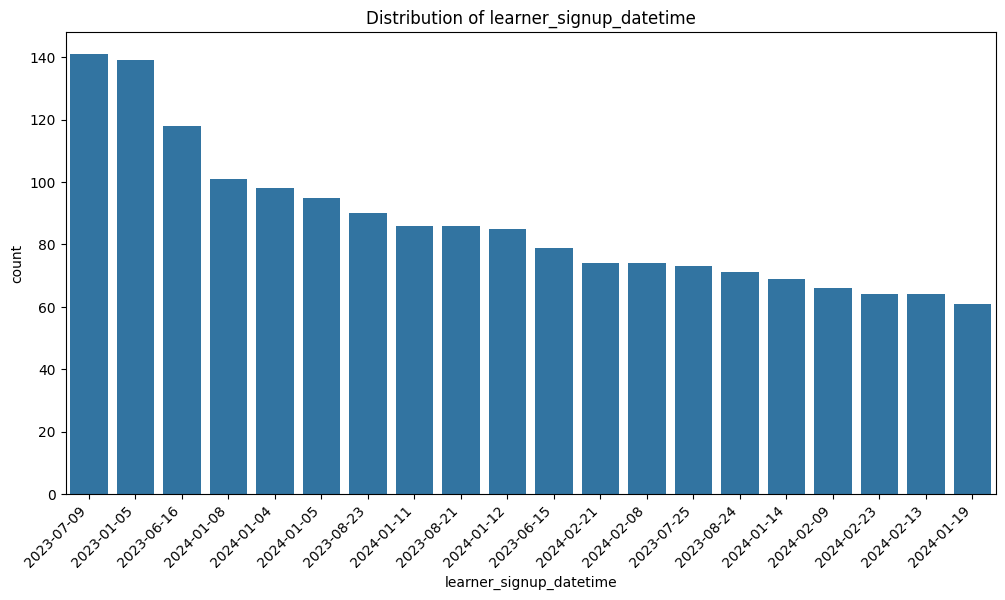

Number of unique values in learner_signup_datetime: 414
Unique values in learner_signup_datetime: ['2023-06-14' '2023-05-01' '2023-04-09' '2023-08-29' '2023-01-06'
 '2024-03-02' '2023-05-31' '2023-07-22' '2023-03-20' '2023-05-11'
 '2023-09-04' '2023-01-28' '2023-08-18' '2023-01-05' '2023-03-16'
 '2023-10-31' '2023-08-08' '2023-08-15' '2023-03-29' '2023-07-08'
 '2023-10-16' '2023-05-05' '2023-05-09' '2023-09-15' '2023-03-17'
 '2023-09-19' '2023-02-21' '2023-03-26' '2023-08-19' '2024-02-08'
 '2023-06-15' '2023-02-23' '2023-11-09' '2023-08-24' '2023-07-25'
 '2023-03-14' '2023-05-16' '2023-02-28' '2023-06-11' '2023-01-18'
 '2023-07-09' '2023-05-18' '2024-01-24' '2023-03-18' '2023-07-20'
 '2023-12-27' '2023-03-11' '2023-08-12' '2023-07-06' '2024-01-11'
 '2023-03-24' '2023-03-07' '2023-08-20' '2023-03-13' '2023-07-13'
 '2023-06-17' '2024-02-10' '2024-01-22' '2023-05-19' '2024-02-07'
 '2023-04-12' '2023-03-27' '2023-06-13' '2023-02-20' '2023-08-22'
 '2023-06-19' '2023-11-20' '2024-02-28' '202

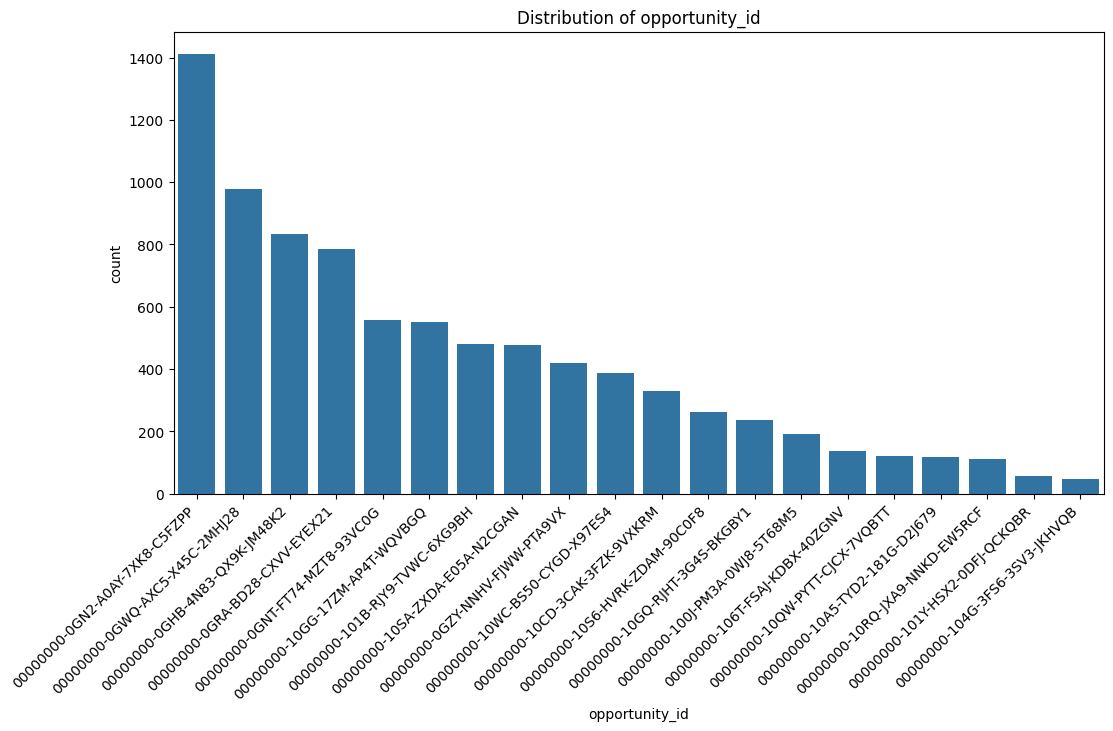

Number of unique values in opportunity_id: 23
Unique values in opportunity_id: ['00000000-0GN2-A0AY-7XK8-C5FZPP' '00000000-0GHG-N3NG-584M-44MK40'
 '00000000-0GNT-FT74-MZT8-93VC0G' '00000000-0GRA-BD28-CXVV-EYEX21'
 '00000000-0GZY-NNHV-FJWW-PTA9VX' '00000000-0GHB-4N83-QX9K-JM48K2'
 '00000000-0GWQ-AXC5-X45C-2MHJ28' '00000000-10WC-BS50-CYGD-X97ES4'
 '00000000-104G-3FS6-3SV3-JKHVQB' '00000000-10WW-X340-GTVH-RR52VF'
 '00000000-10QW-PYTT-CJCX-7VQBTT' '00000000-10YM-B80K-RNNJ-YAVQ7V'
 '00000000-10S6-HVRK-ZDAM-90C0F8' '00000000-101Y-HSX2-0DFJ-QCKQBR'
 '00000000-10GG-17ZM-AP4T-WQVBGQ' '00000000-10CD-3CAK-3FZK-9VXKRM'
 '00000000-10SA-ZXDA-E05A-N2CGAN' '00000000-101B-RJY9-TVWC-6XG9BH'
 '00000000-106T-FSAJ-KDBX-40ZGNV' '00000000-10RQ-JXA9-NNKD-EW5RCF'
 '00000000-10A5-TYD2-181G-D2J679' '00000000-100J-PM3A-0WJ8-5T68M5'
 '00000000-10GQ-RJHT-3G4S-BKGBY1']
The most frequent value in opportunity_id is: 00000000-0GN2-A0AY-7XK8-C5FZPP
Percentage distribution for opportunity_id:
opportunity_id
00000000-0GN2

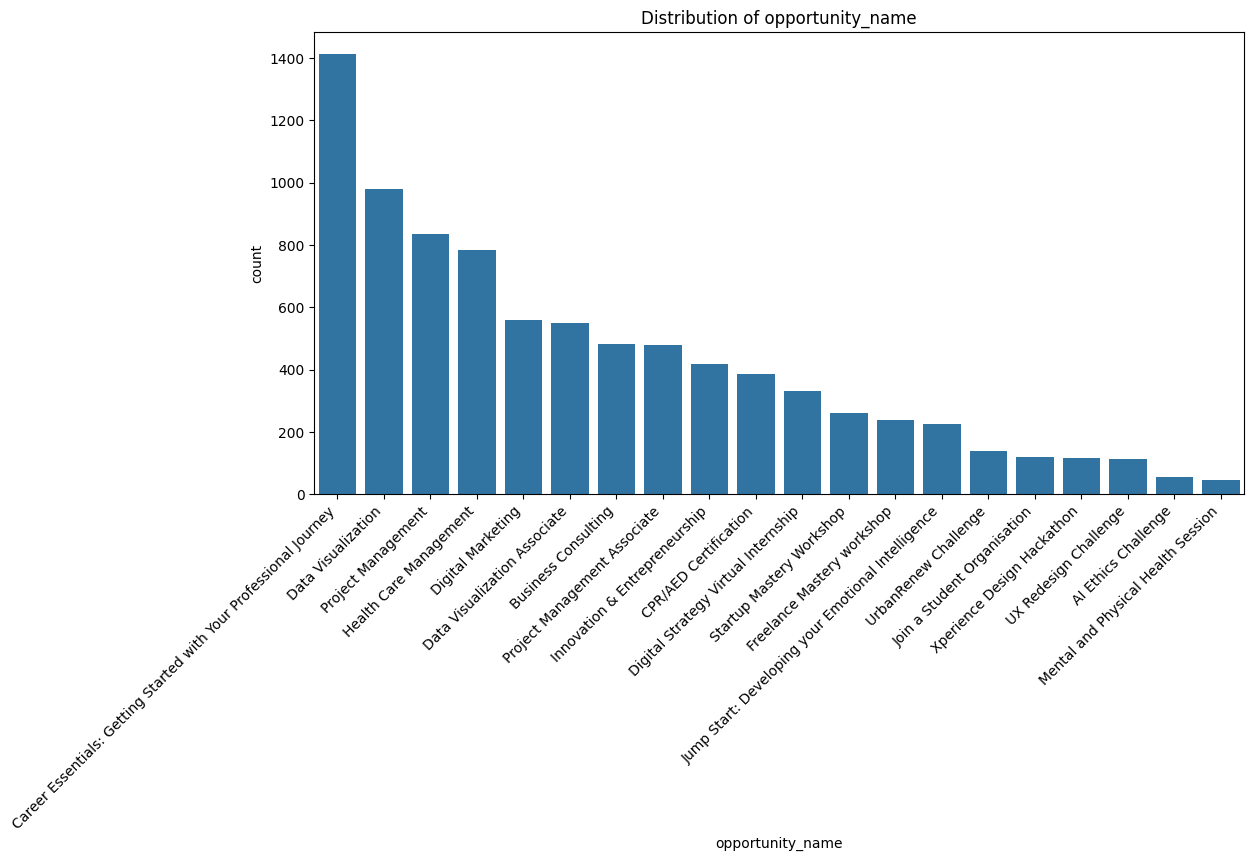

Number of unique values in opportunity_name: 22
Unique values in opportunity_name: ['Career Essentials: Getting Started with Your Professional Journey'
 'Slide Geeks: A Presentation Design Competition' 'Digital Marketing'
 'Health Care Management' 'Innovation & Entrepreneurship'
 'Project Management' 'Data Visualization' 'CPR/AED Certification'
 'Mental and Physical Health Session'
 'Jump Start: Developing your Emotional Intelligence'
 'Join a Student Organisation' 'Upload Your First Year Transcript'
 'Startup Mastery Workshop' 'AI Ethics Challenge'
 'Data Visualization Associate' 'Digital Strategy Virtual Internship'
 'Project Management Associate' 'Business Consulting'
 'UrbanRenew Challenge' 'UX Redesign Challenge'
 'Xperience Design Hackathon' 'Freelance Mastery workshop']
The most frequent value in opportunity_name is: Career Essentials: Getting Started with Your Professional Journey
Percentage distribution for opportunity_name:
opportunity_name
Career Essentials: Getting Started 

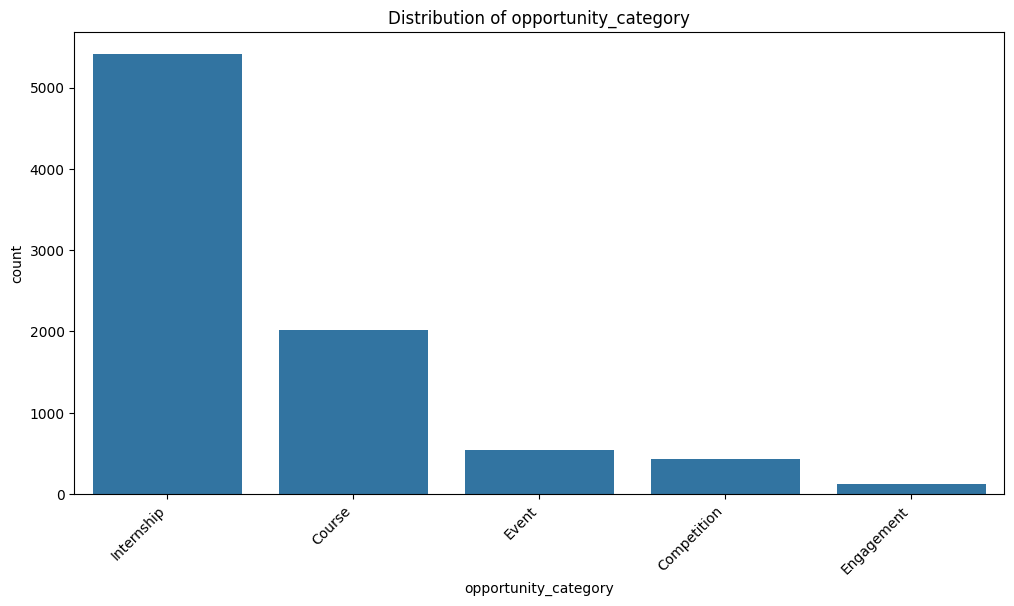

Number of unique values in opportunity_category: 5
Unique values in opportunity_category: ['Course' 'Competition' 'Internship' 'Event' 'Engagement']
The most frequent value in opportunity_category is: Internship
Percentage distribution for opportunity_category:
opportunity_category
Internship     63.425492
Course         23.699625
Event           6.384724
Competition     4.978913
Engagement      1.511246
Name: proportion, dtype: float64
The data type of opportunity_category is: object
Missing values in opportunity_end_date: 0
Value Counts for opportunity_end_date:
opportunity_end_date
2024-03-11    4152
2024-06-29    1413
2024-04-12     784
2024-04-11     478
2024-06-30     386
2024-02-17     262
2024-03-08     237
2025-12-24     192
2025-12-05     152
2024-04-29     138
2024-03-13     116
2024-04-19     112
2023-10-31      55
2024-04-23      46
2025-12-06       9
2023-03-01       4
Name: count, dtype: int64


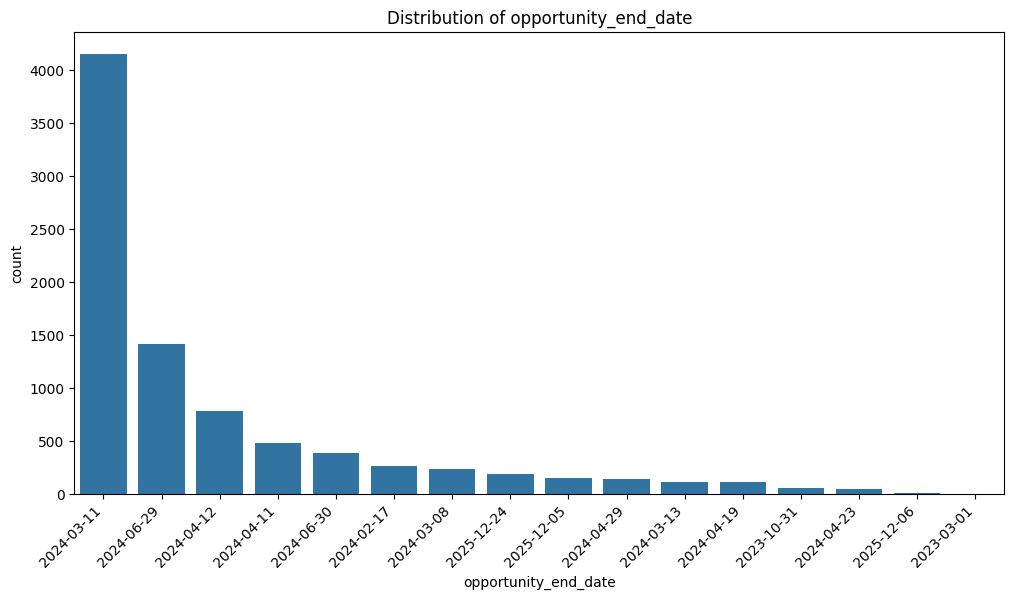

Number of unique values in opportunity_end_date: 16
Unique values in opportunity_end_date: ['2024-06-29' '2023-03-01' '2024-03-11' '2024-04-12' '2024-06-30'
 '2024-04-23' '2025-12-05' '2025-12-06' '2024-02-17' '2023-10-31'
 '2024-04-11' '2024-04-29' '2024-04-19' '2024-03-13' '2025-12-24'
 '2024-03-08']
The most frequent value in opportunity_end_date is: 2024-03-11
Percentage distribution for opportunity_end_date:
opportunity_end_date
2024-03-11    48.641050
2024-06-29    16.553421
2024-04-12     9.184630
2024-04-11     5.599813
2024-06-30     4.522024
2024-02-17     3.069353
2024-03-08     2.776476
2025-12-24     2.249297
2025-12-05     1.780694
2024-04-29     1.616682
2024-03-13     1.358950
2024-04-19     1.312090
2023-10-31     0.644330
2024-04-23     0.538894
2025-12-06     0.105436
2023-03-01     0.046860
Name: proportion, dtype: float64
The data type of opportunity_end_date is: object
Missing values in first_name: 2
Value Counts for first_name:
first_name
Bhargavi          40
Vai

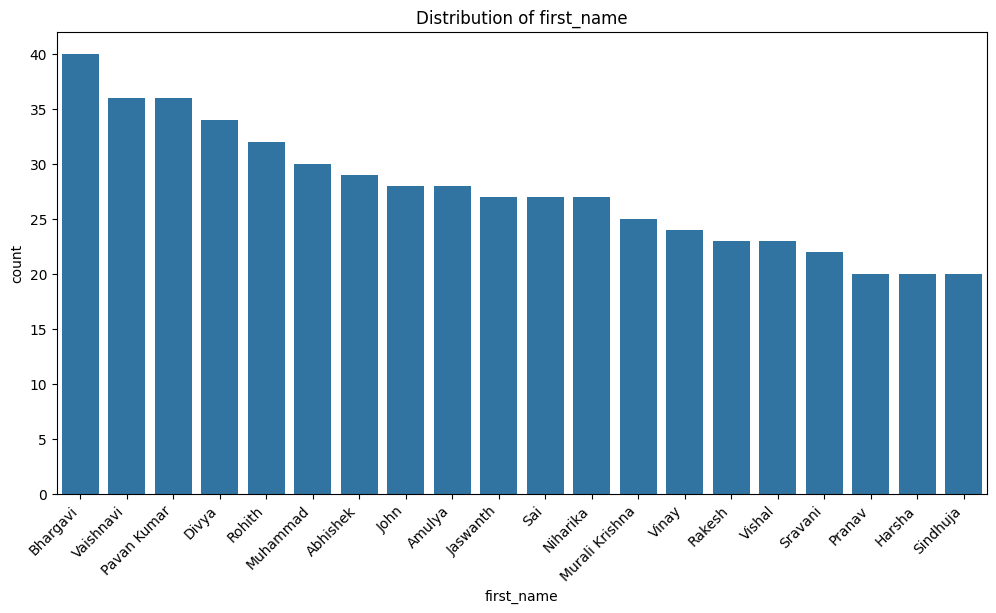

Number of unique values in first_name: 2881
Unique values in first_name: ['Faria' 'Poojitha' 'Emmanuel' ... 'Gobburi' 'Saathwika' 'Fabian']
The most frequent value in first_name is: Bhargavi
Percentage distribution for first_name:
first_name
Bhargavi          0.468713
Vaishnavi         0.421842
Pavan Kumar       0.421842
Divya             0.398406
Rohith            0.374971
                    ...   
Gnana Sandeeep    0.011718
Anmol             0.011718
Jaewoo            0.011718
Tanvitha          0.011718
Fabian            0.011718
Name: proportion, Length: 2881, dtype: float64
The data type of first_name is: object
Missing values in date_of_birth: 0
Value Counts for date_of_birth:
date_of_birth
2001-05-20    29
2002-09-17    28
2000-09-17    28
2001-11-15    25
2000-06-21    24
              ..
2000-08-06     1
1996-05-08     1
1996-05-20     1
2002-03-17     1
2008-02-19     1
Name: count, Length: 2611, dtype: int64


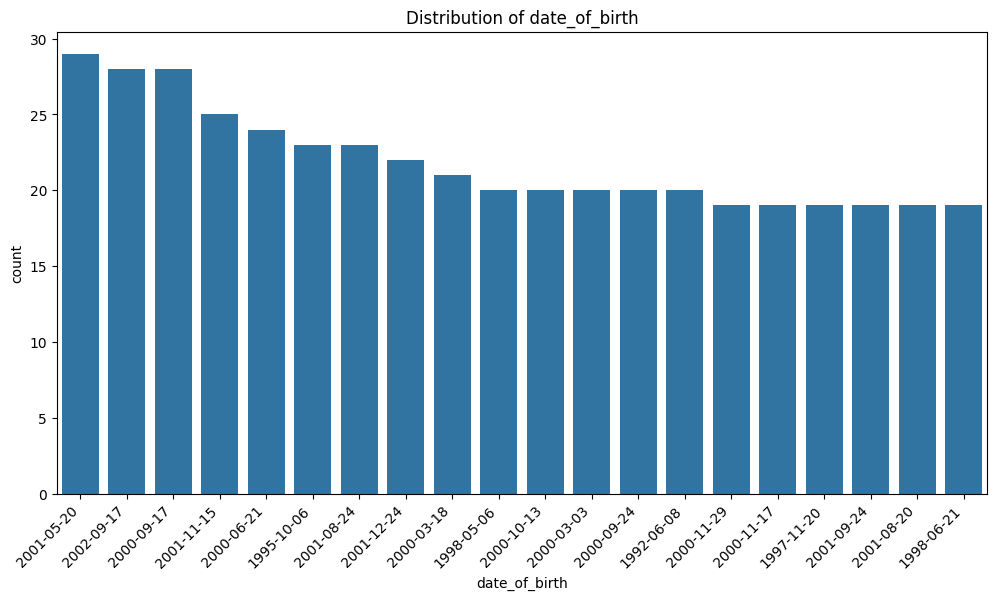

Number of unique values in date_of_birth: 2611
Unique values in date_of_birth: ['2001-01-12' '2000-08-16' '2002-01-27' ... '2003-11-04' '2002-02-09'
 '2008-02-19']
The most frequent value in date_of_birth is: 2001-05-20
Percentage distribution for date_of_birth:
date_of_birth
2001-05-20    0.339738
2002-09-17    0.328022
2000-09-17    0.328022
2001-11-15    0.292877
2000-06-21    0.281162
                ...   
2000-08-06    0.011715
1996-05-08    0.011715
1996-05-20    0.011715
2002-03-17    0.011715
2008-02-19    0.011715
Name: proportion, Length: 2611, dtype: float64
The data type of date_of_birth is: object
Missing values in gender: 0
Value Counts for gender:
gender
Male                     5006
Female                   3512
Don't want to specify      15
Other                       3
Name: count, dtype: int64


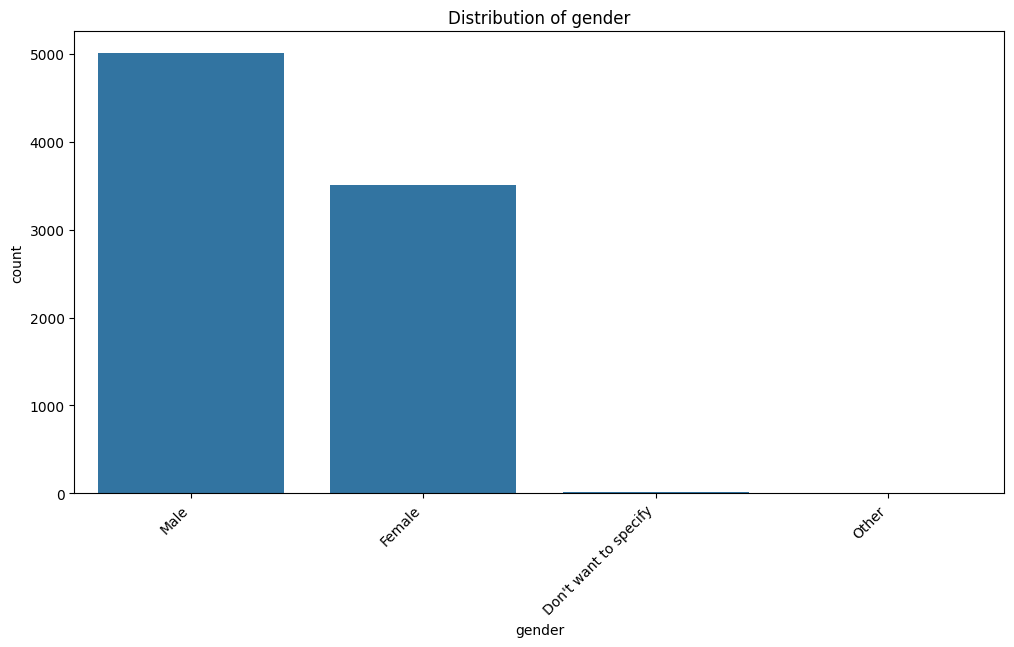

Number of unique values in gender: 4
Unique values in gender: ['Female' 'Male' "Don't want to specify" 'Other']
The most frequent value in gender is: Male
Percentage distribution for gender:
gender
Male                     58.645736
Female                   41.143393
Don't want to specify     0.175726
Other                     0.035145
Name: proportion, dtype: float64
The data type of gender is: object
Missing values in country: 0
Value Counts for country:
country
United States    3974
India            2817
Nigeria           760
Ghana             275
Pakistan          218
                 ... 
Honduras            1
Uzbekistan          1
Somalia             1
Liberia             1
Spain               1
Name: count, Length: 69, dtype: int64


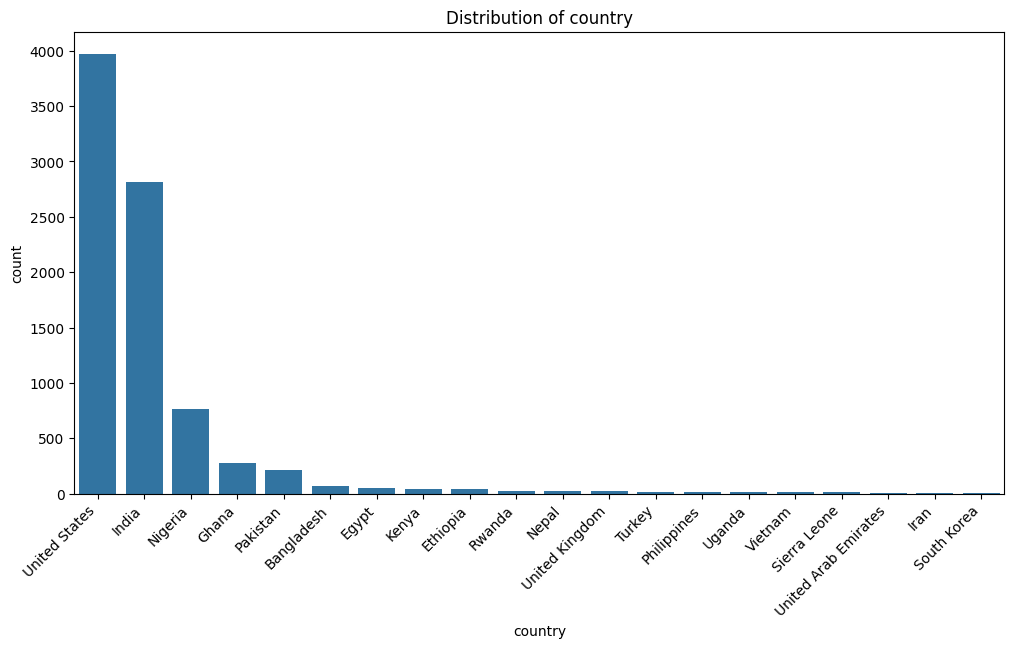

Number of unique values in country: 69
Unique values in country: ['Pakistan' 'India' 'United States' 'United Arab Emirates' 'Nigeria'
 'Egypt' 'Nepal' 'Kenya' 'Ghana' 'Zambia' 'Morocco' 'Ethiopia' 'Zimbabwe'
 'Uganda' 'Indonesia' 'Cameroon' 'Yemen' 'China' 'Bangladesh' 'Congo'
 'Liberia' 'United Kingdom' 'Vietnam' 'Japan' 'Rwanda' 'Gambia'
 'Philippines' 'Australia' 'Somalia' 'Sierra Leone' 'Lebanon' 'Botswana'
 'Iraq' 'Uzbekistan' 'Turkey' 'Honduras' 'Tanzania' 'France' 'Belarus'
 'Algeria' 'South Korea' 'Mauritius' 'Tunisia' 'Kazakhstan' 'Peru'
 'Brazil' 'Ukraine' 'South Africa' 'Germany' 'Namibia' 'Iran'
 'American Samoa' 'Falkland Islands (Malvinas)' 'Saudi Arabia' 'Sri Lanka'
 'Azerbaijan' 'Dominican Republic' 'Lesotho' 'Malaysia'
 'Virgin Islands, U.S.' 'Qatar' 'Canada' 'Singapore' 'Ireland' 'Libya'
 "Cote d'Ivoire" 'Afghanistan' 'Bhutan' 'Spain']
The most frequent value in country is: United States
Percentage distribution for country:
country
United States    46.555764
India    

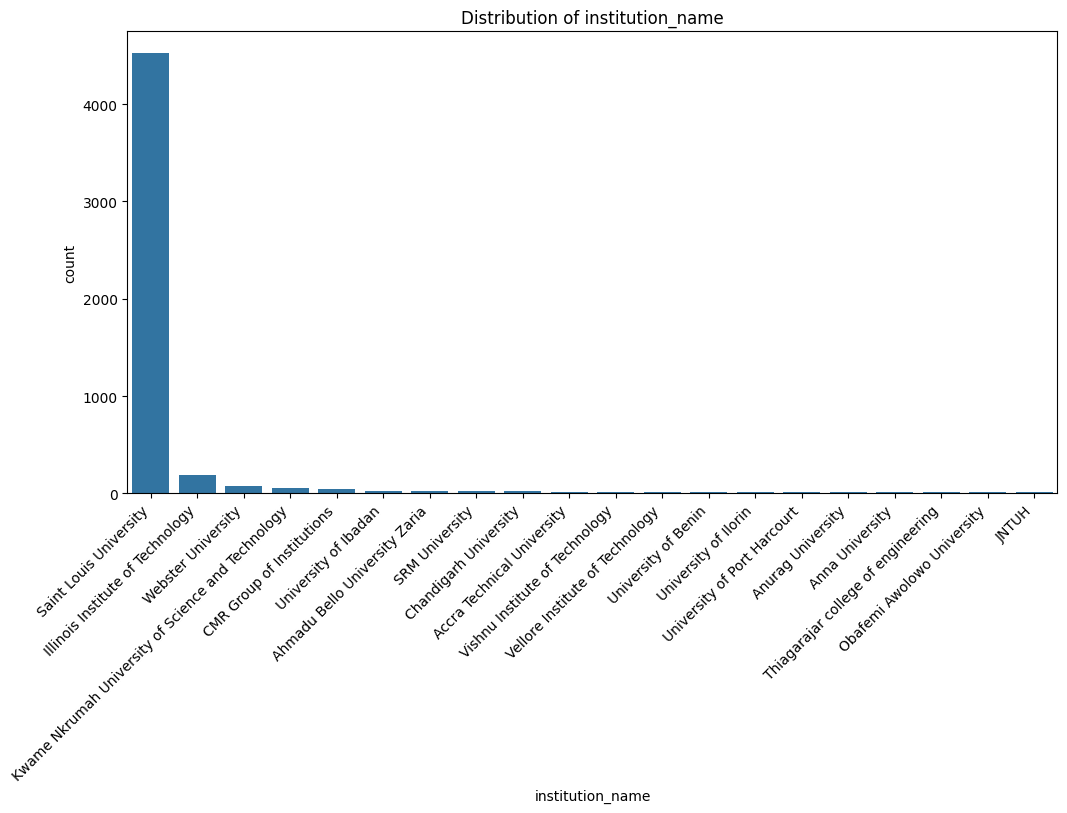

Number of unique values in institution_name: 1916
Unique values in institution_name: ['Nwihs' 'Saint Louis University' 'Illinois Institute of Technology' ...
 'Jawaharlal Nehru technological University of Hyderabad'
 'Kwara state University' 'Tai Solarin university of Education']
The most frequent value in institution_name is: Saint Louis University
Percentage distribution for institution_name:
institution_name
Saint Louis University                                52.975633
Illinois Institute of Technology                       2.155576
Webster University                                     0.843486
Kwame Nkrumah University of Science and Technology     0.644330
CMR Group of Institutions                              0.503749
                                                        ...    
Kurukshetra University                                 0.011715
Uet taxila                                             0.011715
Limkokwing University of Creative Technology           0.011715
IIT(ISM) 

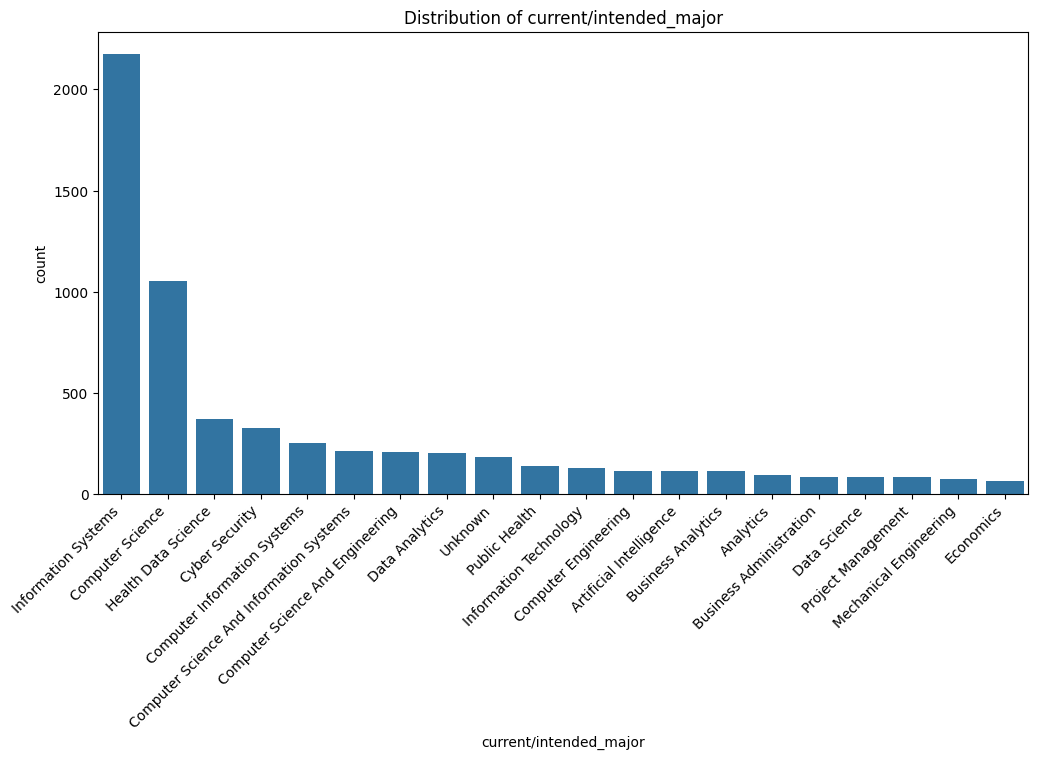

Number of unique values in current/intended_major: 343
Unique values in current/intended_major: ['Radiology' 'Information Systems' 'Computer Science'
 'Mechanical Engineering' 'Computer Science And Engineering'
 'Artificial Intelligence' 'Robotics And Automation Engineering'
 'Data Visualization' 'Business Administration' 'Public Health'
 'Architecture' 'Computer Science And Information Systems' 'Biology'
 'Economics' 'Unknown' 'Mathematics' 'Bioinformatics'
 'Biomedical Engineering' 'Electrical And Electronic Engineering'
 'Business And Management Studies' 'Accounting And Finance' 'Secretarial'
 'Data Science' 'Statistics' 'Computer Information Systems'
 'Management Information Systems' 'Project Management' 'Medicine'
 'Information' 'Information Technology' 'Actuarial Mathematics'
 'Software Engineering' 'Biological Sciences'
 'Urban And Housing Development' 'Human Resources' 'Cyber Security'
 'Data Analytics' 'Computer Engineering' 'Environmental Sciences'
 'Philosophy' 'Law And Lega

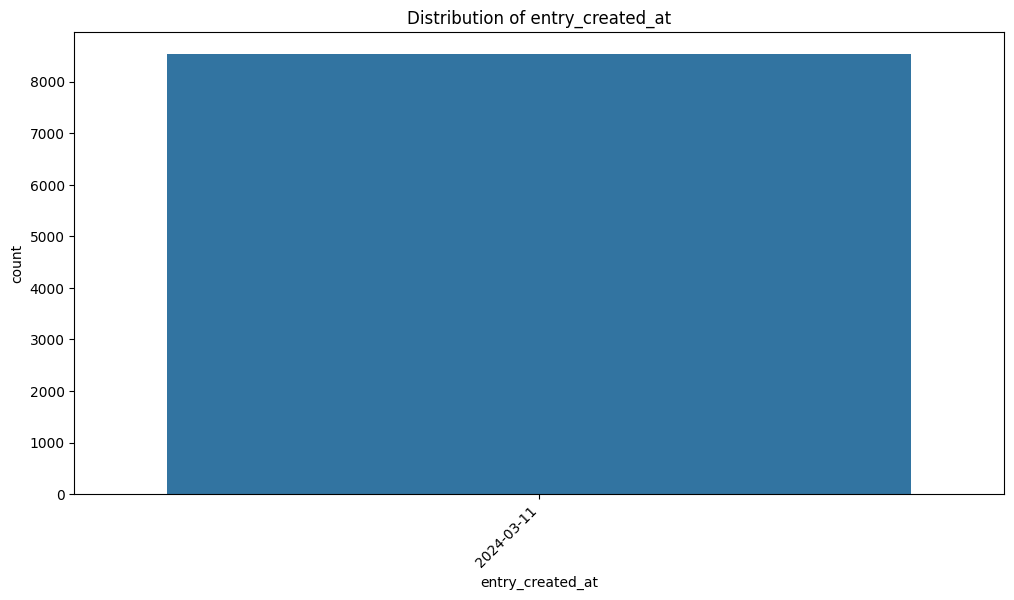

Number of unique values in entry_created_at: 1
Unique values in entry_created_at: ['2024-03-11']
The most frequent value in entry_created_at is: 2024-03-11
Percentage distribution for entry_created_at:
entry_created_at
2024-03-11    100.0
Name: proportion, dtype: float64
The data type of entry_created_at is: object
Missing values in status_description: 0
Value Counts for status_description:
status_description
Rejected          3563
Team Allocated    3267
Started            764
Dropped Out        617
Waitlisted         107
Applied            105
Withdraw            84
Rewards Award       29
Name: count, dtype: int64


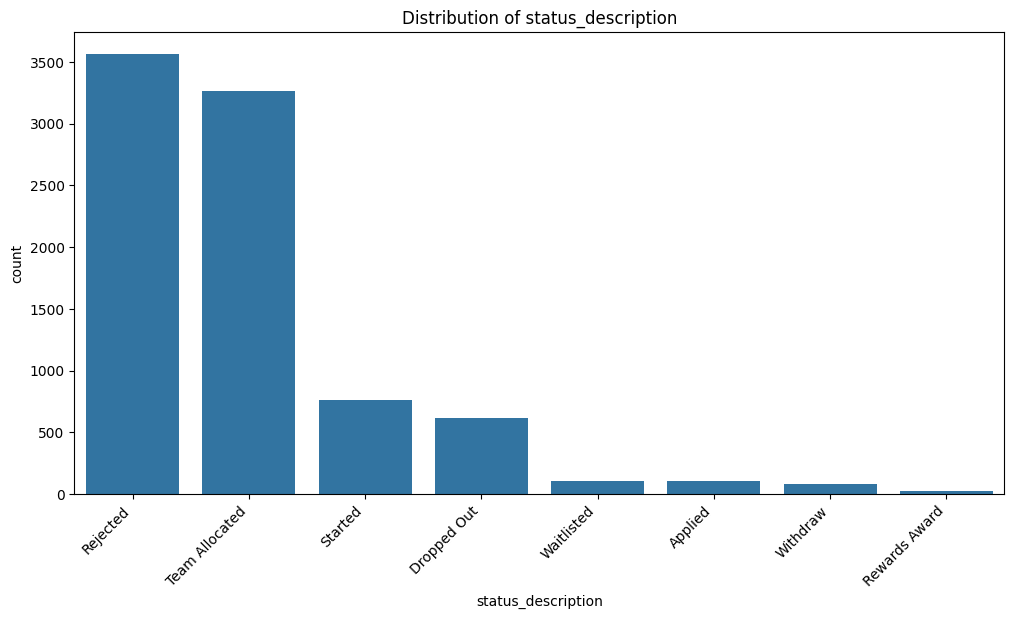

Number of unique values in status_description: 8
Unique values in status_description: ['Started' 'Team Allocated' 'Waitlisted' 'Withdraw' 'Rewards Award'
 'Dropped Out' 'Rejected' 'Applied']
The most frequent value in status_description is: Rejected
Percentage distribution for status_description:
status_description
Rejected          41.740862
Team Allocated    38.273196
Started            8.950328
Dropped Out        7.228210
Waitlisted         1.253515
Applied            1.230084
Withdraw           0.984067
Rewards Award      0.339738
Name: proportion, dtype: float64
The data type of status_description is: object
Missing values in status_code: 0
Value Counts for status_code:
status_code
1030    3563
1070    3267
1080     764
1050     617
1040     107
1010     105
1110      84
1120      29
Name: count, dtype: int64


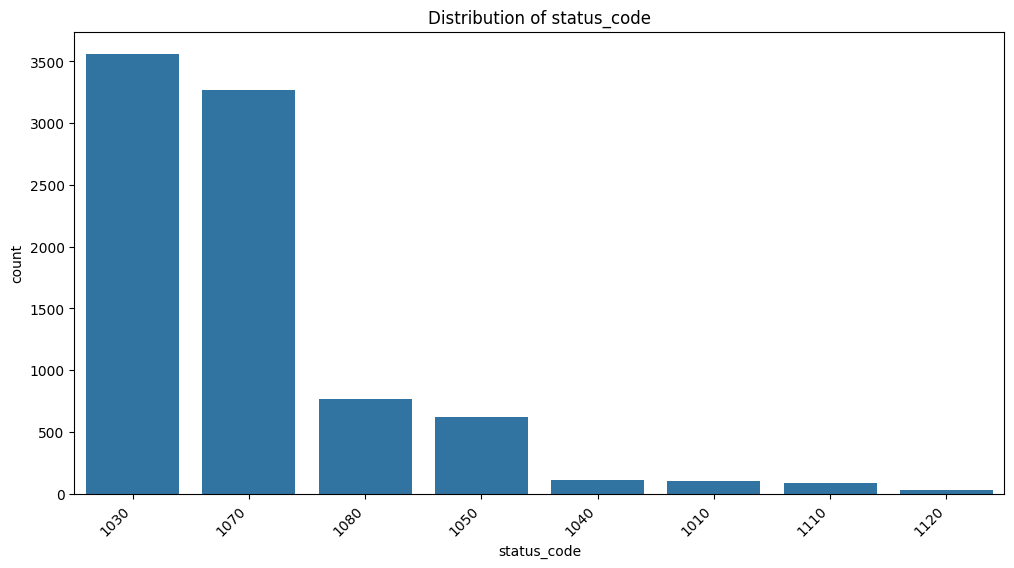

Number of unique values in status_code: 8
Unique values in status_code: [1080 1070 1040 1110 1120 1050 1030 1010]
The most frequent value in status_code is: 1030
Percentage distribution for status_code:
status_code
1030    41.740862
1070    38.273196
1080     8.950328
1050     7.228210
1040     1.253515
1010     1.230084
1110     0.984067
1120     0.339738
Name: proportion, dtype: float64
The data type of status_code is: int64


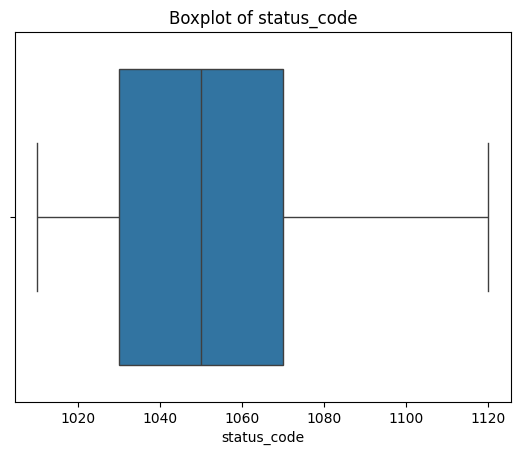

Missing values in apply_date: 0
Value Counts for apply_date:
apply_date
2024-01-05    160
2024-01-08    139
2024-01-04    126
2024-01-24    115
2024-01-29    110
             ... 
2022-10-14      1
2022-11-03      1
2022-10-30      1
2023-03-05      1
2022-10-13      1
Name: count, Length: 441, dtype: int64


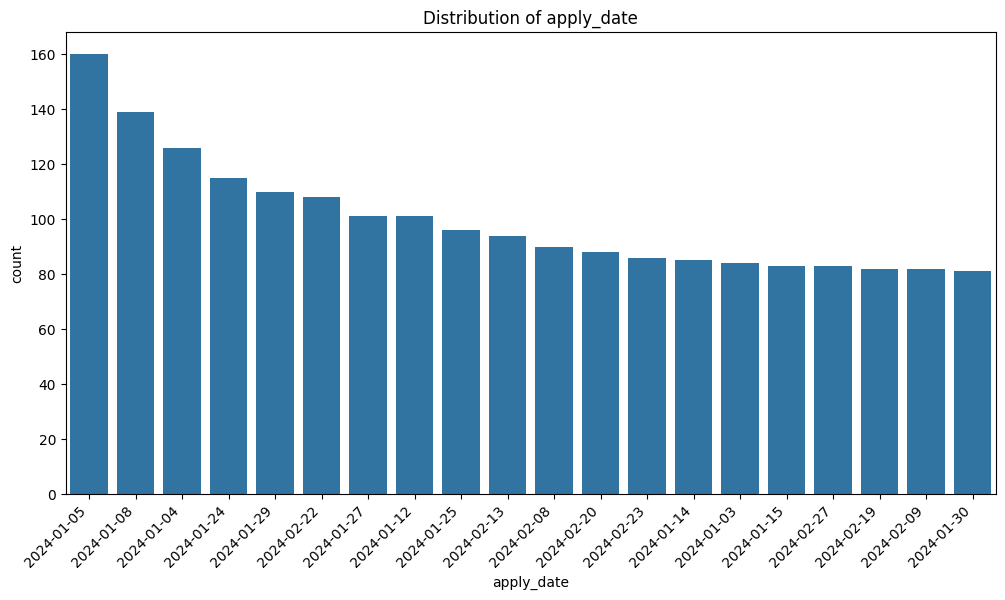

Number of unique values in apply_date: 441
Unique values in apply_date: ['2023-06-14' '2023-05-01' '2023-05-11' '2023-10-09' '2023-01-06'
 '2024-03-02' '2023-07-22' '2023-05-24' '2023-12-17' '2023-09-04'
 '2023-01-30' '2024-01-24' '2022-11-10' '2023-04-02' '2023-10-31'
 '2023-08-08' '2023-09-01' '2023-03-29' '2023-07-09' '2023-10-19'
 '2023-06-04' '2023-05-09' '2022-10-30' '2024-02-05' '2023-03-17'
 '2024-03-03' '2023-06-02' '2023-03-26' '2023-08-19' '2024-02-08'
 '2023-06-15' '2024-01-06' '2023-11-09' '2023-08-24' '2023-08-11'
 '2023-03-14' '2023-08-21' '2023-07-24' '2023-02-28' '2022-10-10'
 '2023-03-25' '2023-05-18' '2023-09-21' '2023-03-18' '2024-01-17'
 '2024-03-04' '2023-03-11' '2023-09-03' '2023-07-06' '2024-02-21'
 '2023-08-18' '2023-03-24' '2023-03-07' '2023-08-20' '2023-03-13'
 '2023-06-16' '2023-07-13' '2023-06-17' '2024-02-10' '2023-09-07'
 '2024-01-22' '2023-05-19' '2024-02-11' '2023-04-15' '2023-03-27'
 '2023-06-13' '2023-06-18' '2023-06-11' '2023-08-23' '2023-06-19'
 '20

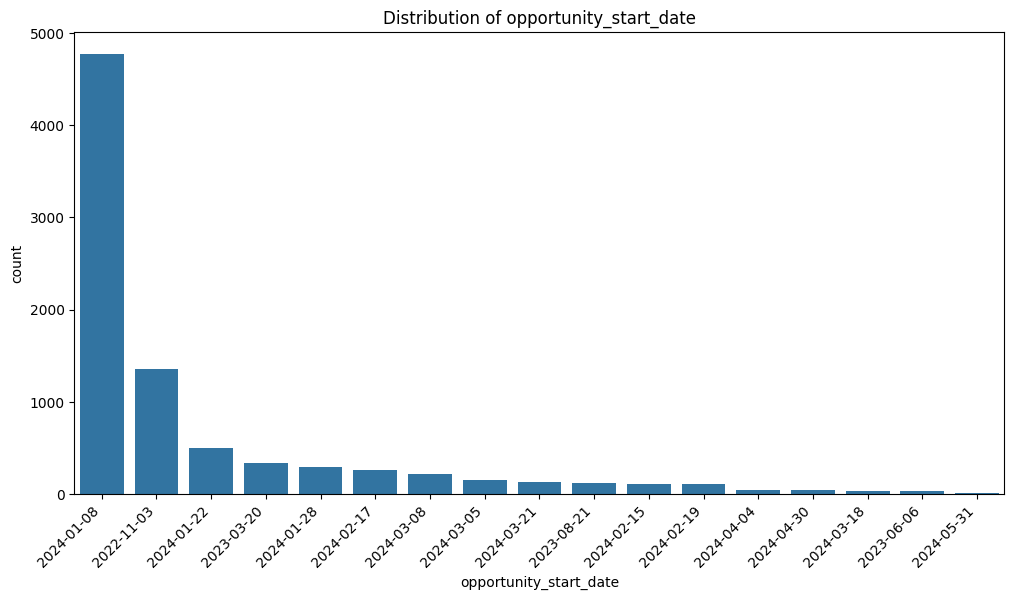

Number of unique values in opportunity_start_date: 17
Unique values in opportunity_start_date: ['2022-11-03' '2024-01-08' '2024-01-22' '2024-02-19' '2024-03-05'
 '2024-03-18' '2024-04-04' '2023-03-20' '2024-04-30' '2023-06-06'
 '2023-08-21' '2024-05-31' '2024-02-17' '2024-03-21' '2024-02-15'
 '2024-01-28' '2024-03-08']
The most frequent value in opportunity_start_date is: 2024-01-08
Percentage distribution for opportunity_start_date:
opportunity_start_date
2024-01-08    55.904405
2022-11-03    15.838800
2024-01-22     5.845829
2023-03-20     3.983130
2024-01-28     3.502812
2024-02-17     3.069353
2024-03-08     2.600750
2024-03-05     1.792409
2024-03-21     1.593252
2023-08-21     1.370665
2024-02-15     1.288660
2024-02-19     1.241799
2024-04-04     0.574039
2024-04-30     0.503749
2024-03-18     0.421743
2023-06-06     0.374883
2024-05-31     0.093721
Name: proportion, dtype: float64
The data type of opportunity_start_date is: object
Missing values in age: 0
Value Counts for age:


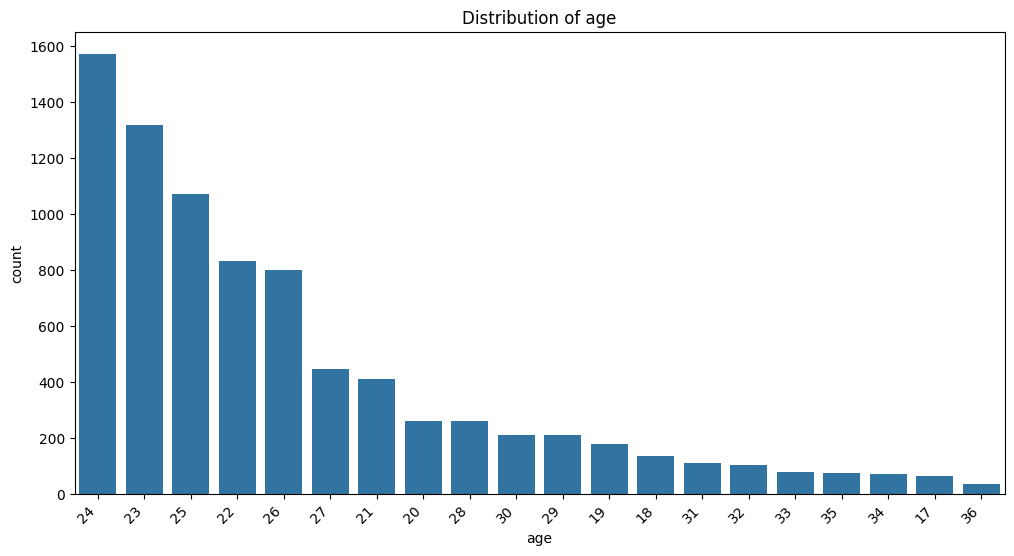

Number of unique values in age: 42
Unique values in age: [24 23 25 28 18 19 26 27 20 30 33 22 21 29 40 31 34 35 41 39 17 37 43 53
 14 48 42 32 15 38 36 50 44 47 16 49 57 45 51 46 52 58]
The most frequent value in age is: 24
Percentage distribution for age:
age
24    18.404405
23    15.463918
25    12.558575
22     9.746954
26     9.395501
27     5.236645
21     4.803187
20     3.069353
28     3.057638
30     2.495314
29     2.483599
19     2.097001
18     1.593252
31     1.323805
32     1.230084
33     0.948922
35     0.890347
34     0.866917
17     0.773196
36     0.445173
37     0.374883
38     0.328022
16     0.281162
39     0.234302
14     0.222587
47     0.210872
40     0.210872
43     0.199157
15     0.175726
41     0.164011
48     0.164011
44     0.152296
42     0.082006
45     0.082006
57     0.058575
46     0.046860
49     0.046860
53     0.023430
52     0.023430
50     0.011715
51     0.011715
58     0.011715
Name: proportion, dtype: float64
The data type of age is: int64


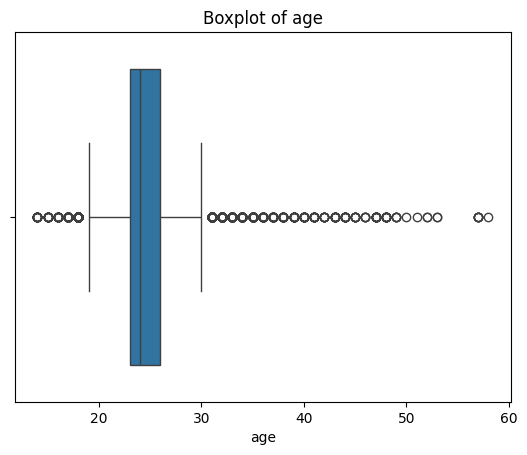

Missing values in opportunity_duration: 0
Value Counts for opportunity_duration:
opportunity_duration
 63     3419
 604    1352
 95      782
 0       484
 49      431
 94      370
 468     340
 696     186
 39      136
 6       133
 837     117
 45      113
 64      110
 21       96
-7        73
 80       68
 173      61
-69       55
 174      46
-24       43
 913      32
 37       20
 60       15
 554       8
 52        8
 24        6
 7         6
 716       6
-313       4
 697       3
 106       3
 65        3
 112       2
 102       2
 53        2
 698       1
Name: count, dtype: int64


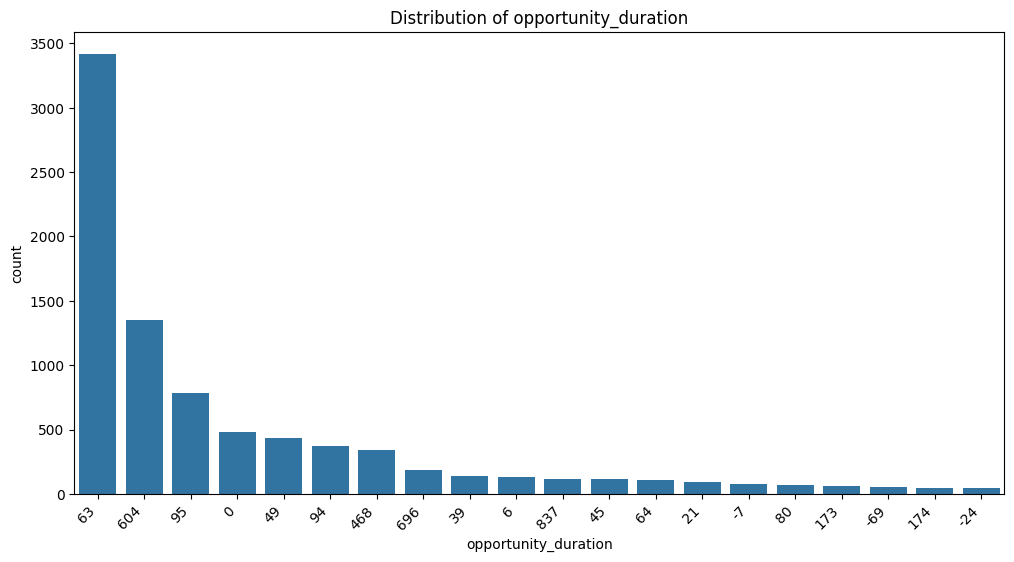

Number of unique values in opportunity_duration: 36
Unique values in opportunity_duration: [ 604  173 -313   63   49   21    6   -7  -24   95   53  468  174  106
  913  837  697  554  698    0  -69   80   94   37   52   24    7   39
  112   64  102   45   65  696  716   60]
The most frequent value in opportunity_duration is: 63
Percentage distribution for opportunity_duration:
opportunity_duration
 63     40.053889
 604    15.838800
 95      9.161200
 0       5.670103
 49      5.049203
 94      4.334583
 468     3.983130
 696     2.179007
 39      1.593252
 6       1.558107
 837     1.370665
 45      1.323805
 64      1.288660
 21      1.124649
-7       0.855201
 80      0.796626
 173     0.714620
-69      0.644330
 174     0.538894
-24      0.503749
 913     0.374883
 37      0.234302
 60      0.175726
 554     0.093721
 52      0.093721
 24      0.070291
 7       0.070291
 716     0.070291
-313     0.046860
 697     0.035145
 106     0.035145
 65      0.035145
 112     0.023430
 102 

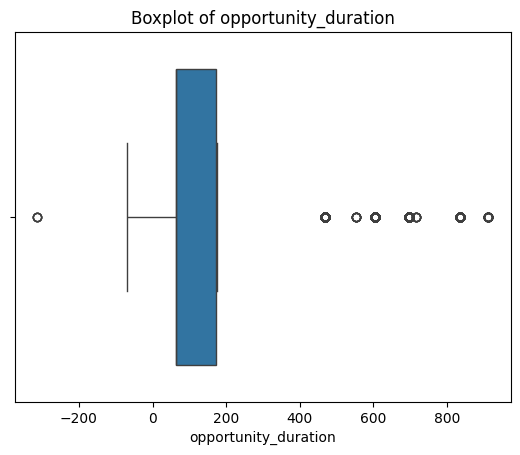

Missing values in learner_signup_datetime_year: 0
Value Counts for learner_signup_datetime_year:
learner_signup_datetime_year
2023    5773
2024    2763
Name: count, dtype: int64


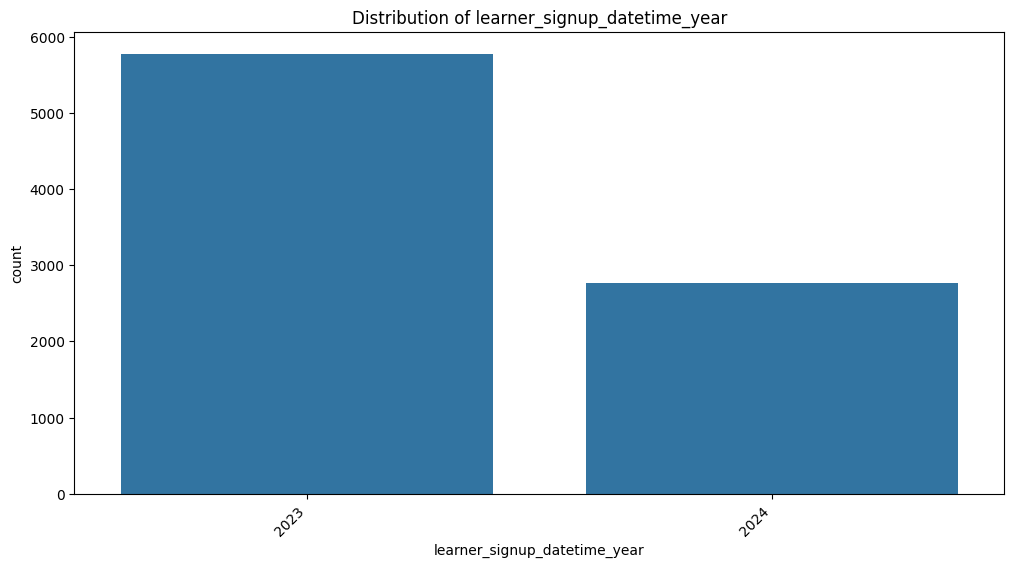

Number of unique values in learner_signup_datetime_year: 2
Unique values in learner_signup_datetime_year: [2023 2024]
The most frequent value in learner_signup_datetime_year is: 2023
Percentage distribution for learner_signup_datetime_year:
learner_signup_datetime_year
2023    67.631209
2024    32.368791
Name: proportion, dtype: float64
The data type of learner_signup_datetime_year is: int64


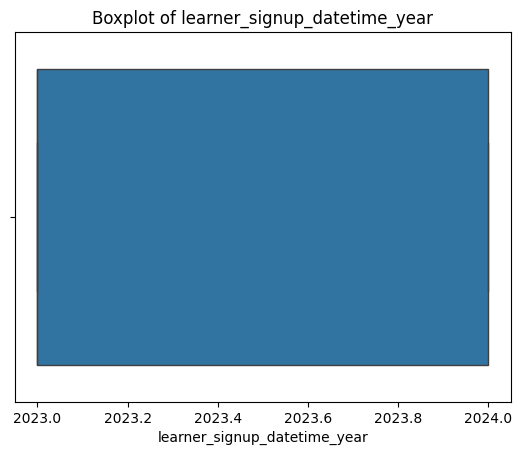

In [ ]:
def analyzeing(df, column_name):
    # 1. Check for missing data
    missing_values = df[column_name].isnull().sum()
    print(f"Missing values in {column_name}: {missing_values}")

    # 2. Value Counts - Check how often each unique value appears
    value_counts = df[column_name].value_counts()
    print(f"Value Counts for {column_name}:\n{value_counts}")

   # 3 Visualizing distribution
    plt.figure(figsize=(12, 6))
    top_values = df[column_name].value_counts().nlargest(20).index  # Show top 20 only
    sns.countplot(data=df[df[column_name].isin(top_values)], x=column_name, order=top_values)
    plt.title(f'Distribution of {column_name}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

    # 4. Unique values in the column
    unique_values = df[column_name].nunique()
    print(f"Number of unique values in {column_name}: {unique_values}")

    # 5. print the unique values in the column
    unique_values_list = df[column_name].unique()
    print(f"Unique values in {column_name}: {unique_values_list}")

    # 6. Check for the most frequent value (Mode)
    mode_value = df[column_name].mode()[0]
    print(f"The most frequent value in {column_name} is: {mode_value}")

    # 7. Frequency distribution (percentage)
    frequency_distribution = df[column_name].value_counts(normalize=True) * 100
    print(f"Percentage distribution for {column_name}:\n{frequency_distribution}")

    # 8. Check data type
    column_dtype = df[column_name].dtype
    print(f"The data type of {column_name} is: {column_dtype}")

    # 9. If numeric, check for outliers
    if df[column_name].dtype in ['int64', 'float64']:
        sns.boxplot(x=df[column_name])
        plt.title(f"Boxplot of {column_name}")
        plt.show()

# Apply analysis to each sub_column
for col in df_subset.columns:
    analyzeing(df_subset, col)

### learner_signup_datetime_month

Missing values in learner_signup_datetime_month: 0
Value Counts for learner_signup_datetime_month:
learner_signup_datetime_month
1     1766
2     1160
8     1138
6      752
7      712
9      683
12     659
10     423
5      406
3      315
4      292
11     224
Name: count, dtype: int64


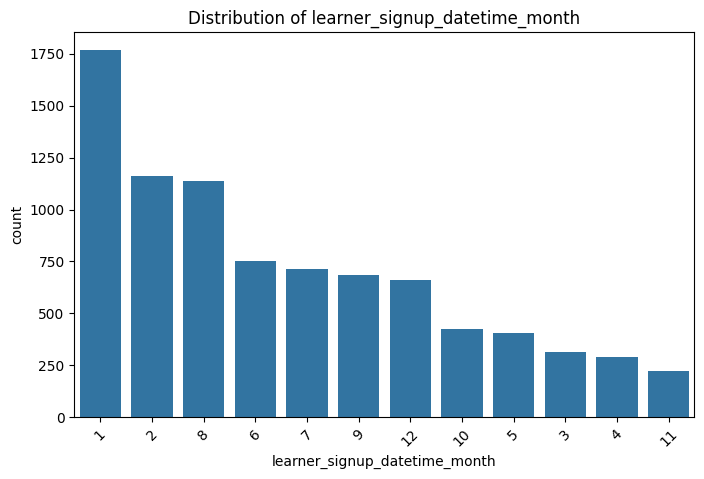

Number of unique values in learner_signup_datetime_month: 12
Unique values in learner_signup_datetime_month: [ 6  5  4  8  1  3  7  9 10  2 11 12]
The most frequent value in learner_signup_datetime_month is: 1
Percentage distribution for learner_signup_datetime_month:
learner_signup_datetime_month
1     20.703400
2     13.599062
8     13.341149
6      8.815944
7      8.347011
9      8.007034
12     7.725674
10     4.958968
5      4.759672
3      3.692849
4      3.423212
11     2.626026
Name: proportion, dtype: float64
The data type of learner_signup_datetime_month is: int64


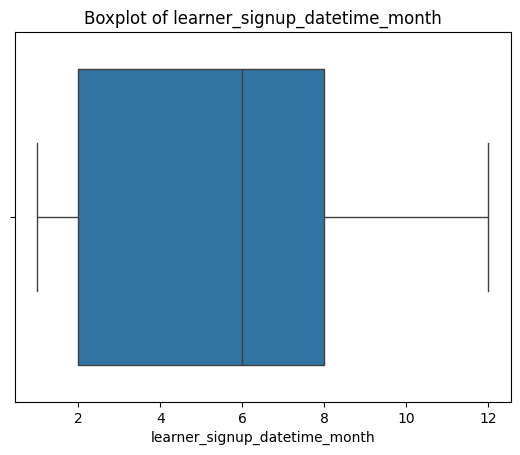

In [ ]:
# Call the function to analyze the 'learner_signup_datetime_month' column
analyzeing(df, 'learner_signup_datetime_month')

### Findings for `learner_signup_datetime_month` Column

- **Missing values in `learner_signup_datetime_month`:** 0
  - There are no missing values in this column, so it is complete.

- **Value Counts for `learner_signup_datetime_month`:**
  - The distribution of `learner_signup_datetime_month` across the dataset is as follows:
    - Month 1: 1766
    - Month 2: 1160
    - Month 8: 1138
    - Month 6: 752
    - Month 7: 712
    - Month 9: 683
    - Month 12: 659
    - Month 10: 423
    - Month 5: 406
    - Month 3: 315
    - Month 4: 292
    - Month 11: 224

- **Number of unique values in `learner_signup_datetime_month`:** 12
  - There are 12 unique values, which correspond to the 12 months of the year.

- **Unique values in `learner_signup_datetime_month`:**
  - The unique values are: [6, 5, 4, 8, 1, 3, 7, 9, 10, 2, 11, 12]

- **The most frequent value in `learner_signup_datetime_month`:** 1
  - The month of January (month 1) is the most frequent month in the dataset.

- **Percentage distribution for `learner_signup_datetime_month`:**
  - The percentage distribution for the `learner_signup_datetime_month` is as follows:
    - Month 1: 20.70%
    - Month 2: 13.60%
    - Month 8: 13.34%
    - Month 6: 8.82%
    - Month 7: 8.35%
    - Month 9: 8.01%
    - Month 12: 7.73%
    - Month 10: 4.96%
    - Month 5: 4.76%
    - Month 3: 3.69%
    - Month 4: 3.42%
    - Month 11: 2.63%

- **The data type of `learner_signup_datetime_month`:** `int64`
  - The column is of integer type, which is appropriate for representing the month values.

### Additional Insights:
- **Most Common Month:** January (Month 1) is the most frequent month, representing 20.7% of the total data.
- **Least Common Month:** November (Month 11) is the least frequent month, representing only 2.63% of the data.
- **Distribution Shape:** The data has a somewhat skewed distribution, with a few months (especially January and February) having higher frequencies than others.



<hr />

### learner_signup_datetime_day

Missing values in learner_signup_datetime_day: 0
Value Counts for learner_signup_datetime_day:
learner_signup_datetime_day
9     420
23    392
5     362
19    362
25    351
24    340
14    332
8     325
21    321
20    319
7     309
29    306
22    284
15    275
16    271
10    260
13    257
12    247
4     246
3     239
11    237
6     235
18    233
30    231
2     230
17    214
27    212
26    210
1     196
28    183
31    131
Name: count, dtype: int64


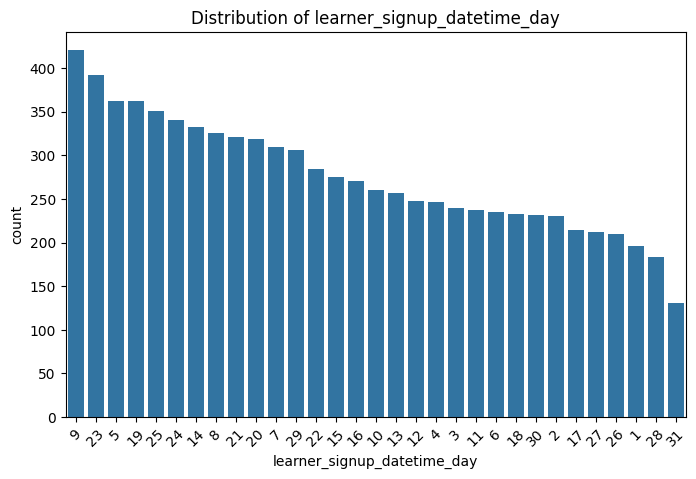

Number of unique values in learner_signup_datetime_day: 31
Unique values in learner_signup_datetime_day: [14  1  9 29  6  2 31 22 20 11  4 28 18  5 16  8 15 17 19 21 26 23 24 25
 27 12  7 13 10 30  3]
The most frequent value in learner_signup_datetime_day is: 9
Percentage distribution for learner_signup_datetime_day:
learner_signup_datetime_day
9     4.923798
23    4.595545
5     4.243845
19    4.243845
25    4.114889
24    3.985932
14    3.892145
8     3.810082
21    3.763189
20    3.739742
7     3.622509
29    3.587339
22    3.329426
15    3.223916
16    3.177022
10    3.048066
13    3.012896
12    2.895662
4     2.883939
3     2.801876
11    2.778429
6     2.754982
18    2.731536
30    2.708089
2     2.696366
17    2.508792
27    2.485346
26    2.461899
1     2.297773
28    2.145369
31    1.535756
Name: proportion, dtype: float64
The data type of learner_signup_datetime_day is: int64


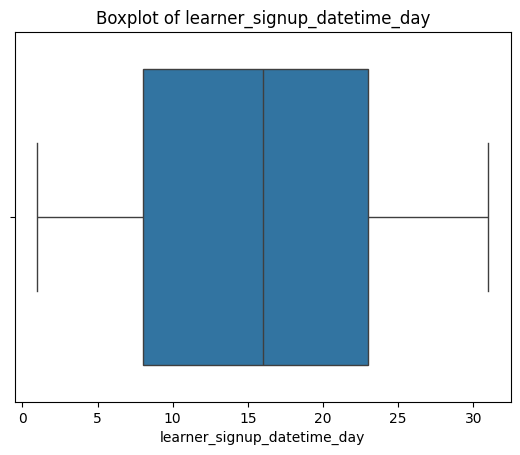

In [ ]:
# Call the function to analyze the 'learner_signup_datetime_day' column
analyzeing(df, 'learner_signup_datetime_day')

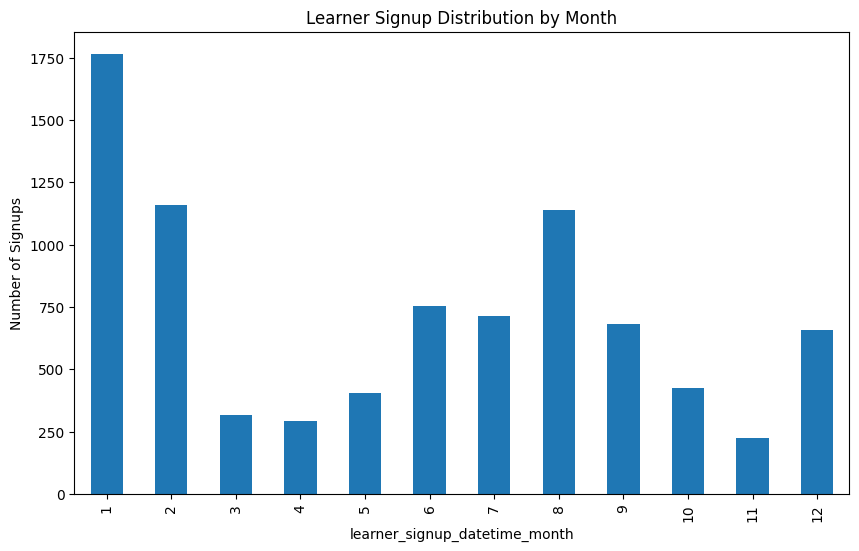

In [ ]:
# If it's part of a temporal trend, group by and check the count over months or years
# df['signup_month'] = df['signup_date'].dt.month
df.groupby('learner_signup_datetime_month')['learner_signup_datetime_day'].count().plot(kind='bar', figsize=(10, 6))
plt.title('Learner Signup Distribution by Month')
plt.ylabel('Number of Signups')
plt.show()


### Findings for the Column: `learner_signup_datetime_day`

1. **Missing Values**:
   - There are **no missing values** in the `learner_signup_datetime_day` column, ensuring that the data is complete for analysis.

2. **Value Counts**:
   - The values in the `learner_signup_datetime_day` column represent days of the month when learners signed up. The frequency count reveals that the sign-ups vary by day, with some days being more popular than others.
   - The days with the highest number of sign-ups are:
     - **Day 9**: 420 sign-ups
     - **Day 23**: 392 sign-ups
     - **Day 5**: 362 sign-ups
   - The day with the **lowest number of sign-ups** is:
     - **Day 31**: 131 sign-ups

3. **Unique Values**:
   - There are **31 unique values** in this column, indicating that it represents the 31 days of a month.
   - The unique days range from 1 to 31, suggesting the column includes the entire set of days of the month.

4. **Mode** (Most Frequent Value):
   - The most frequent value (mode) in this column is **Day 9**, with the highest number of sign-ups (420).
   
5. **Percentage Distribution**:
   - The distribution of sign-ups by day shows that the sign-up activity is not uniform across the days of the month. The most frequent days (Day 9, Day 23, and Day 5) contribute to a higher percentage of the total sign-ups.
   - **Day 9** accounts for **4.92%** of the total sign-ups, followed by **Day 23** at **4.60%** and **Day 5** at **4.24%**.
   - **Day 31** has the lowest proportion of sign-ups, contributing just **1.54%** of the total.

6. **Data Type**:
   - The `learner_signup_datetime_day` column is of type **int64**, which indicates that it contains integer values representing the day of the month.

7. **Outliers**:
   - There are **no outliers** in this column, as the values are confined to the range of 1 to 31, with no significant deviations from the expected pattern.

### Key Observations:
- The days with the highest learner sign-ups (9, 23, and 5) stand out as the most popular days.
- **Day 31** has the lowest sign-up count, which may indicate that learners tend to sign up more frequently earlier in the month, or there could be data distribution anomalies, such as fewer opportunities for sign-ups at the end of the month.
- The data type of the column (integer) is appropriate for the representation of days, and there are no missing values or anomalies, making the column ready for further analysis or modeling.

<hr />

### opportunity_end_date_year

Missing values in opportunity_end_date_year: 0
Value Counts for opportunity_end_date_year:
opportunity_end_date_year
2024    8118
2025     353
2023      59
Name: count, dtype: int64


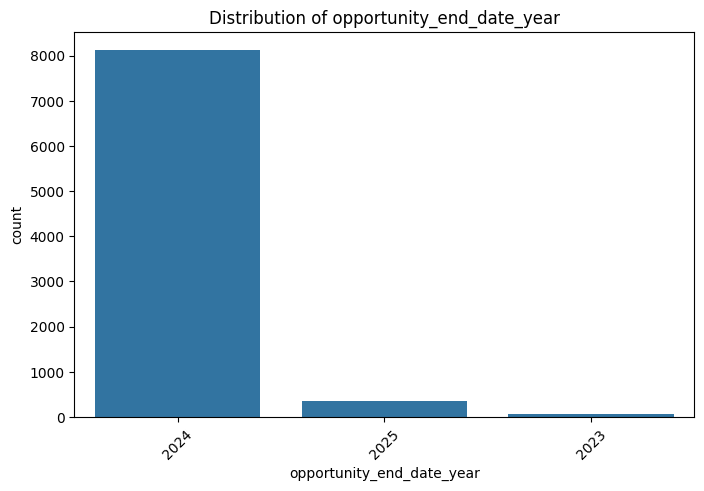

Number of unique values in opportunity_end_date_year: 3
Unique values in opportunity_end_date_year: [2024 2023 2025]
The most frequent value in opportunity_end_date_year is: 2024
Percentage distribution for opportunity_end_date_year:
opportunity_end_date_year
2024    95.169988
2025     4.138335
2023     0.691676
Name: proportion, dtype: float64
The data type of opportunity_end_date_year is: int64


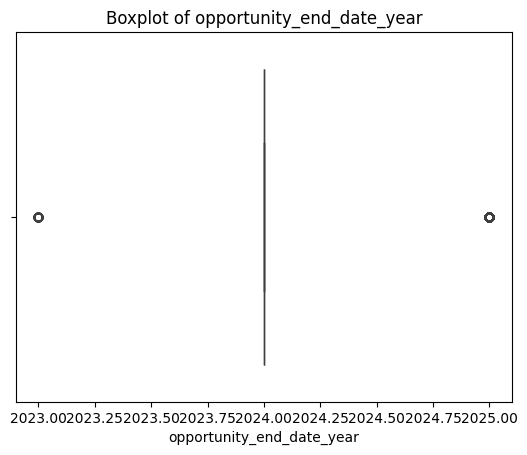

In [ ]:
# Call the function to analyze the 'opportunity_end_date_year' column
analyzeing(df, 'opportunity_end_date_year')

### Findings for the Column: `opportunity_end_date_year`

1. **Missing Values**:
   - There are **no missing values** in the `opportunity_end_date_year` column, ensuring that the data is complete for analysis.

2. **Value Counts**:
   - The values in the `opportunity_end_date_year` column represent the year when the opportunity ends. The frequency count shows that the data is mostly concentrated in the year **2024**.
   - The distribution of values is as follows:
     - **2024**: 8118 records
     - **2025**: 353 records
     - **2023**: 59 records

3. **Unique Values**:
   - There are **3 unique values** in this column, which are **2024**, **2025**, and **2023**.

4. **Mode** (Most Frequent Value):
   - The most frequent value (mode) in this column is **2024**, with 8118 records, making it the dominant year.

5. **Percentage Distribution**:
   - The distribution of the years shows that the vast majority of opportunities end in **2024**:
     - **2024** accounts for **95.17%** of the total records.
     - **2025** accounts for **4.14%**.
     - **2023** accounts for **0.69%**.

6. **Data Type**:
   - The `opportunity_end_date_year` column is of type **int64**, indicating that it contains integer values representing the year.

### Key Observations:
- The data is heavily skewed towards **2024**, with a very small proportion of opportunities ending in **2025** and **2023**.
- The column is free from missing values, and its data type is appropriate for representing years.
- The dominance of **2024** in the dataset suggests that it is the most relevant year for the opportunities in this dataset, with very few opportunities ending in 2023 and 2025.

<hr />

### opportunity_end_date_month

Missing values in opportunity_end_date_month: 0
Value Counts for opportunity_end_date_month:
opportunity_end_date_month
3     4507
6     1796
4     1557
12     353
2      262
10      55
Name: count, dtype: int64


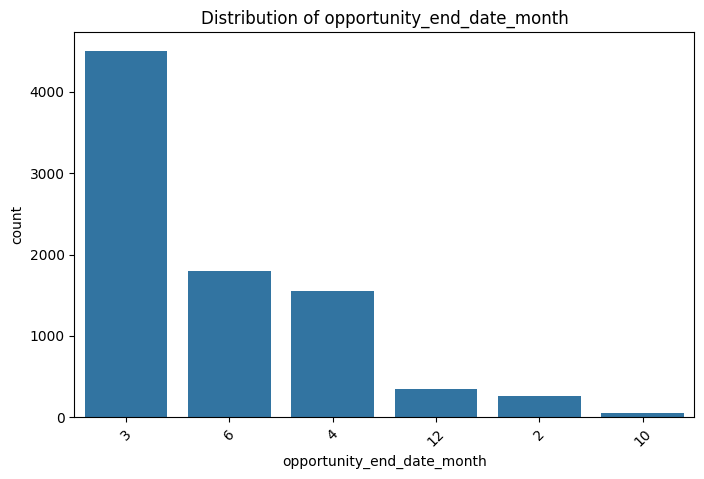

Number of unique values in opportunity_end_date_month: 6
Unique values in opportunity_end_date_month: [ 6  3  4 12  2 10]
The most frequent value in opportunity_end_date_month is: 3
Percentage distribution for opportunity_end_date_month:
opportunity_end_date_month
3     52.837046
6     21.055100
4     18.253224
12     4.138335
2      3.071512
10     0.644783
Name: proportion, dtype: float64
The data type of opportunity_end_date_month is: int64


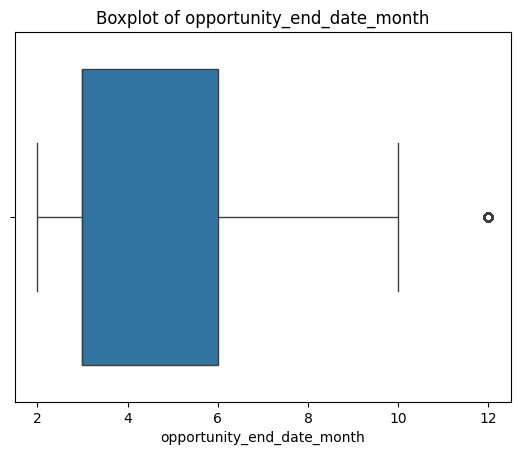

In [ ]:
# Call the function to analyze the 'opportunity_end_date_month' column
analyzeing(df, 'opportunity_end_date_month')

### Findings for the Column: `opportunity_end_date_month`

1. **Missing Values**:
   - There are **no missing values** in the `opportunity_end_date_month` column, indicating that the data is complete for analysis.

2. **Value Counts**:
   - The values in the `opportunity_end_date_month` column represent the month in which the opportunity ends. The frequency count shows that the data is concentrated in just a few months.
   - The distribution of values is as follows:
     - **Month 3**: 4507 records
     - **Month 6**: 1796 records
     - **Month 4**: 1557 records
     - **Month 12**: 353 records
     - **Month 2**: 262 records
     - **Month 10**: 55 records

3. **Unique Values**:
   - There are **6 unique values** in this column, which are **2**, **3**, **4**, **6**, **10**, and **12**. These correspond to the months in which the opportunities end.

4. **Mode** (Most Frequent Value):
   - The most frequent value (mode) in this column is **Month 3** (March), with **4507 records**, which makes it the most popular month for opportunities to end.

5. **Percentage Distribution**:
   - The distribution of opportunities by month shows that the majority of opportunities end in **Month 3 (March)**:
     - **Month 3** accounts for **52.84%** of the total records.
     - **Month 6** (June) accounts for **21.06%**.
     - **Month 4** (April) accounts for **18.25%**.
     - **Month 12** (December) accounts for **4.14%**.
     - **Month 2** (February) accounts for **3.07%**.
     - **Month 10** (October) accounts for **0.64%**.

6. **Data Type**:
   - The `opportunity_end_date_month` column is of type **int64**, which indicates that it contains integer values representing the month of the year.

### Key Observations:
- The data is highly concentrated in **Month 3 (March)**, which suggests that a significant portion of the opportunities end in this month.
- **Month 6 (June)** and **Month 4 (April)** also have a substantial proportion of the opportunities, while the other months contribute far fewer opportunities.
- **Month 10 (October)** has the least number of opportunities ending, contributing only **0.64%** of the total.
- The column is free from missing values, and its data type is appropriate for representing months.

### Insights:
- The dataset is heavily skewed towards the first half of the year, with **March, June, and April** being the dominant months for opportunities to end.
- Opportunities that end in later months, such as **October** and **December**, are much less frequent, which may indicate seasonal trends or the timing of when opportunities are most available.

<hr />

### opportunity_end_date_day

Missing values in opportunity_end_date_day: 0
Value Counts for opportunity_end_date_day:
opportunity_end_date_day
11    4627
29    1548
12     784
30     386
17     262
8      237
24     192
5      152
13     116
19     112
31      55
23      46
6        9
1        4
Name: count, dtype: int64


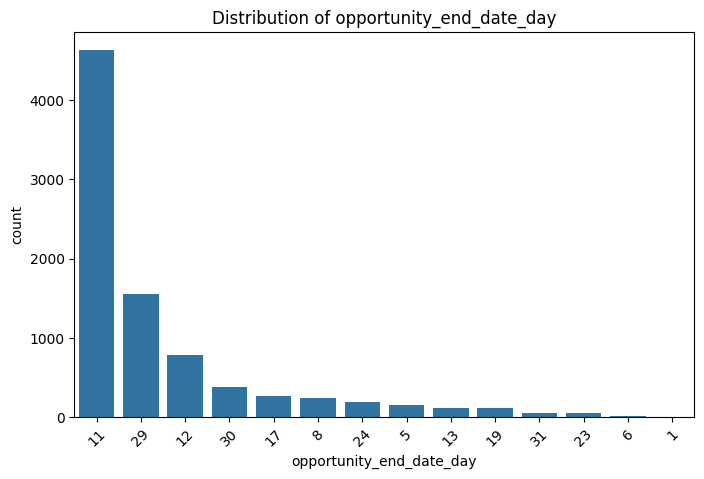

Number of unique values in opportunity_end_date_day: 14
Unique values in opportunity_end_date_day: [29  1 11 12 30 23  5  6 17 31 19 13 24  8]
The most frequent value in opportunity_end_date_day is: 11
Percentage distribution for opportunity_end_date_day:
opportunity_end_date_day
11    54.243845
29    18.147714
12     9.191090
30     4.525205
17     3.071512
8      2.778429
24     2.250879
5      1.781946
13     1.359906
19     1.313013
31     0.644783
23     0.539273
6      0.105510
1      0.046893
Name: proportion, dtype: float64
The data type of opportunity_end_date_day is: int64


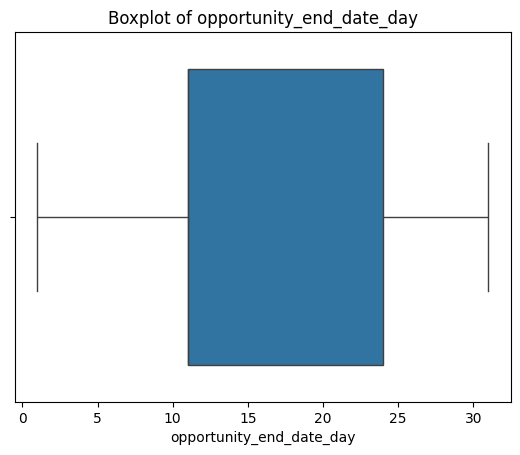

In [ ]:
# Call the function to analyze the 'opportunity_end_date_day' column
analyzeing(df, 'opportunity_end_date_day')

### Findings for the Column: `opportunity_end_date_day`

1. **Missing Values**:
   - There are **no missing values** in the `opportunity_end_date_day` column, indicating that the data is complete for analysis.

2. **Value Counts**:
   - The values in the `opportunity_end_date_day` column represent the day of the month in which the opportunity ends. The frequency count shows that certain days are more common for opportunities to end.
   - The distribution of values is as follows:
     - **Day 11**: 4627 records
     - **Day 29**: 1548 records
     - **Day 12**: 784 records
     - **Day 30**: 386 records
     - **Day 17**: 262 records
     - **Day 8**: 237 records
     - **Day 24**: 192 records
     - **Day 5**: 152 records
     - **Day 13**: 116 records
     - **Day 19**: 112 records
     - **Day 31**: 55 records
     - **Day 23**: 46 records
     - **Day 6**: 9 records
     - **Day 1**: 4 records

3. **Unique Values**:
   - There are **14 unique values** in this column, which correspond to the days of the month in which the opportunities end. These values are:
     - **1, 5, 6, 8, 11, 12, 13, 17, 19, 23, 24, 29, 30, and 31**.

4. **Mode** (Most Frequent Value):
   - The most frequent value (mode) in this column is **Day 11**, with **4627 records**, making it the most common day for opportunities to end.

5. **Percentage Distribution**:
   - The distribution of opportunities by day of the month shows that **Day 11** is overwhelmingly the most common:
     - **Day 11** accounts for **54.24%** of the total records.
     - **Day 29** accounts for **18.15%**.
     - **Day 12** accounts for **9.19%**.
     - **Day 30** accounts for **4.53%**.
     - **Day 17** accounts for **3.07%**.
     - **Day 8** accounts for **2.78%**.
     - **Day 24** accounts for **2.25%**.
     - **Day 5** accounts for **1.78%**.
     - **Day 13** accounts for **1.36%**.
     - **Day 19** accounts for **1.31%**.
     - **Day 31** accounts for **0.64%**.
     - **Day 23** accounts for **0.54%**.
     - **Day 6** accounts for **0.11%**.
     - **Day 1** accounts for **0.05%**.

6. **Data Type**:
   - The `opportunity_end_date_day` column is of type **int64**, which indicates that it contains integer values representing the day of the month.

### Key Observations:
- **Day 11** is the most dominant day for opportunities to end, accounting for more than half (54.24%) of the records.
- **Day 29** and **Day 12** follow as the second and third most frequent days for opportunities to end.
- The distribution is highly skewed, with a sharp drop in frequency after **Day 12**.
- **Days 1, 6, 23, and 31** have very few records, with **Day 1** and **Day 6** being the least frequent days for opportunities to end.

### Insights:
- The **11th of the month** is by far the most common day for opportunities to end, which could indicate a preference for closing opportunities around this time or some external factor that influences this trend.
- The relatively low frequency of opportunities ending on the 1st and 6th of the month could reflect operational patterns or constraints in the system.
- The highly imbalanced distribution suggests that the dataset might benefit from further investigation into why certain days are more favored than others, and whether this is due to a specific policy or external factors influencing the closing dates of opportunities.


<hr />

### date_of_birth_year

Missing values in date_of_birth_year: 0
Value Counts for date_of_birth_year:
date_of_birth_year
2000    1558
2001    1344
1999    1060
2002     910
1998     718
2003     431
1997     424
2004     275
1996     251
2005     208
1995     208
1994     202
2006     122
1992     109
1993     104
1990      78
2007      77
1989      74
1991      71
1987      36
2008      33
1988      32
1986      27
2010      22
1977      21
1985      20
1982      18
1980      15
1984      14
1976      14
1983      13
2009      12
1981       6
1968       5
1979       5
1978       4
1972       3
1973       1
1975       1
1974       1
1971       1
2011       1
1966       1
Name: count, dtype: int64


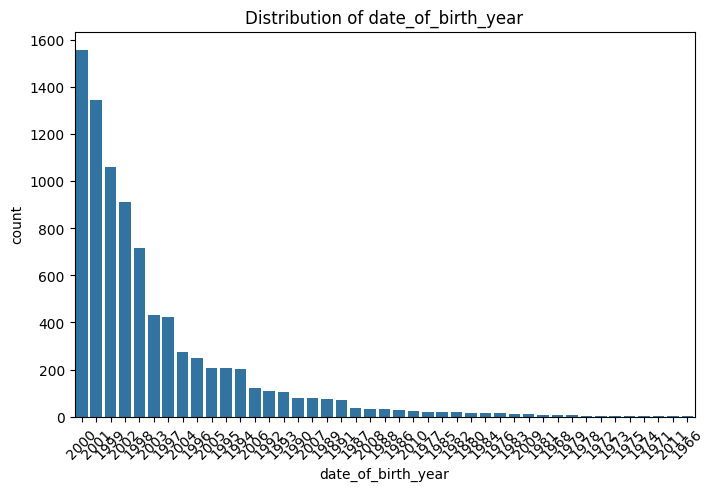

Number of unique values in date_of_birth_year: 43
Unique values in date_of_birth_year: [2001 2000 2002 1999 1996 2006 2005 1998 1997 2004 1994 1991 2003 1995
 1984 1993 1990 1989 2007 1983 1985 1987 1981 1988 1972 2010 1986 1976
 1982 1992 2008 1974 1980 1977 2009 2011 1971 1968 1979 1973 1978 1975
 1966]
The most frequent value in date_of_birth_year is: 2000
Percentage distribution for date_of_birth_year:
date_of_birth_year
2000    18.264947
2001    15.756155
1999    12.426729
2002    10.668230
1998     8.417351
2003     5.052755
1997     4.970692
2004     3.223916
1996     2.942556
2005     2.438453
1995     2.438453
1994     2.368113
2006     1.430246
1992     1.277843
1993     1.219226
1990     0.914420
2007     0.902696
1989     0.867526
1991     0.832356
1987     0.422040
2008     0.386870
1988     0.375147
1986     0.316530
2010     0.257913
1977     0.246190
1985     0.234467
1982     0.211020
1980     0.175850
1984     0.164127
1976     0.164127
1983     0.152403
2009     0.14

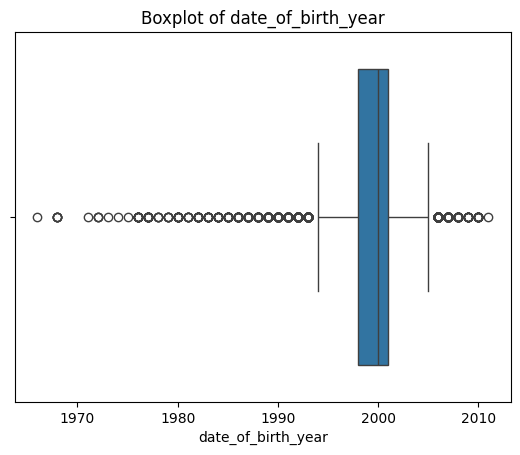

In [ ]:
# Call the function to analyze the 'date_of_birth_year' column
analyzeing(df, 'date_of_birth_year')

### Findings for the Column: `date_of_birth_year`

1. **Missing Values**:
   - There are **no missing values** in the `date_of_birth_year` column, indicating that the data is complete for analysis.

2. **Value Counts**:
   - The values in the `date_of_birth_year` column represent the birth year of individuals. The frequency count shows that certain years are more common than others.
   - The distribution of values is as follows:
     - **Year 2000**: 1558 records
     - **Year 2001**: 1344 records
     - **Year 1999**: 1060 records
     - **Year 2002**: 910 records
     - **Year 1998**: 718 records
     - **Year 2003**: 431 records
     - **Year 1997**: 424 records
     - **Year 2004**: 275 records
     - **Year 1996**: 251 records
     - **Year 2005**: 208 records
     - **Year 1995**: 208 records
     - **Year 1994**: 202 records
     - **Year 2006**: 122 records
     - **Year 1992**: 109 records
     - **Year 1993**: 104 records
     - **Year 1990**: 78 records
     - **Year 2007**: 77 records
     - **Year 1989**: 74 records
     - **Year 1991**: 71 records
     - **Year 1987**: 36 records
     - **Year 2008**: 33 records
     - **Year 1988**: 32 records
     - **Year 1986**: 27 records
     - **Year 2010**: 22 records
     - **Year 1977**: 21 records
     - **Year 1985**: 20 records
     - **Year 1982**: 18 records
     - **Year 1980**: 15 records
     - **Year 1984**: 14 records
     - **Year 1976**: 14 records
     - **Year 1983**: 13 records
     - **Year 2009**: 12 records
     - **Year 1981**: 6 records
     - **Year 1968**: 5 records
     - **Year 1979**: 5 records
     - **Year 1978**: 4 records
     - **Year 1972**: 3 records
     - **Year 1973**: 1 record
     - **Year 1975**: 1 record
     - **Year 1974**: 1 record
     - **Year 1971**: 1 record
     - **Year 2011**: 1 record
     - **Year 1966**: 1 record

3. **Unique Values**:
   - There are **43 unique values** in this column, which represent the birth years of the individuals. These values span from 1966 to 2011.

4. **Mode** (Most Frequent Value):
   - The most frequent value (mode) in this column is **Year 2000**, with **1558 records**, making it the most common birth year among the dataset.

5. **Percentage Distribution**:
   - The distribution of birth years shows that **Year 2000** is by far the most common:
     - **Year 2000** accounts for **18.26%** of the total records.
     - **Year 2001** accounts for **15.76%**.
     - **Year 1999** accounts for **12.43%**.
     - **Year 2002** accounts for **10.67%**.
     - **Year 1998** accounts for **8.42%**.
     - **Year 2003** accounts for **5.05%**.
     - Other years have a much lower frequency, with **Year 2011**, **Year 1973**, and others having only 1 record each (0.01%).

6. **Data Type**:
   - The `date_of_birth_year` column is of type **int64**, which indicates that it contains integer values representing the birth year.

### Key Observations:
- **Year 2000** is the most dominant year for birthdates in the dataset, with **18.26%** of the records, followed by **2001** and **1999**.
- There is a wide range of birth years in the dataset, including more recent years (e.g., **2010**, **2009**) and older years (e.g., **1971**, **1966**), suggesting a diverse demographic representation.
- A sharp drop-off in the frequency of records after **2003** indicates that birth years from 2004 onwards are underrepresented in the dataset.

### Insights:
- The dataset may have a higher representation of individuals born around the turn of the millennium, particularly in **2000** and **2001**.
- The presence of more recent birth years (e.g., **2009**, **2010**, **2011**) suggests that the dataset may represent a younger population, although there are also some older individuals (e.g., **1966**).
- If the dataset is intended to capture a certain demographic or population, further investigation might be necessary to understand the trends and the reasons behind the higher concentration of individuals born in **2000** and **2001**.
<hr />

### date_of_birth_month

Missing values in date_of_birth_month: 0
Value Counts for date_of_birth_month:
date_of_birth_month
8     916
11    796
6     757
10    747
5     721
4     717
7     690
9     689
3     654
1     626
12    620
2     597
Name: count, dtype: int64


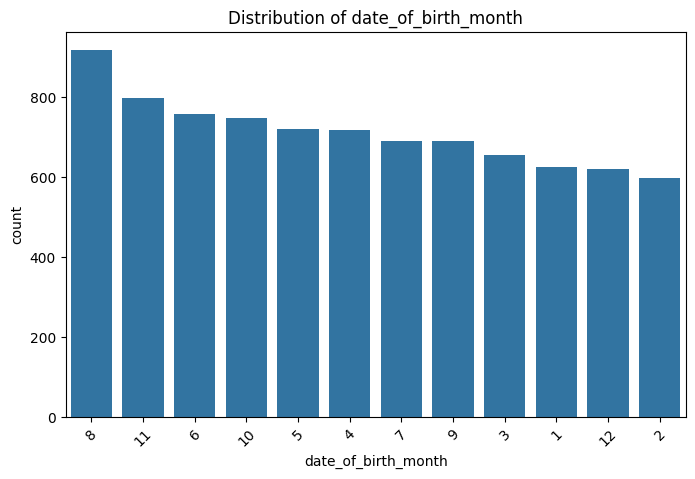

Number of unique values in date_of_birth_month: 12
Unique values in date_of_birth_month: [ 1  8 11  4  5  9  2 12  6 10  7  3]
The most frequent value in date_of_birth_month is: 8
Percentage distribution for date_of_birth_month:
date_of_birth_month
8     10.738570
11     9.331770
6      8.874560
10     8.757327
5      8.452521
4      8.405627
7      8.089097
9      8.077374
3      7.667057
1      7.338804
12     7.268464
2      6.998828
Name: proportion, dtype: float64
The data type of date_of_birth_month is: int64


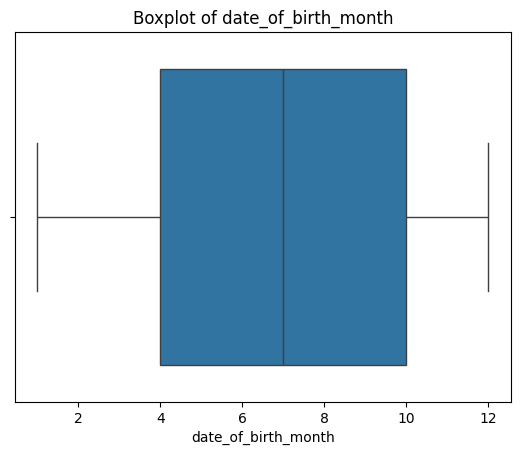

In [ ]:
# Call the function to analyze the 'date_of_birth_month' column
analyzeing(df, 'date_of_birth_month')

### Findings for the Column: `date_of_birth_month`

1. **Missing Values**:
   - There are **no missing values** in the `date_of_birth_month` column, ensuring complete data for analysis.

2. **Value Counts**:
   - The values in the `date_of_birth_month` column represent the month of birth for individuals. The frequency count shows that certain months are more common than others.
   - The distribution of values is as follows:
     - **Month 8** (August): 916 records
     - **Month 11** (November): 796 records
     - **Month 6** (June): 757 records
     - **Month 10** (October): 747 records
     - **Month 5** (May): 721 records
     - **Month 4** (April): 717 records
     - **Month 7** (July): 690 records
     - **Month 9** (September): 689 records
     - **Month 3** (March): 654 records
     - **Month 1** (January): 626 records
     - **Month 12** (December): 620 records
     - **Month 2** (February): 597 records

3. **Unique Values**:
   - There are **12 unique values** in this column, which correspond to the 12 months of the year.

4. **Mode** (Most Frequent Value):
   - The most frequent value (mode) in this column is **Month 8 (August)**, with **916 records**, making it the most common birth month in the dataset.

5. **Percentage Distribution**:
   - The distribution of birth months is as follows:
     - **Month 8** accounts for **10.74%** of the records.
     - **Month 11** accounts for **9.33%**.
     - **Month 6** accounts for **8.87%**.
     - **Month 10** accounts for **8.76%**.
     - **Month 5** accounts for **8.45%**.
     - **Month 4** accounts for **8.41%**.
     - **Month 7** accounts for **8.09%**.
     - **Month 9** accounts for **8.08%**.
     - **Month 3** accounts for **7.67%**.
     - **Month 1** accounts for **7.34%**.
     - **Month 12** accounts for **7.27%**.
     - **Month 2** accounts for **7.00%**.

6. **Data Type**:
   - The `date_of_birth_month` column is of type **int64**, which indicates it contains integer values representing the month of birth.

### Key Observations:
- **Month 8 (August)** is the most common birth month, accounting for **10.74%** of the records, followed closely by **Month 11 (November)** with **9.33%**.
- The birth month distribution is relatively even, with no drastic peaks or valleys, suggesting a fairly balanced spread across the 12 months.
- The least frequent months are **Month 2 (February)** with **6.99%** and **Month 12 (December)** with **7.27%**, although the differences are not large.

### Insights:
- The dataset shows a strong representation of births in the late summer and early fall months (August, November, June, October), which may reflect specific patterns in birth timing.
- There is a slightly lower representation for **February** and **December**, possibly due to fewer births in those months or due to seasonal trends.
- The even distribution across months indicates that the data could represent a diverse group of individuals across the entire year, making it a comprehensive dataset for further analysis.

<hr />

### date_of_birth_day

Missing values in date_of_birth_day: 0
Value Counts for date_of_birth_day:
date_of_birth_day
17    371
18    340
1     333
16    331
10    325
4     320
20    318
9     309
7     304
6     301
26    301
25    295
21    295
8     294
15    282
22    279
12    275
13    266
24    265
5     265
19    247
2     245
27    245
14    244
30    242
23    232
28    232
29    222
3     207
11    193
31    152
Name: count, dtype: int64


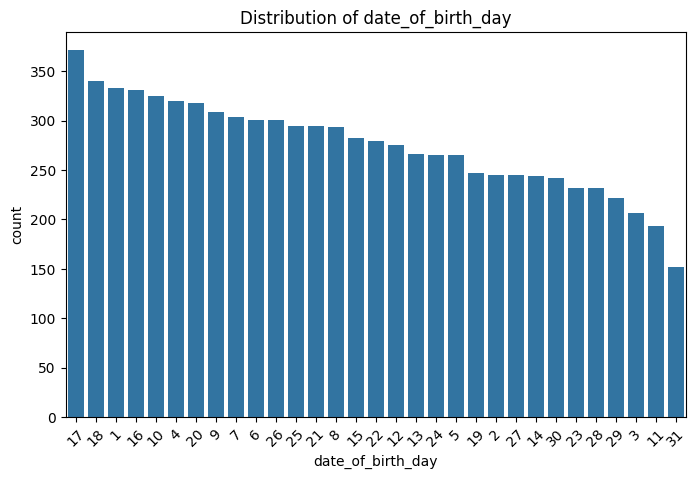

Number of unique values in date_of_birth_day: 31
Unique values in date_of_birth_day: [12 16 27  1 19  9 22 26 30  6 28  4 15 20 23 24  2 25  5 10  7 29 11 31
 18  8 17 21 13 14  3]
The most frequent value in date_of_birth_day is: 17
Percentage distribution for date_of_birth_day:
date_of_birth_day
17    4.349355
18    3.985932
1     3.903869
16    3.880422
10    3.810082
4     3.751465
20    3.728019
9     3.622509
7     3.563892
6     3.528722
26    3.528722
25    3.458382
21    3.458382
8     3.446659
15    3.305979
22    3.270809
12    3.223916
13    3.118406
24    3.106682
5     3.106682
19    2.895662
2     2.872216
27    2.872216
14    2.860492
30    2.837046
23    2.719812
28    2.719812
29    2.602579
3     2.426729
11    2.262603
31    1.781946
Name: proportion, dtype: float64
The data type of date_of_birth_day is: int64


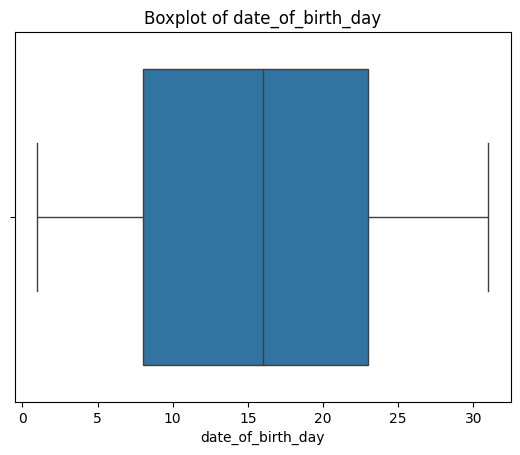

In [ ]:
# Call the function to analyze the 'date_of_birth_day' column
analyzeing(df, 'date_of_birth_day')

### Findings for the Column: `date_of_birth_day`

1. **Missing Values**:
   - There are **no missing values** in the `date_of_birth_day` column, ensuring complete data for analysis.

2. **Value Counts**:
   - The values in the `date_of_birth_day` column represent the day of birth for individuals. The frequency count shows the distribution of birth days.
   - The distribution of values is as follows:
     - **Day 17**: 371 records
     - **Day 18**: 340 records
     - **Day 1**: 333 records
     - **Day 16**: 331 records
     - **Day 10**: 325 records
     - **Day 4**: 320 records
     - **Day 20**: 318 records
     - **Day 9**: 309 records
     - **Day 7**: 304 records
     - **Day 6**: 301 records
     - **Day 26**: 301 records
     - **Day 25**: 295 records
     - **Day 21**: 295 records
     - **Day 8**: 294 records
     - **Day 15**: 282 records
     - **Day 22**: 279 records
     - **Day 12**: 275 records
     - **Day 13**: 266 records
     - **Day 24**: 265 records
     - **Day 5**: 265 records
     - **Day 19**: 247 records
     - **Day 2**: 245 records
     - **Day 27**: 245 records
     - **Day 14**: 244 records
     - **Day 30**: 242 records
     - **Day 23**: 232 records
     - **Day 28**: 232 records
     - **Day 29**: 222 records
     - **Day 3**: 207 records
     - **Day 11**: 193 records
     - **Day 31**: 152 records

3. **Unique Values**:
   - There are **31 unique values** in this column, representing the days of the month (1 to 31).

4. **Mode** (Most Frequent Value):
   - The most frequent value (mode) in this column is **Day 17**, with **371 records**, making it the most common birth day in the dataset.

5. **Percentage Distribution**:
   - The distribution of birth days is as follows:
     - **Day 17** accounts for **4.35%** of the records.
     - **Day 18** accounts for **3.99%**.
     - **Day 1** accounts for **3.90%**.
     - **Day 16** accounts for **3.88%**.
     - **Day 10** accounts for **3.81%**.
     - **Day 4** accounts for **3.75%**.
     - **Day 20** accounts for **3.73%**.
     - **Day 9** accounts for **3.62%**.
     - **Day 7** accounts for **3.56%**.
     - **Day 6** accounts for **3.53%**.
     - **Day 26** accounts for **3.53%**.
     - **Day 25** accounts for **3.46%**.
     - **Day 21** accounts for **3.46%**.
     - **Day 8** accounts for **3.45%**.
     - **Day 15** accounts for **3.31%**.
     - **Day 22** accounts for **3.27%**.
     - **Day 12** accounts for **3.22%**.
     - **Day 13** accounts for **3.12%**.
     - **Day 24** accounts for **3.11%**.
     - **Day 5** accounts for **3.11%**.
     - **Day 19** accounts for **2.90%**.
     - **Day 2** accounts for **2.87%**.
     - **Day 27** accounts for **2.87%**.
     - **Day 14** accounts for **2.86%**.
     - **Day 30** accounts for **2.84%**.
     - **Day 23** accounts for **2.72%**.
     - **Day 28** accounts for **2.72%**.
     - **Day 29** accounts for **2.60%**.
     - **Day 3** accounts for **2.43%**.
     - **Day 11** accounts for **2.26%**.
     - **Day 31** accounts for **1.78%**.

6. **Data Type**:
   - The `date_of_birth_day` column is of type **int64**, indicating that it contains integer values representing the day of birth.

### Key Observations:
- **Day 17** is the most common birth day, accounting for **4.35%** of the records.
- There is a relatively balanced distribution across the 31 days of the month, but **Day 17**, **Day 18**, and **Day 1** are the most frequent.
- **Day 31** is the least frequent with only **1.78%** of the records.

### Insights:
- The dataset indicates that birth days closer to the middle of the month (especially **Day 17** and **Day 18**) are more common, while days near the end of the month (e.g., **Day 31**) are less frequent.
- The even spread of birth days across the month suggests that the dataset is not heavily skewed toward any specific days, making it a reliable sample for analysis.

<hr />

### entry_created_at_year

Missing values in entry_created_at_year: 0
Value Counts for entry_created_at_year:
entry_created_at_year
2024    8530
Name: count, dtype: int64


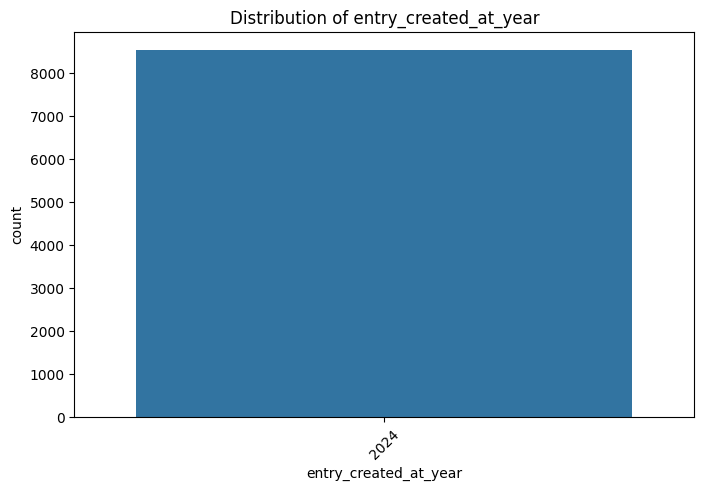

Number of unique values in entry_created_at_year: 1
Unique values in entry_created_at_year: [2024]
The most frequent value in entry_created_at_year is: 2024
Percentage distribution for entry_created_at_year:
entry_created_at_year
2024    100.0
Name: proportion, dtype: float64
The data type of entry_created_at_year is: int64


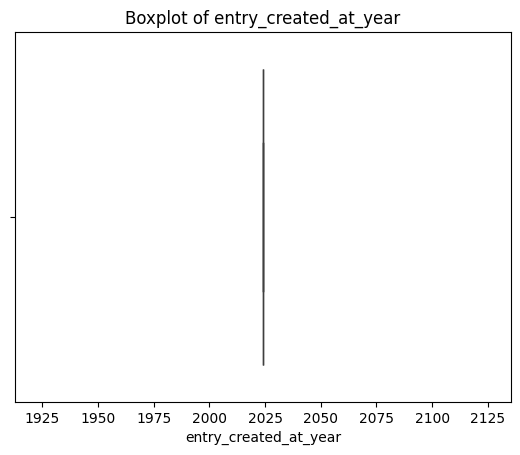

In [ ]:
# Call the function to analyze the 'entry_created_at_year' column
analyzeing(df, 'entry_created_at_year')

### Findings for the Column: `entry_created_at_year`

1. **Missing Values**:
   - There are **no missing values** in the `entry_created_at_year` column, ensuring complete data for analysis.

2. **Value Counts**:
   - The `entry_created_at_year` column contains a single unique value across all records:
     - **Year 2024**: 8530 records.

3. **Unique Values**:
   - There is only **1 unique value** in this column, which is the year **2024**.

4. **Mode** (Most Frequent Value):
   - The most frequent value (mode) in this column is **2024**, as it is the only value present.

5. **Percentage Distribution**:
   - **Year 2024** accounts for **100%** of the records, indicating that all entries are from this year.

6. **Data Type**:
   - The `entry_created_at_year` column is of type **int64**, indicating that it contains integer values representing the year.

### Key Observations:
- All records in this dataset are associated with the year **2024**, making it uniform in terms of the year of entry creation.

### Insights:
- Since only the year **2024** is present, it is important to consider whether the dataset is limited to a specific time frame or whether data for other years is missing.

<hr />

### entry_created_at_month

Missing values in entry_created_at_month: 0
Value Counts for entry_created_at_month:
entry_created_at_month
3    8530
Name: count, dtype: int64


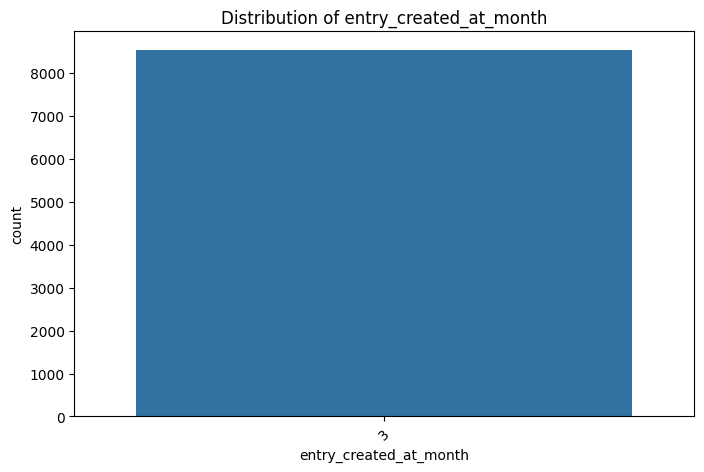

Number of unique values in entry_created_at_month: 1
Unique values in entry_created_at_month: [3]
The most frequent value in entry_created_at_month is: 3
Percentage distribution for entry_created_at_month:
entry_created_at_month
3    100.0
Name: proportion, dtype: float64
The data type of entry_created_at_month is: int64


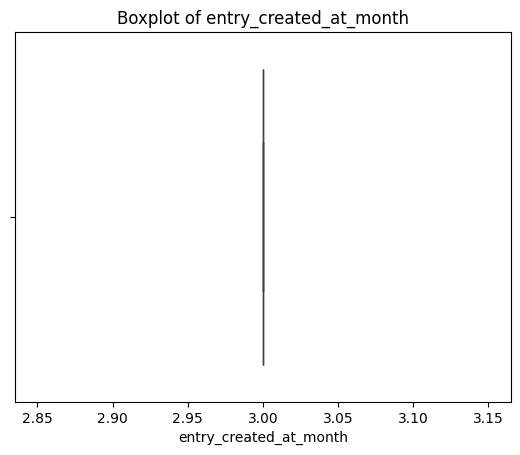

In [ ]:
# Call the function to analyze the 'entry_created_at_month' column
analyzeing(df, 'entry_created_at_month')

### Findings for the Column: `entry_created_at_month`

1. **Missing Values**:
   - There are **no missing values** in the `entry_created_at_month` column, ensuring complete data for analysis.

2. **Value Counts**:
   - The `entry_created_at_month` column contains a single unique value across all records:
     - **Month 3** (March): 8530 records.

3. **Unique Values**:
   - There is only **1 unique value** in this column, which is the month **3** (March).

4. **Mode** (Most Frequent Value):
   - The most frequent value (mode) in this column is **3**, as it is the only value present.

5. **Percentage Distribution**:
   - **Month 3** accounts for **100%** of the records, indicating that all entries were created in the month of **March**.

6. **Data Type**:
   - The `entry_created_at_month` column is of type **int64**, indicating that it contains integer values representing the month.

### Key Observations:
- All records in this dataset are associated with the month **March** (month 3), making it uniform in terms of the month of entry creation.

### Insights:
- Since only the month **March** is present, it is important to consider whether the dataset is limited to a specific month or if data for other months is missing.

<hr />

### entry_created_at_day

Missing values in entry_created_at_day: 0
Value Counts for entry_created_at_day:
entry_created_at_day
11    8530
Name: count, dtype: int64


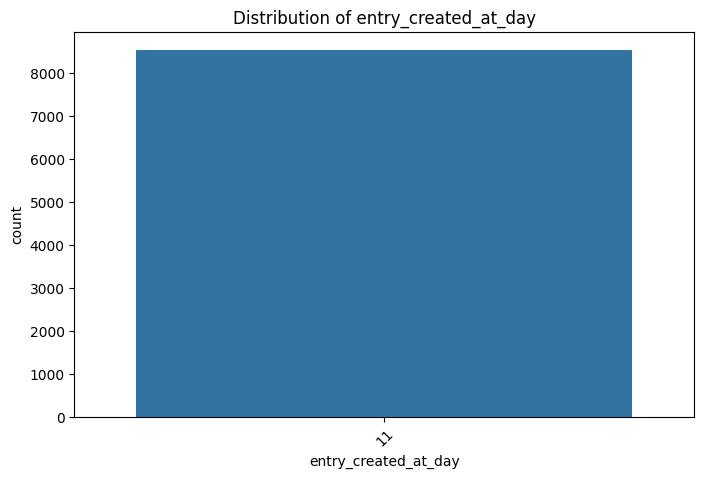

Number of unique values in entry_created_at_day: 1
Unique values in entry_created_at_day: [11]
The most frequent value in entry_created_at_day is: 11
Percentage distribution for entry_created_at_day:
entry_created_at_day
11    100.0
Name: proportion, dtype: float64
The data type of entry_created_at_day is: int64


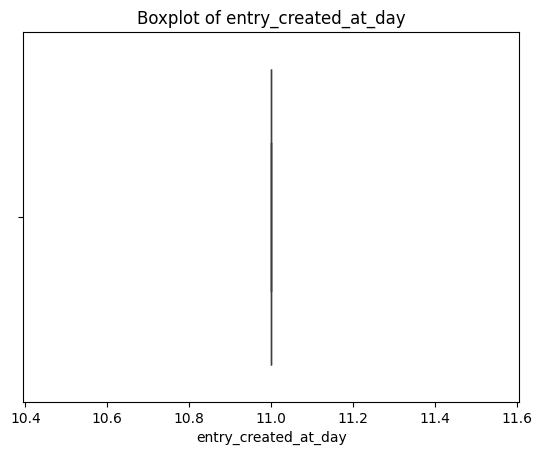

In [ ]:
# Call the function to analyze the 'entry_created_at_day' column
analyzeing(df, 'entry_created_at_day')

### Findings for the Column: `entry_created_at_day`

1. **Missing Values**:
   - There are **no missing values** in the `entry_created_at_day` column, ensuring complete data for analysis.

2. **Value Counts**:
   - The `entry_created_at_day` column contains a single unique value across all records:
     - **Day 11**: 8530 records.

3. **Unique Values**:
   - There is only **1 unique value** in this column, which is **Day 11**.

4. **Mode** (Most Frequent Value):
   - The most frequent value (mode) in this column is **11**, as it is the only value present.

5. **Percentage Distribution**:
   - **Day 11** accounts for **100%** of the records, indicating that all entries were created on **Day 11**.

6. **Data Type**:
   - The `entry_created_at_day` column is of type **int64**, indicating that it contains integer values representing the day.

### Key Observations:
- All records in this dataset are associated with **Day 11**, making it uniform in terms of the day of entry creation.

### Insights:
- Since only **Day 11** is present, it is important to consider whether the dataset is limited to entries created on this particular day or if data for other days is missing.

<hr />

### apply_date_year

Missing values in apply_date_year: 0
Value Counts for apply_date_year:
apply_date_year
2024    4794
2023    3695
2022      41
Name: count, dtype: int64


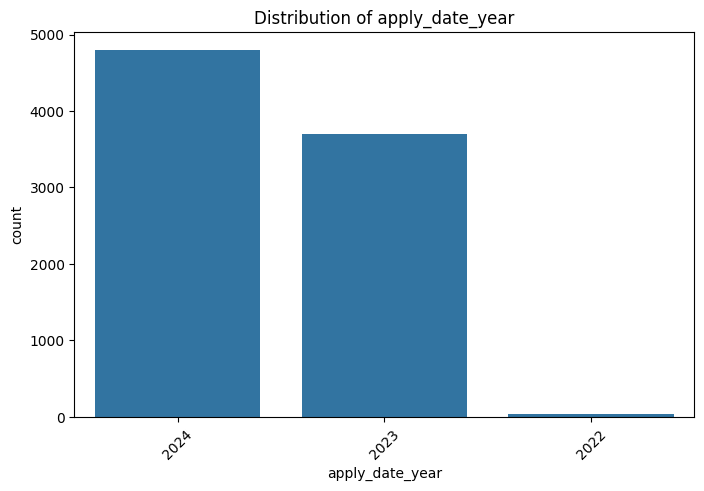

Number of unique values in apply_date_year: 3
Unique values in apply_date_year: [2023 2024 2022]
The most frequent value in apply_date_year is: 2024
Percentage distribution for apply_date_year:
apply_date_year
2024    56.201641
2023    43.317702
2022     0.480657
Name: proportion, dtype: float64
The data type of apply_date_year is: int64


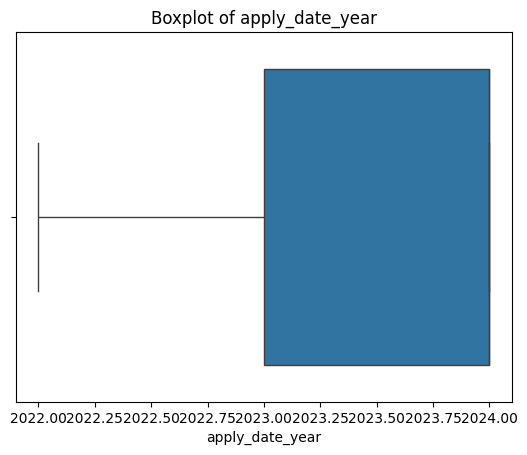

In [ ]:
# Call the function to analyze the 'apply_date_year' column
analyzeing(df, 'apply_date_year')

### Findings for the Column: `apply_date_year`

1. **Missing Values**:
   - There are **no missing values** in the `apply_date_year` column, indicating complete data for analysis.

2. **Value Counts**:
   - The `apply_date_year` column contains 3 unique values across all records:
     - **2024**: 4794 records
     - **2023**: 3695 records
     - **2022**: 41 records

3. **Unique Values**:
   - There are **3 unique values** in this column: **2023**, **2024**, and **2022**.

4. **Mode** (Most Frequent Value):
   - The most frequent value (mode) in this column is **2024**, with **4794** records.

5. **Percentage Distribution**:
   - **2024** accounts for **56.2%** of the records.
   - **2023** accounts for **43.3%** of the records.
   - **2022** accounts for only **0.48%** of the records.

6. **Data Type**:
   - The `apply_date_year` column is of type **int64**, indicating that it contains integer values representing the year.

### Key Observations:
- The year **2024** has the highest frequency of applications, followed by **2023**. The year **2022** has a significantly lower number of records, which might indicate either limited data for that year or a significant decrease in applications.
  
### Insights:
- The dataset is primarily focused on applications from **2024** and **2023**, with **2022** being relatively underrepresented.

<hr />

### apply_date_month

Missing values in apply_date_month: 0
Value Counts for apply_date_month:
apply_date_month
1     2515
2     1939
8      782
12     691
9      628
3      500
6      383
10     357
7      297
11     211
5      146
4       81
Name: count, dtype: int64


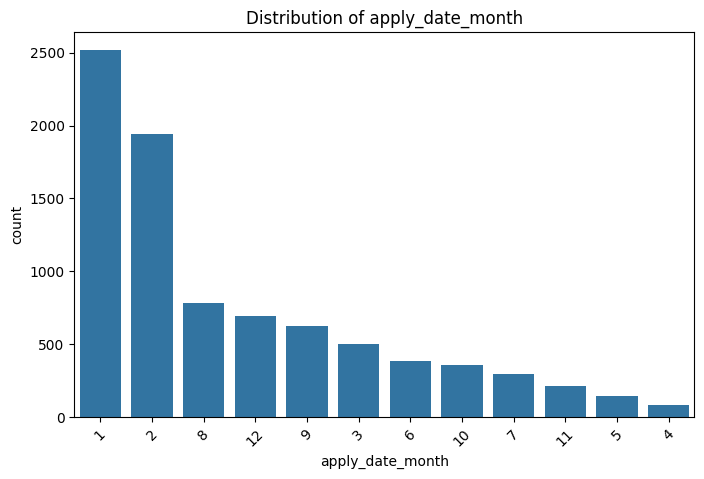

Number of unique values in apply_date_month: 12
Unique values in apply_date_month: [ 6  5 10  1  3  7 12  9 11  4  8  2]
The most frequent value in apply_date_month is: 1
Percentage distribution for apply_date_month:
apply_date_month
1     29.484174
2     22.731536
8      9.167644
12     8.100821
9      7.362251
3      5.861665
6      4.490035
10     4.185229
7      3.481829
11     2.473623
5      1.711606
4      0.949590
Name: proportion, dtype: float64
The data type of apply_date_month is: int64


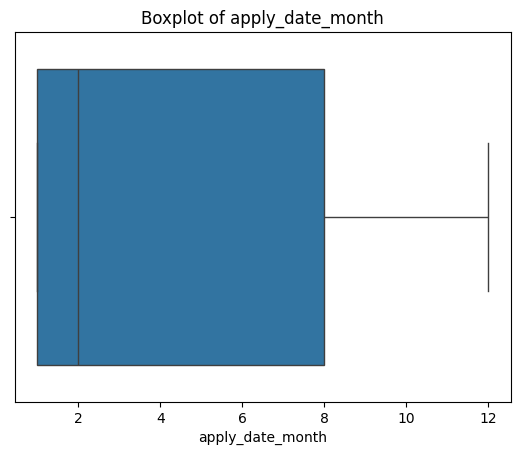

In [ ]:
# Call the function to analyze the 'apply_date_month' column
analyzeing(df, 'apply_date_month')

### Findings for the Column: `apply_date_month`

1. **Missing Values**:
   - There are **no missing values** in the `apply_date_month` column, indicating complete data for analysis.

2. **Value Counts**:
   - The `apply_date_month` column contains 12 unique values across all records, representing each month:
     - **January (1)**: 2515 records
     - **February (2)**: 1939 records
     - **August (8)**: 782 records
     - **December (12)**: 691 records
     - **September (9)**: 628 records
     - **March (3)**: 500 records
     - **June (6)**: 383 records
     - **October (10)**: 357 records
     - **July (7)**: 297 records
     - **November (11)**: 211 records
     - **May (5)**: 146 records
     - **April (4)**: 81 records

3. **Unique Values**:
   - There are **12 unique values** in this column, corresponding to the months **1 to 12**.

4. **Mode** (Most Frequent Value):
   - The most frequent value (mode) in this column is **January (1)**, with **2515** records.

5. **Percentage Distribution**:
   - **January** accounts for **29.48%** of the records.
   - **February** accounts for **22.73%** of the records.
   - **August** accounts for **9.17%** of the records.
   - **December** accounts for **8.10%** of the records.
   - **September** accounts for **7.36%** of the records.
   - Other months have progressively lower percentages, with **April** having the least at **0.95%**.

6. **Data Type**:
   - The `apply_date_month` column is of type **int64**, indicating that it contains integer values representing the month.

### Key Observations:
- **January** and **February** have the highest number of records, contributing to more than **50%** of the dataset. These months seem to be the most active for applications.
- The months **April** and **May** have significantly fewer records, with **April** showing the least activity.

### Insights:
- The month of **January** has the highest concentration of applications, while **April** sees a noticeable dip in activity.

<hr />

### apply_date_day

Missing values in apply_date_day: 0
Value Counts for apply_date_day:
apply_date_day
8     350
21    345
5     330
15    318
27    317
29    311
2     305
14    304
22    304
7     302
12    300
24    300
4     293
13    293
23    292
19    291
6     290
11    272
9     270
20    269
16    266
3     257
25    252
28    246
10    245
18    221
17    219
26    218
30    212
1     175
31    163
Name: count, dtype: int64


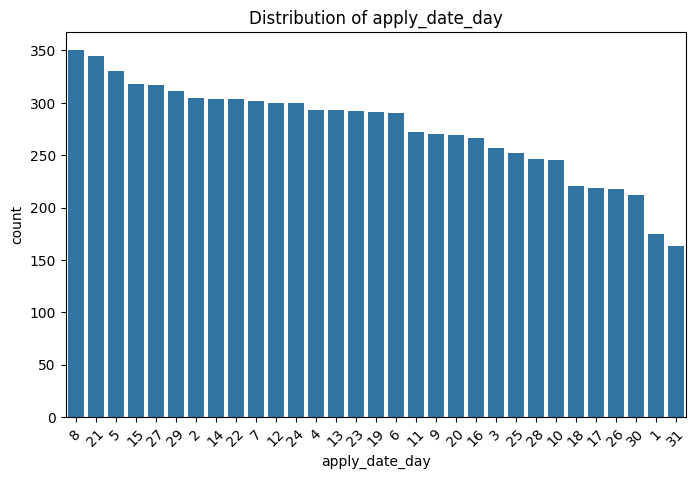

Number of unique values in apply_date_day: 31
Unique values in apply_date_day: [14  1 11  9  6  2 22 24 17  4 30 10 31  8 29 19  5  3 26 15 21 28 25 18
  7 20 13 16 27 23 12]
The most frequent value in apply_date_day is: 8
Percentage distribution for apply_date_day:
apply_date_day
8     4.103165
21    4.044549
5     3.868699
15    3.728019
27    3.716295
29    3.645955
2     3.575615
14    3.563892
22    3.563892
7     3.540445
12    3.516999
24    3.516999
4     3.434936
13    3.434936
23    3.423212
19    3.411489
6     3.399766
11    3.188746
9     3.165299
20    3.153576
16    3.118406
3     3.012896
25    2.954279
28    2.883939
10    2.872216
18    2.590856
17    2.567409
26    2.555686
30    2.485346
1     2.051583
31    1.910903
Name: proportion, dtype: float64
The data type of apply_date_day is: int64


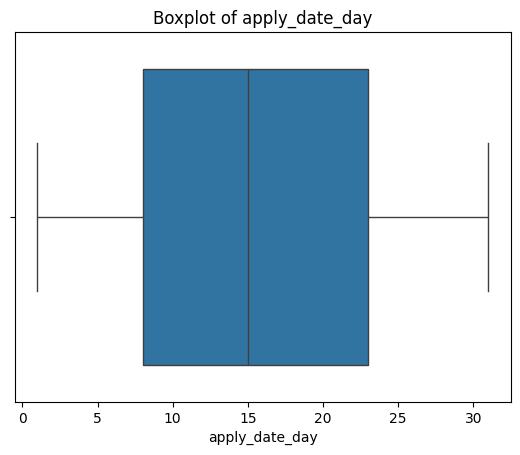

In [ ]:
# Call the function to analyze the 'apply_date_day' column
analyzeing(df, 'apply_date_day')

### Findings for the Column: `apply_date_day`

1. **Missing Values**:
   - There are **no missing values** in the `apply_date_day` column, meaning all records are complete.

2. **Value Counts**:
   - The `apply_date_day` column contains 31 unique values, corresponding to each day of the month:
     - **Day 8**: 350 records
     - **Day 21**: 345 records
     - **Day 5**: 330 records
     - **Day 15**: 318 records
     - **Day 27**: 317 records
     - **Day 29**: 311 records
     - **Day 2**: 305 records
     - **Day 14**: 304 records
     - **Day 22**: 304 records
     - **Day 7**: 302 records
     - **Day 12**: 300 records
     - **Day 24**: 300 records
     - **Day 4**: 293 records
     - **Day 13**: 293 records
     - **Day 23**: 292 records
     - **Day 19**: 291 records
     - **Day 6**: 290 records
     - **Day 11**: 272 records
     - **Day 9**: 270 records
     - **Day 20**: 269 records
     - **Day 16**: 266 records
     - **Day 3**: 257 records
     - **Day 25**: 252 records
     - **Day 28**: 246 records
     - **Day 10**: 245 records
     - **Day 18**: 221 records
     - **Day 17**: 219 records
     - **Day 26**: 218 records
     - **Day 30**: 212 records
     - **Day 1**: 175 records
     - **Day 31**: 163 records

3. **Unique Values**:
   - There are **31 unique values** in this column, corresponding to **all the days of the month** (1 to 31).

4. **Mode** (Most Frequent Value):
   - The most frequent value (mode) in this column is **Day 8**, with **350** records.

5. **Percentage Distribution**:
   - **Day 8** accounts for **4.10%** of the records.
   - **Day 21** accounts for **4.04%** of the records.
   - **Day 5** accounts for **3.87%** of the records.
   - **Day 15** accounts for **3.73%** of the records.
   - **Day 27** accounts for **3.72%** of the records.
   - **Day 29** accounts for **3.65%** of the records.
   - Other days have progressively lower percentages, with **Day 31** having the least at **1.91%**.

6. **Data Type**:
   - The `apply_date_day` column is of type **int64**, indicating that it contains integer values representing the days of the month.

### Key Observations:
- **Day 8** and **Day 21** are the most active days for applications, with **Day 8** being the most frequent day by a slight margin.
- **Day 1** and **Day 31** have the least number of applications, with **Day 31** having the fewest records.

### Insights:
- The distribution of application days is relatively spread across the month, but there is a slight preference for dates near the beginning and middle of the month.

<hr />

### opportunity_start_date_year

Missing values in opportunity_start_date_year: 0
Value Counts for opportunity_start_date_year:
opportunity_start_date_year
2024    6692
2022    1349
2023     489
Name: count, dtype: int64


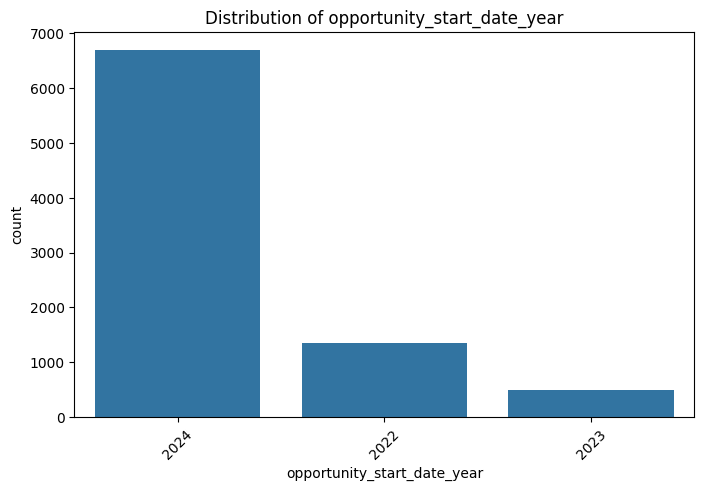

Number of unique values in opportunity_start_date_year: 3
Unique values in opportunity_start_date_year: [2022 2024 2023]
The most frequent value in opportunity_start_date_year is: 2024
Percentage distribution for opportunity_start_date_year:
opportunity_start_date_year
2024    78.452521
2022    15.814771
2023     5.732708
Name: proportion, dtype: float64
The data type of opportunity_start_date_year is: int64


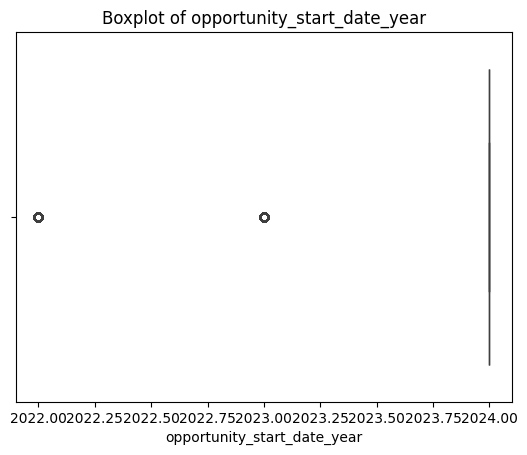

In [ ]:
# Call the function to analyze the 'opportunity_start_date_year' column
analyzeing(df, 'opportunity_start_date_year')

### Findings for the Column: `opportunity_start_date_year`

1. **Missing Values**:
   - There are **no missing values** in the `opportunity_start_date_year` column, indicating that all records are complete.

2. **Value Counts**:
   - The `opportunity_start_date_year` column contains 3 unique values:
     - **2024**: 6,692 records
     - **2022**: 1,349 records
     - **2023**: 489 records

3. **Unique Values**:
   - There are **3 unique values** in this column: **2022, 2023, and 2024**.

4. **Mode** (Most Frequent Value):
   - The most frequent value (mode) in this column is **2024**, with **6,692** records.

5. **Percentage Distribution**:
   - **2024** represents **78.45%** of the records.
   - **2022** represents **15.81%** of the records.
   - **2023** represents **5.73%** of the records.

6. **Data Type**:
   - The `opportunity_start_date_year` column is of type **int64**, indicating that it contains integer values representing the years.

### Key Observations:
- **2024** is the dominant year, accounting for the majority of the records (78.45%).
- **2022** follows with a significant but much smaller proportion of **15.81%**.
- **2023** has the fewest records, making up only **5.73%** of the entries.

### Insights:
- The data seems to be heavily skewed toward opportunities starting in **2024**, suggesting that most opportunities are recent or expected to begin soon.

<hr />

### opportunity_start_date_month

Missing values in opportunity_start_date_month: 0
Value Counts for opportunity_start_date_month:
opportunity_start_date_month
1     5567
11    1349
3      887
2      478
8      117
4       92
6       32
5        8
Name: count, dtype: int64


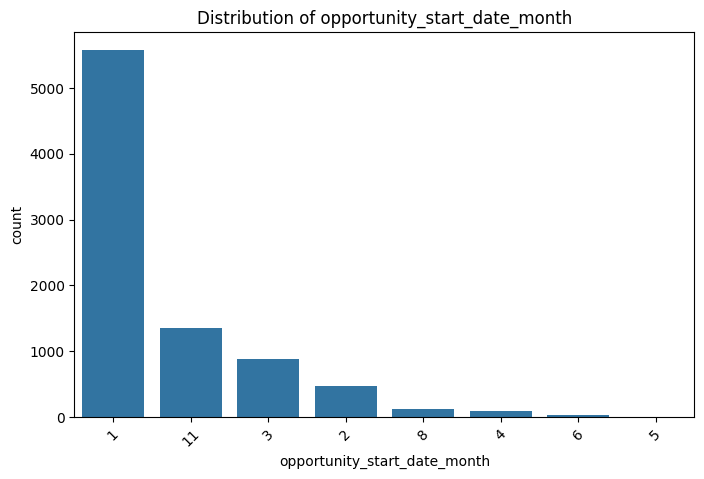

Number of unique values in opportunity_start_date_month: 8
Unique values in opportunity_start_date_month: [11  1  2  3  4  6  8  5]
The most frequent value in opportunity_start_date_month is: 1
Percentage distribution for opportunity_start_date_month:
opportunity_start_date_month
1     65.263775
11    15.814771
3     10.398593
2      5.603751
8      1.371630
4      1.078546
6      0.375147
5      0.093787
Name: proportion, dtype: float64
The data type of opportunity_start_date_month is: int64


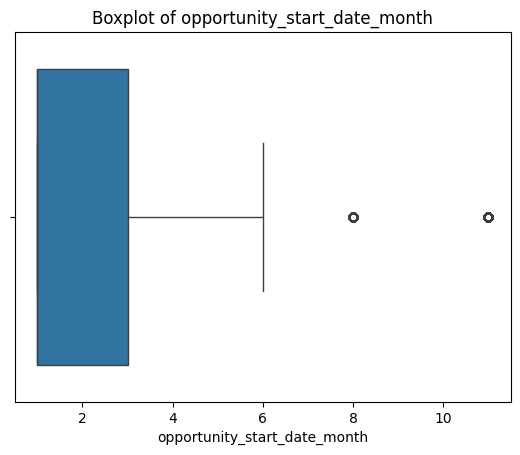

In [ ]:
# Call the function to analyze the 'opportunity_start_date_month' column
analyzeing(df, 'opportunity_start_date_month')

### Findings for the Column: `opportunity_start_date_month`

1. **Missing Values**:
   - There are **no missing values** in the `opportunity_start_date_month` column, ensuring complete data for all records.

2. **Value Counts**:
   - The `opportunity_start_date_month` column contains 8 unique values:
     - **1 (January)**: 5,567 records
     - **11 (November)**: 1,349 records
     - **3 (March)**: 887 records
     - **2 (February)**: 478 records
     - **8 (August)**: 117 records
     - **4 (April)**: 92 records
     - **6 (June)**: 32 records
     - **5 (May)**: 8 records

3. **Unique Values**:
   - There are **8 unique values** in this column: **1, 2, 3, 4, 5, 6, 8, 11**.

4. **Mode** (Most Frequent Value):
   - The most frequent value (mode) in this column is **1 (January)**, with **5,567** records.

5. **Percentage Distribution**:
   - **1 (January)**: **65.26%** of the records.
   - **11 (November)**: **15.81%** of the records.
   - **3 (March)**: **10.40%** of the records.
   - **2 (February)**: **5.60%** of the records.
   - **8 (August)**: **1.37%** of the records.
   - **4 (April)**: **1.08%** of the records.
   - **6 (June)**: **0.38%** of the records.
   - **5 (May)**: **0.09%** of the records.

6. **Data Type**:
   - The `opportunity_start_date_month` column is of type **int64**, indicating that it contains integer values representing the months.

### Key Observations:
- The majority of opportunities (65.26%) are scheduled to start in **January (Month 1)**.
- **November (Month 11)** and **March (Month 3)** have notable proportions of opportunities starting in those months, with **15.81%** and **10.40%** respectively.
- Months like **May (Month 5)**, **June (Month 6)**, and **August (Month 8)** have significantly fewer opportunities, with **May** having the least at **0.09%**.

### Insights:
- The dataset suggests that the start of the year (especially **January**) is a popular time for opportunities, with a significant number of opportunities starting in **November** and **March**.

<hr />

### opportunity_start_date_day

Missing values in opportunity_start_date_day: 0
Value Counts for opportunity_start_date_day:
opportunity_start_date_day
8     4991
3     1349
22     499
20     340
28     299
17     262
21     253
5      153
15     110
19     106
4       49
30      43
18      36
6       32
31       8
Name: count, dtype: int64


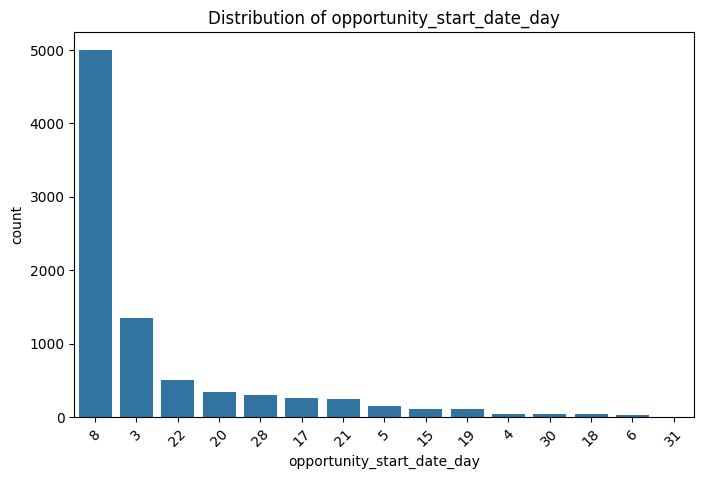

Number of unique values in opportunity_start_date_day: 15
Unique values in opportunity_start_date_day: [ 3  8 22 19  5 18  4 20 30  6 21 31 17 15 28]
The most frequent value in opportunity_start_date_day is: 8
Percentage distribution for opportunity_start_date_day:
opportunity_start_date_day
8     58.511137
3     15.814771
22     5.849941
20     3.985932
28     3.505275
17     3.071512
21     2.966002
5      1.793669
15     1.289566
19     1.242673
4      0.574443
30     0.504103
18     0.422040
6      0.375147
31     0.093787
Name: proportion, dtype: float64
The data type of opportunity_start_date_day is: int64


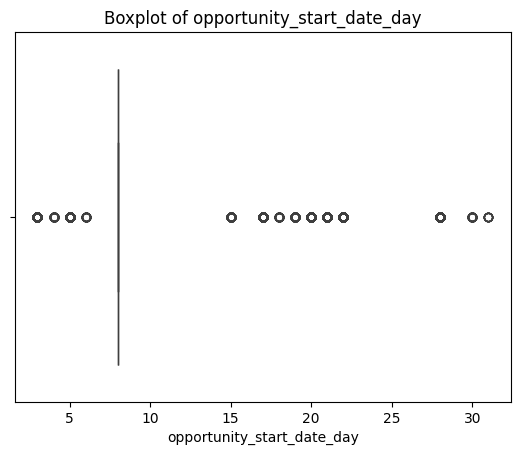

In [ ]:
# Call the function to analyze the 'opportunity_start_date_day' column
analyzeing(df, 'opportunity_start_date_day')

### Findings for the Column: `opportunity_start_date_day`

1. **Missing Values**:
   - There are **no missing values** in the `opportunity_start_date_day` column, meaning all records have a valid day for the opportunity start date.

2. **Value Counts**:
   - The `opportunity_start_date_day` column contains 15 unique values:
     - **8**: 4,991 records
     - **3**: 1,349 records
     - **22**: 499 records
     - **20**: 340 records
     - **28**: 299 records
     - **17**: 262 records
     - **21**: 253 records
     - **5**: 153 records
     - **15**: 110 records
     - **19**: 106 records
     - **4**: 49 records
     - **30**: 43 records
     - **18**: 36 records
     - **6**: 32 records
     - **31**: 8 records

3. **Unique Values**:
   - There are **15 unique values** in this column: **3, 4, 5, 6, 8, 15, 17, 18, 19, 20, 21, 22, 28, 30, 31**.

4. **Mode** (Most Frequent Value):
   - The most frequent value (mode) in this column is **8**, with **4,991** records.

5. **Percentage Distribution**:
   - **8**: **58.51%** of the records.
   - **3**: **15.81%** of the records.
   - **22**: **5.85%** of the records.
   - **20**: **3.99%** of the records.
   - **28**: **3.51%** of the records.
   - **17**: **3.07%** of the records.
   - **21**: **2.97%** of the records.
   - **5**: **1.79%** of the records.
   - **15**: **1.29%** of the records.
   - **19**: **1.24%** of the records.
   - **4**: **0.57%** of the records.
   - **30**: **0.50%** of the records.
   - **18**: **0.42%** of the records.
   - **6**: **0.38%** of the records.
   - **31**: **0.09%** of the records.

6. **Data Type**:
   - The `opportunity_start_date_day` column is of type **int64**, indicating that it contains integer values representing the days of the month.

### Key Observations:
- **8** is the most common day for opportunities to start, comprising **58.51%** of the total records.
- **3** is the second most frequent day, representing **15.81%** of the records.
- Days such as **4, 6, 30, 31** have very few records, with **31** being the least frequent at just **0.09%** of the total.

### Insights:
- The majority of opportunities start on **day 8**, suggesting a potential preference for this day for opportunity initiation.
- There is a notable distribution of opportunities across multiple days, with certain days like **15, 19, 4** having relatively fewer entries.

<hr />

### engagement_time

Missing values in engagement_time: 0
Value Counts for engagement_time:
engagement_time
 16     104
-17      97
 7       91
 21      89
 19      88
       ... 
 355      1
-202      1
 379      1
 358      1
 65       1
Name: count, Length: 695, dtype: int64


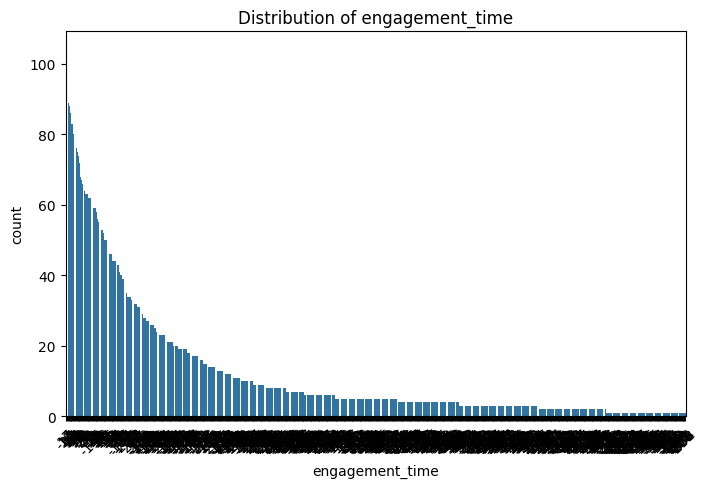

Number of unique values in engagement_time: 695
Unique values in engagement_time: [ 223  179  189  340   64   54  261  202  409  305   88  447    7  150
  362  278  302  146  248  350  213  187   -4  459  134   55  211  143
  289  462  224  429  371  294  281  131  291  263  117  -24  142  196
  322  135  440   56  128  304  245  475  288  141  124  290  130  225
  252  226  464  308  445  197  465  163  144  222  227  220  293  228
  110  382   20   52   86  473  453  349  251  127  200  188   53  182
  273   50  313  186  280  229  270  272  417  217  442  242  247  356
  303  195  258  427  474  277   89  452  472  240  471  148  284  490
  314  266  112  316  344  312  192  160  198  282  177  118  392  323
  274  145   59  264  221  238  300  307  209  381  255  369  139  402
  203  232  438  384  399  250  230  116  364  254  337  348  401  470
  275  466  137  215  421  149  237  434  320  180  183  216  285   47
  265   46  199  279  184  468  460  342  178  398  133  292  301 

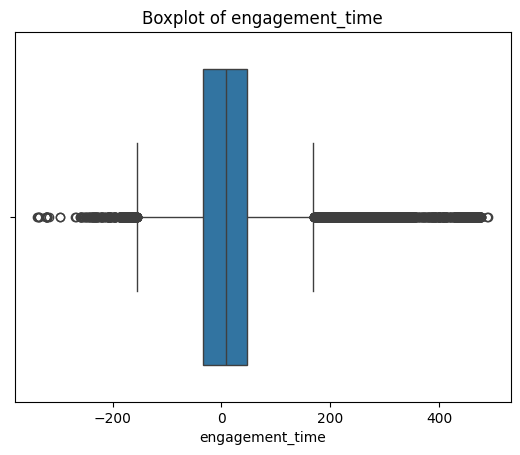

In [ ]:
# Call the function to analyze the 'engagement_time' column
analyzeing(df, 'engagement_time')

In [ ]:
# Count the number of negative values in engagement_time
negative_values_count = (df['engagement_time'] < 0).sum()
print(f'Number of negative values in engagement_time: {negative_values_count}')


Number of negative values in engagement_time: 3718


### Findings for the Column: `engagement_time`

1. **Missing Values**:
   - There are **no missing values** in the `engagement_time` column, meaning every record has a valid engagement time value.

2. **Value Counts**:
   - The `engagement_time` column contains **695 unique values**, ranging from **negative** to **positive** numbers.
   - Some of the common values are:
     - **16**: 104 occurrences
     - **-17**: 97 occurrences
     - **7**: 91 occurrences
     - **21**: 89 occurrences
     - **19**: 88 occurrences
     - Other values appear less frequently, with many occurring only once (such as 355, -202, 379, 358, 65, etc.).

3. **Unique Values**:
   - The column has **695 unique values**, which indicates significant variation in engagement time, with both positive and negative values included.

4. **Mode** (Most Frequent Value):
   - The most frequent value (mode) in this column is **16**, which appears **104 times**.

5. **Percentage Distribution**:
   - **16**: **1.22%** of the records.
   - **-17**: **1.14%** of the records.
   - **7**: **1.07%** of the records.
   - **21**: **1.04%** of the records.
   - **19**: **1.03%** of the records.
   - Other values are more sparse, with many occurring in **less than 0.02%** of the records, such as **355**, **-202**, and **379**, all with **0.01%** occurrences.

6. **Data Type**:
   - The `engagement_time` column is of type **int64**, indicating it contains integer values.

### Key Observations:
- The column contains **both negative and positive values**, which could indicate different interpretations of engagement time (e.g., positive values could indicate active engagement, and negative values might represent disengagement or errors).
- The most frequent value is **16**, but there is a wide range of values, with many occurring only once or twice.

### Insights:
- The column has a **wide distribution** of values, but certain values like **16, -17, 7** are more common.
- Negative values (e.g., **-17, -4**) might need further investigation, as they could represent special cases, errors, or non-standard representations of engagement time.

<hr />

### duration_age_interaction

Missing values in duration_age_interaction: 0
Value Counts for duration_age_interaction:
duration_age_interaction
1512     644
1449     509
0        484
1575     431
1386     350
        ... 
16728      1
28458      1
15334      1
35991      1
1440       1
Name: count, Length: 461, dtype: int64


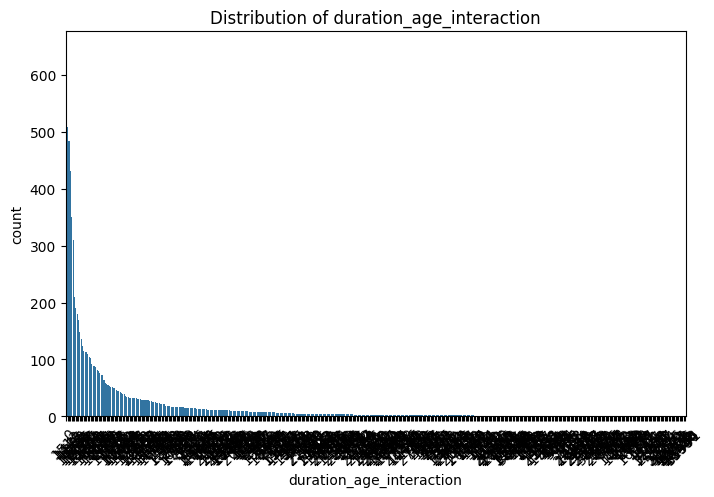

Number of unique values in duration_age_interaction: 461
Unique values in duration_age_interaction: [14496 13892 15100  4844 10872 11476 15704 16308 12080 18120  4325 19932
 13288 12684 17516 16912  6920 18724 20536 21140  4671  3806 24764  6747
 10268 22348 25972  6055  4152  5017 32012  8456  3979 23556 28992 25368
 19328  4498  9060 24160  3633  3460 22952  5709 21744 30200  3287  7612
 28388  6574  9664  3114 26576  5190 29596  5882 -4695 -5947 -8138 -7825
  1512  1519  1575  1764  1638  1386   735  1449   882  1008  1134  1260
  2142  1197  2016  1701   931  1953   156  1176  1323  -175   174  1029
  -168  1071   150  2961  1225   138  2457  1127  1078  -456  1890  3024
   162  1470  1827   462   357  2331   198  1372  1274  2268   378   504
   483   132   525  2205  2079   114  -600  -552  1421   180   567  -480
  2520  -576  2709   441  2470  2280  2375  2755  2660  3325  2185  2090
  2565  2945  1900  1330  1995  5035  5415  1805  1425  2850  3800  3040
  3230  3135  1710  4560

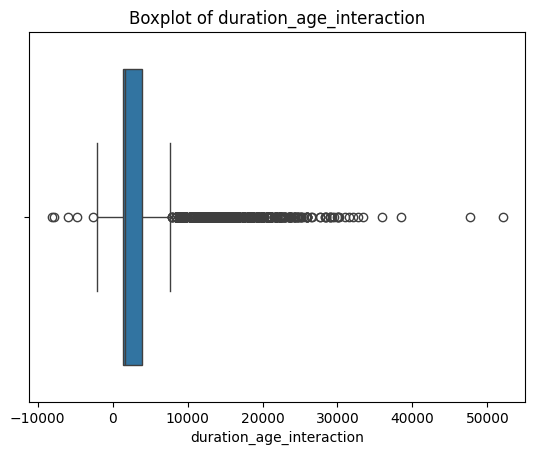

In [ ]:
# Call the function to analyze the 'duration_age_interaction' column
analyzeing(df, 'duration_age_interaction')

In [ ]:
# Count the number of negative values in duration_age_interaction
negative_values_count = (df['duration_age_interaction'] < 0).sum()
print(f'Number of negative values in duration_age_interaction: {negative_values_count}')


Number of negative values in duration_age_interaction: 175


### Findings for the Column: `duration_age_interaction`

1. **Missing Values**:
   - There are **no missing values** in the `duration_age_interaction` column, so all records have a valid value.

2. **Value Counts**:
   - The `duration_age_interaction` column contains **461 unique values**.
   - Some of the most common values are:
     - **1512**: 644 occurrences
     - **1449**: 509 occurrences
     - **0**: 484 occurrences
     - **1575**: 431 occurrences
     - **1386**: 350 occurrences
     - Other values appear less frequently, with many occurring only once, such as **16728**, **28458**, **15334**, **35991**, **1440**, etc.

3. **Unique Values**:
   - There are **461 unique values**, with a large variation in the values themselves.
   - Some of the more extreme values include **negative** values (e.g., **-4695**, **-5947**, **-8138**) and **large positive values** (e.g., **52041**, **47709**, **38502**).

4. **Mode** (Most Frequent Value):
   - The most frequent value (mode) is **1512**, which appears **644 times**.

5. **Percentage Distribution**:
   - **1512**: **7.55%** of the records.
   - **1449**: **5.97%** of the records.
   - **0**: **5.67%** of the records.
   - **1575**: **5.05%** of the records.
   - **1386**: **4.10%** of the records.
   - Other values occur with a much lower frequency, many with occurrences below **0.02%**, such as **16728**, **28458**, and **15334**.

6. **Data Type**:
   - The `duration_age_interaction` column is of type **int64**, indicating it contains integer values.

### Key Observations:
- The column includes **both positive and negative values**, as well as some **zero values**.
- The most frequent value is **1512**, but there is a wide range of values with some occurring just once or very few times.
- The negative values may need further exploration to understand their significance. These could represent specific cases or issues in data recording.

### Insights:
- The distribution of values suggests that **0**, **1512**, and **1449** represent common categories or important thresholds, while other values are less frequent.
- The presence of **negative values** could imply that some of the data represents special cases (errors, corrections, etc.), which might require more investigation.

<hr />

### engagement_score

Missing values in engagement_score: 0
Value Counts for engagement_score:
engagement_score
39.3     56
35.7     50
38.7     49
35.1     47
37.8     46
         ..
333.4     1
294.9     1
205.5     1
277.2     1
4.8       1
Name: count, Length: 2255, dtype: int64


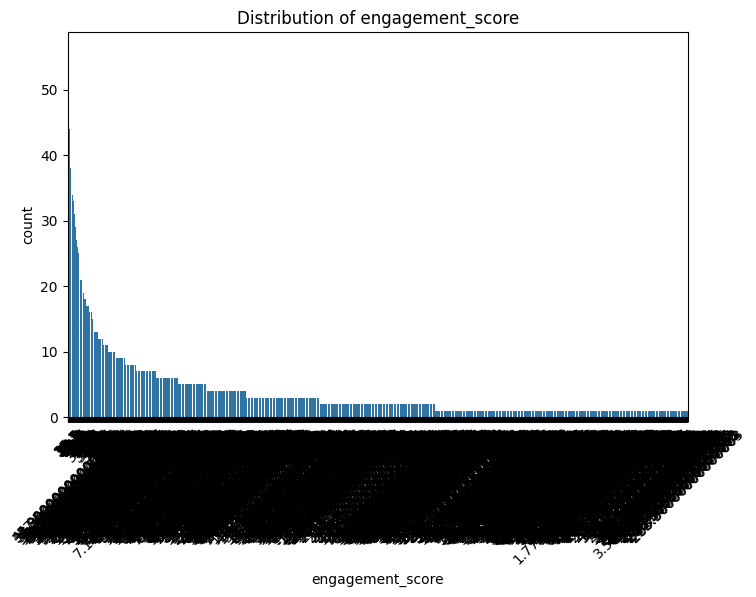

Number of unique values in engagement_score: 2255
Unique values in engagement_score: [315.7 302.5 305.2 ...  -1.8   1.2   4.8]
The most frequent value in engagement_score is: 39.3
Percentage distribution for engagement_score:
engagement_score
39.3     0.656506
35.7     0.586166
38.7     0.574443
35.1     0.550996
37.8     0.539273
           ...   
333.4    0.011723
294.9    0.011723
205.5    0.011723
277.2    0.011723
4.8      0.011723
Name: proportion, Length: 2255, dtype: float64
The data type of engagement_score is: float64


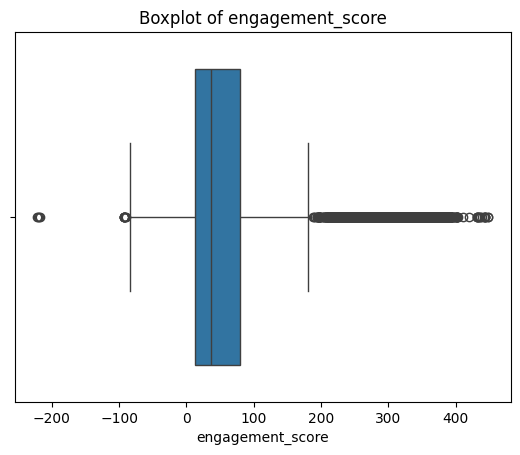

In [ ]:
# Call the function to analyze the 'engagement_score' column
analyzeing(df, 'engagement_score')

In [ ]:
# Count the number of negative values in engagement_score
negative_values_count = (df['engagement_score'] < 0).sum()
print(f'Number of negative values in engagement_score: {negative_values_count}')


Number of negative values in engagement_score: 1295


### Findings for `engagement_score` Column:

1. **Missing Values**:
   - There are no missing values in the `engagement_score` column.

2. **Value Counts**:
   - There are **2,255 unique values** in the `engagement_score` column.
   - The most frequent value is **39.3**, with **56** occurrences.
   - Some values appear only once, such as **333.4**, **294.9**, **205.5**, etc., indicating these scores might be rare.

3. **Unique Values**:
   - The column contains **2255 unique values**, and these values are floating-point numbers.
   - Some values appear very infrequently, such as **4.8** (appearing once).

4. **Percentage Distribution**:
   - The most frequent value **39.3** accounts for **0.6565%** of the total observations.
   - The distribution shows many values occurring only once, leading to a large number of unique values.

5. **Data Type**:  
   - The data type of the `engagement_score` column is **float64**, indicating numeric values.

---

### Potential Considerations for Cleaning:

- **Outliers**:
   - The column contains some small values (e.g., **1.2**, **4.8**) and large values (e.g., **333.4**, **277.2**).

- **Rare Values**:
   - A large number of unique values appear only once. These values might not contribute significantly to the analysis.

<hr />


# Univariate Analysis

### Visualizing the distribution in categorical columns (bar chart)

In [ ]:
# function to visualize individual categorical columns
def visualize_categorical_column(column_name):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column_name, palette="viridis")
    plt.title(f"Distribution of {column_name}")
    plt.show()

<ipython-input-43-748d3c7e5158>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column_name, palette="viridis")


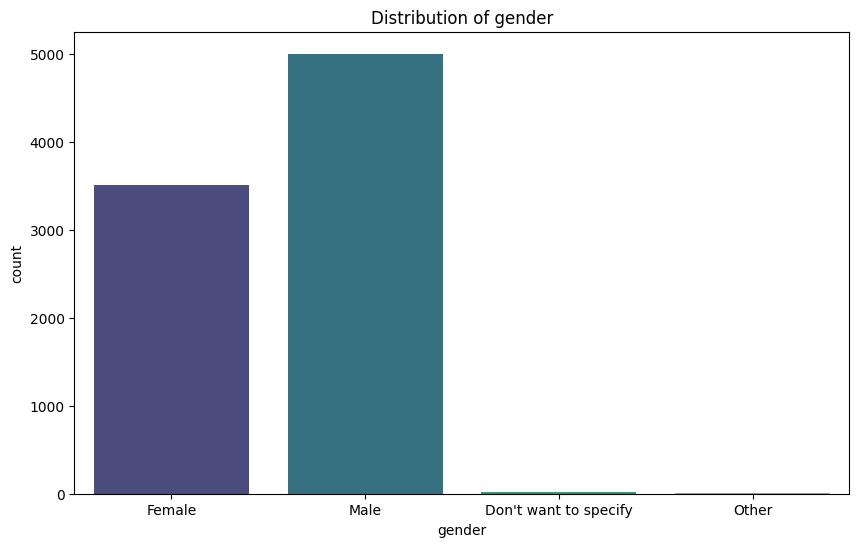

In [ ]:
# call function to visualize only gender
visualize_categorical_column('gender')

<ipython-input-43-748d3c7e5158>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column_name, palette="viridis")


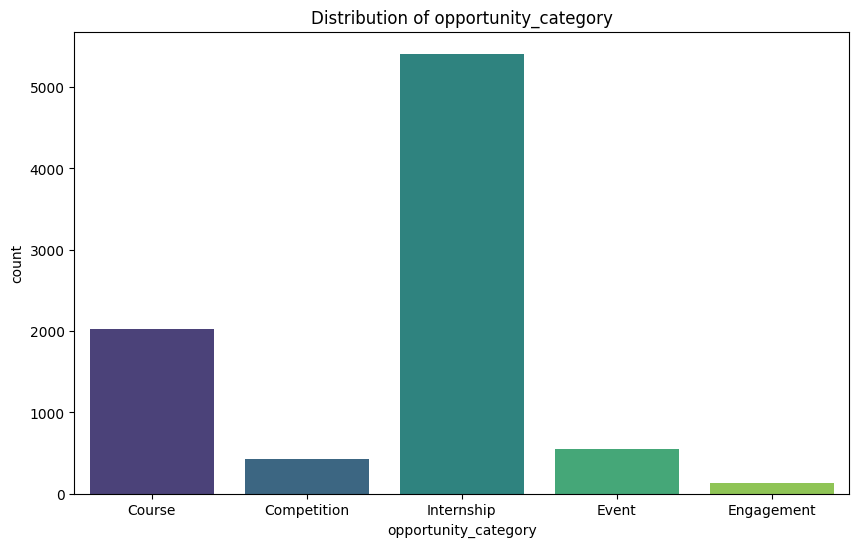

In [ ]:
# visualize opportunity category
visualize_categorical_column('opportunity_category')

<ipython-input-46-f7c97822d3fe>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")  # Create count plot for each categorical variable


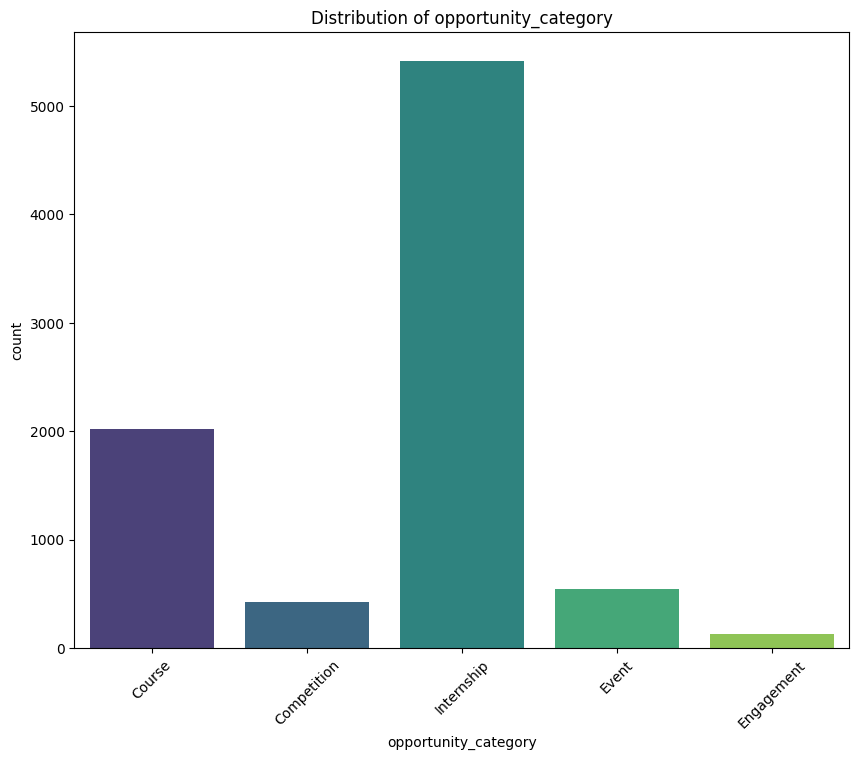

<ipython-input-46-f7c97822d3fe>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")  # Create count plot for each categorical variable


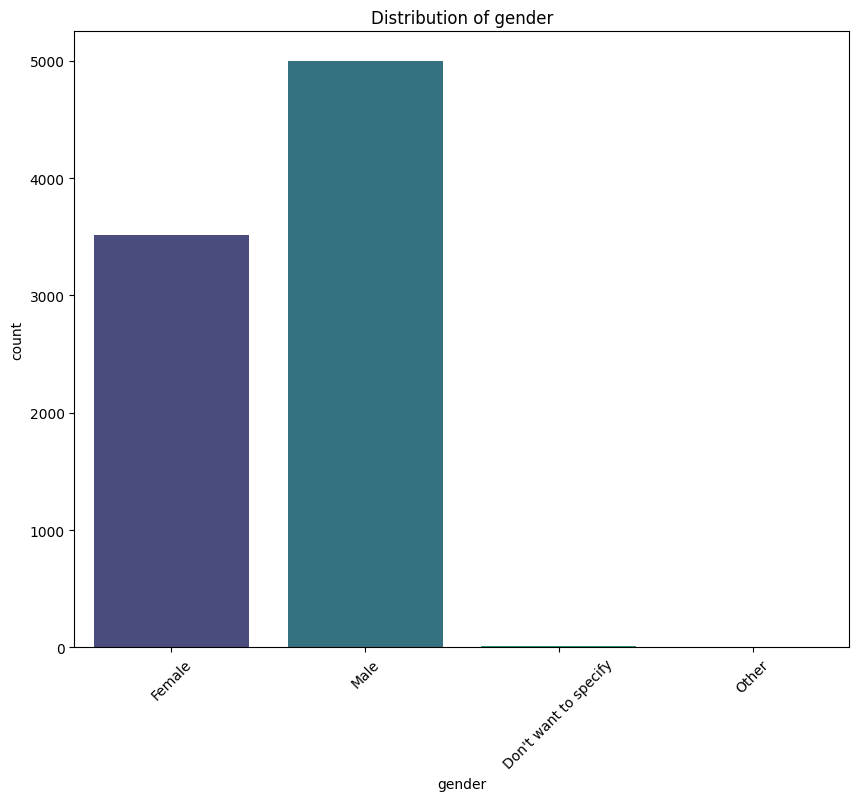

<ipython-input-46-f7c97822d3fe>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")  # Create count plot for each categorical variable


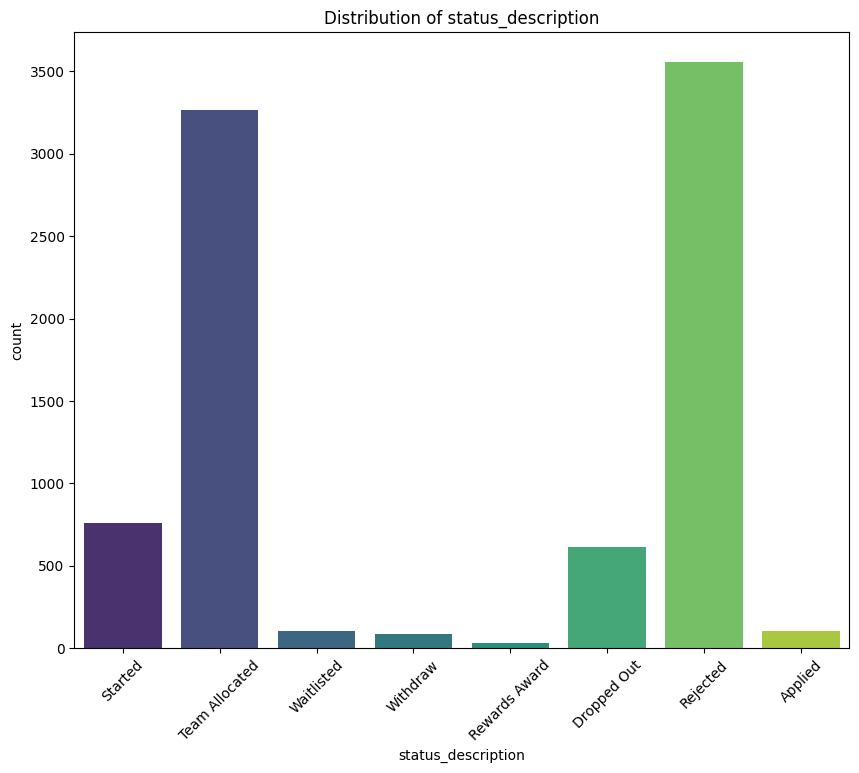

In [ ]:
# visualizing all categorical columns
# Select categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Drop columns
categorical_columns = categorical_columns.drop(['first_name', 'institution_name', 'opportunity_id',
                                                'current/intended_major','country', 'opportunity_name'])

# Plot each categorical column
for col in categorical_columns:
    plt.figure(figsize=(10, 8))  # Set figure size
    sns.countplot(data=df, x=col, palette="viridis")  # Create count plot for each categorical variable
    plt.title(f"Distribution of {col}")  # Add title
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()  # Show the plot



### Visualizing the distribution in numerical Columns (histogram)

In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['status_code', 'age', 'opportunity_duration',
       'learner_signup_datetime_year', 'learner_signup_datetime_month',
       'learner_signup_datetime_day', 'opportunity_end_date_year',
       'opportunity_end_date_month', 'opportunity_end_date_day',
       'date_of_birth_year', 'date_of_birth_month', 'date_of_birth_day',
       'entry_created_at_year', 'entry_created_at_month',
       'entry_created_at_day', 'apply_date_year', 'apply_date_month',
       'apply_date_day', 'opportunity_start_date_year',
       'opportunity_start_date_month', 'opportunity_start_date_day',
       'engagement_time', 'duration_age_interaction', 'engagement_score'],
      dtype='object')

In [ ]:
# define function to visualize individual numerical column
def visualize_numerical_column(column_name):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column_name], bins=30, kde=True, color="blue")
    plt.title(f"Distribution of {column_name}")
    plt.xlabel(column_name)
    plt.ylabel("Frequency")
    plt.show()

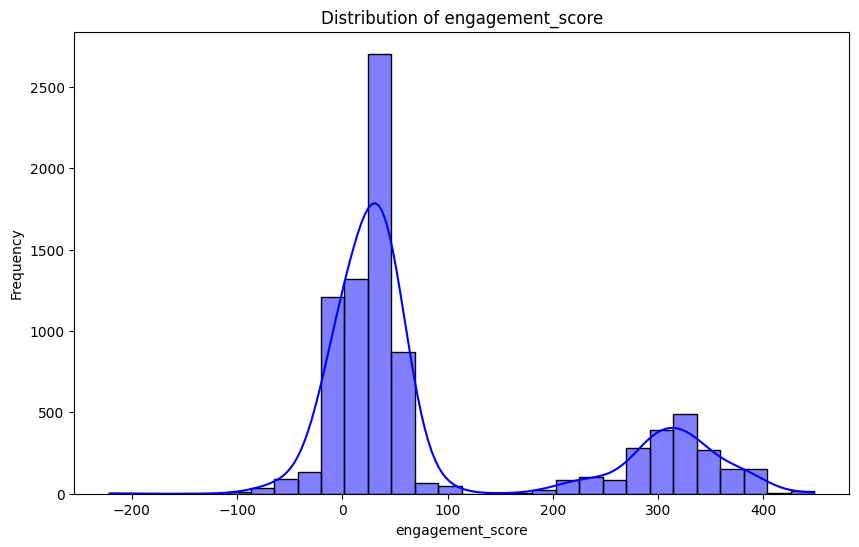

In [ ]:
# call function to visualize only engagement score
visualize_numerical_column('engagement_score')

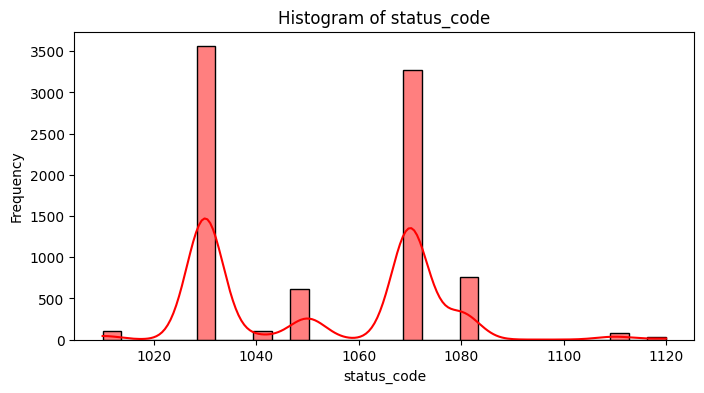

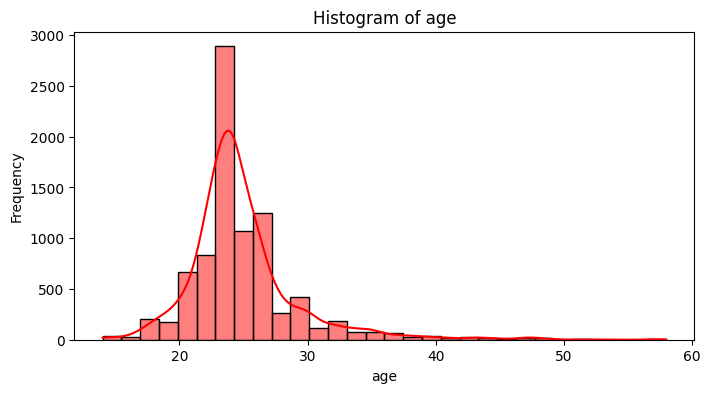

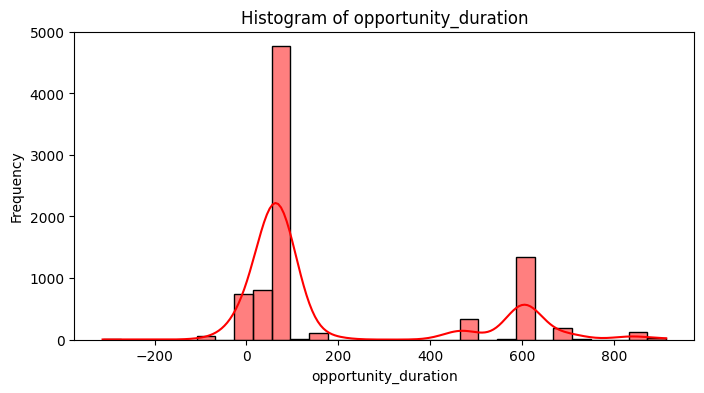

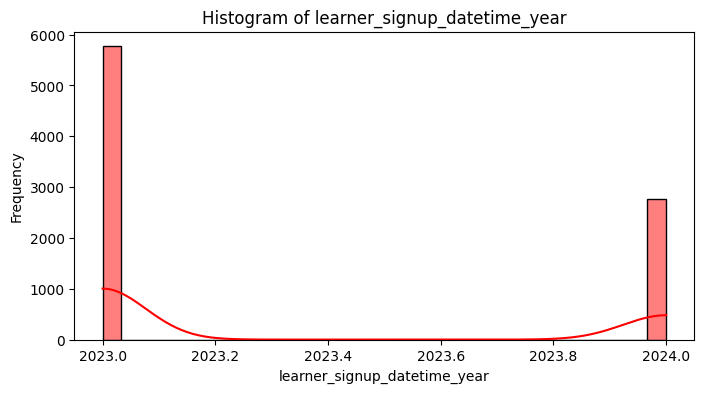

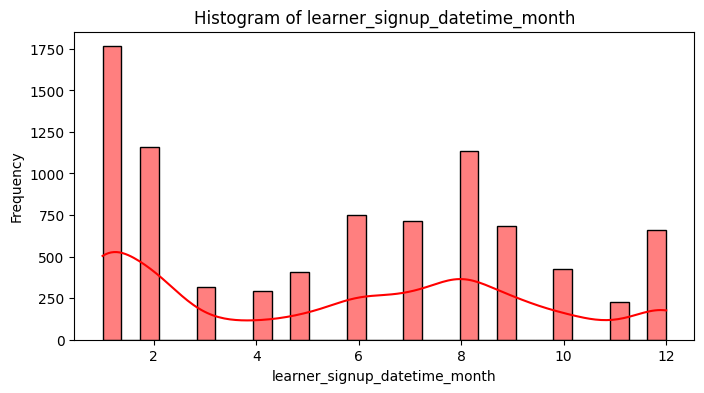

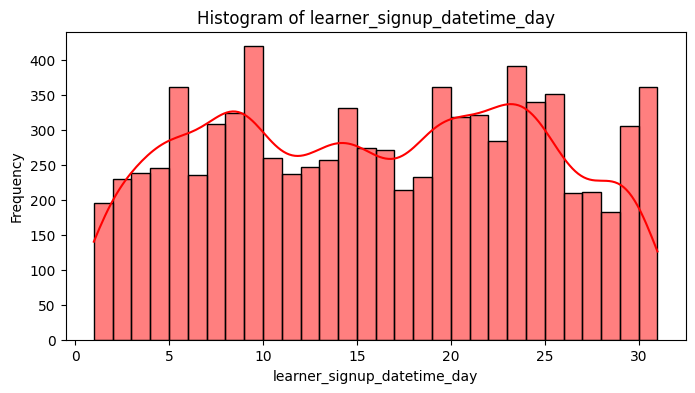

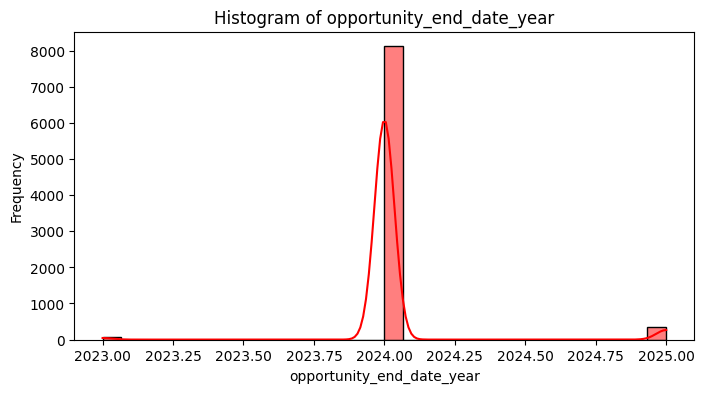

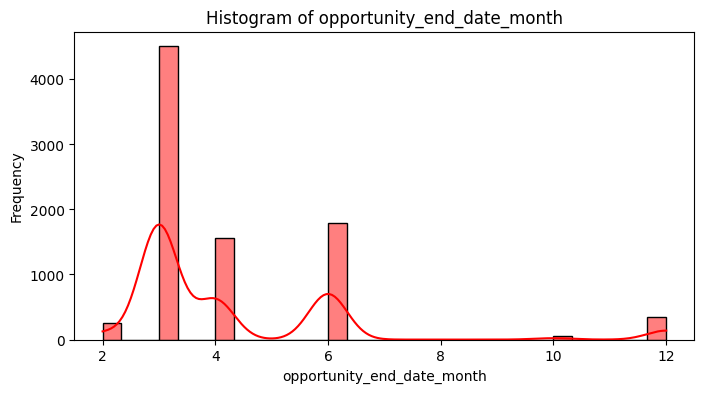

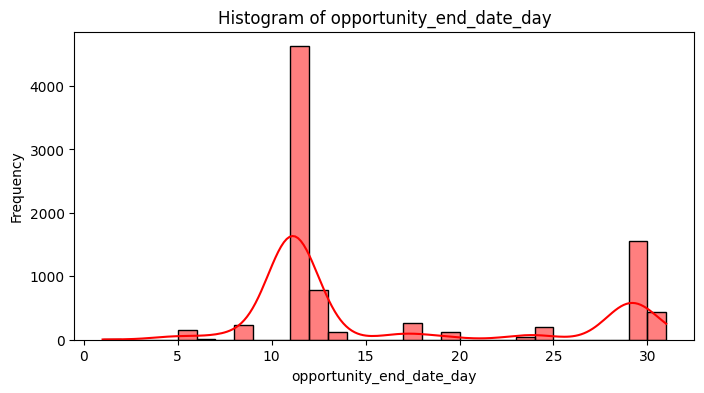

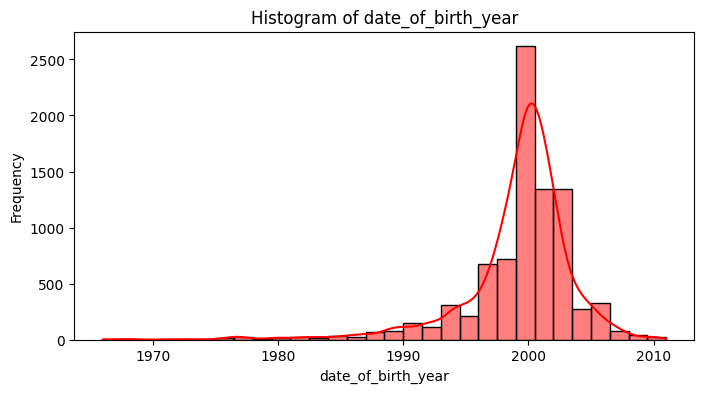

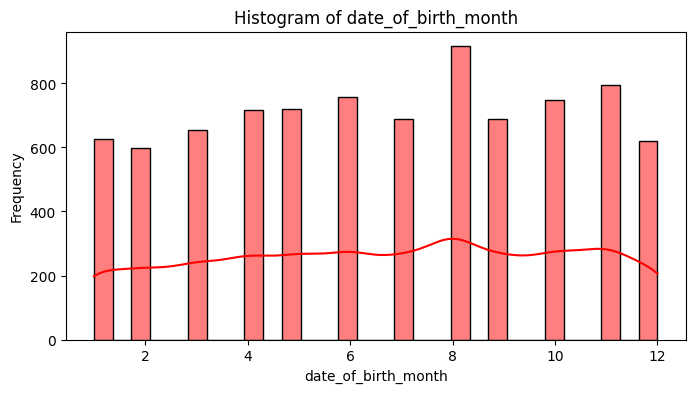

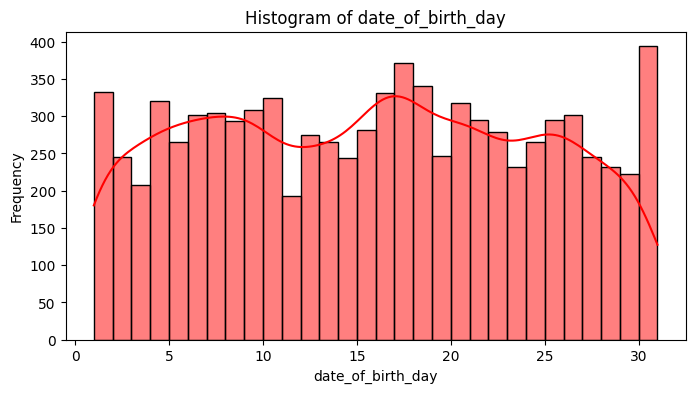

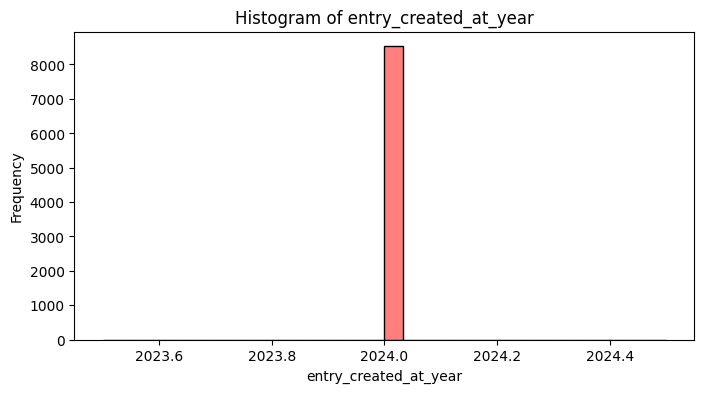

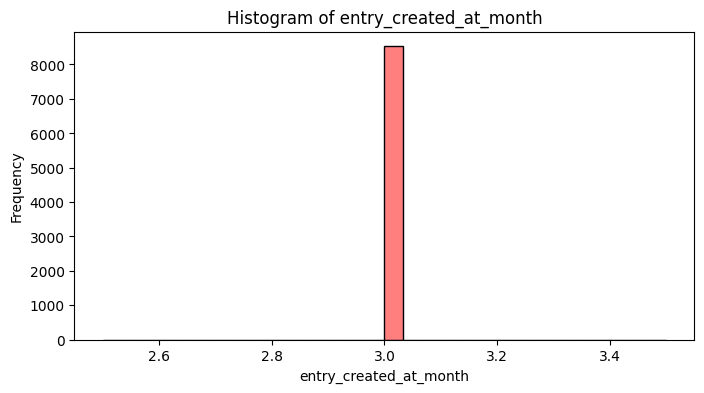

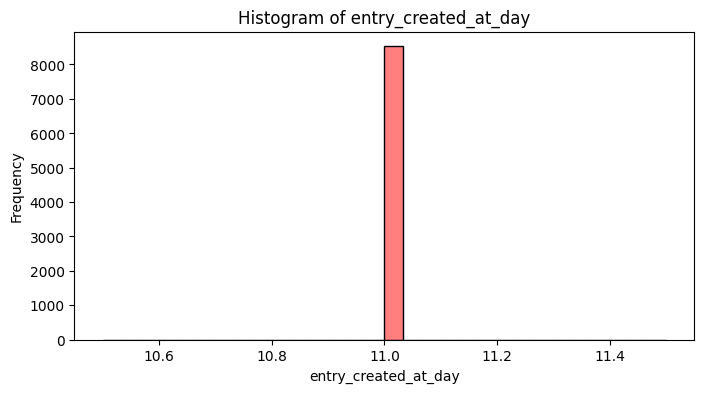

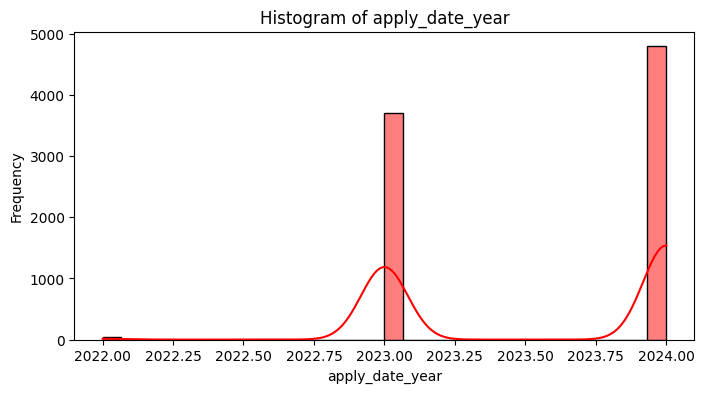

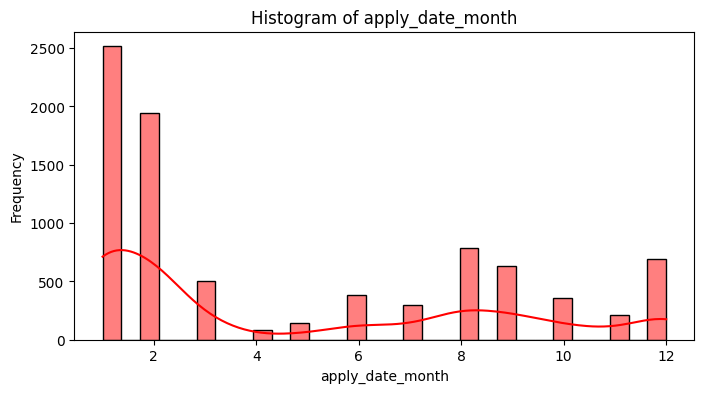

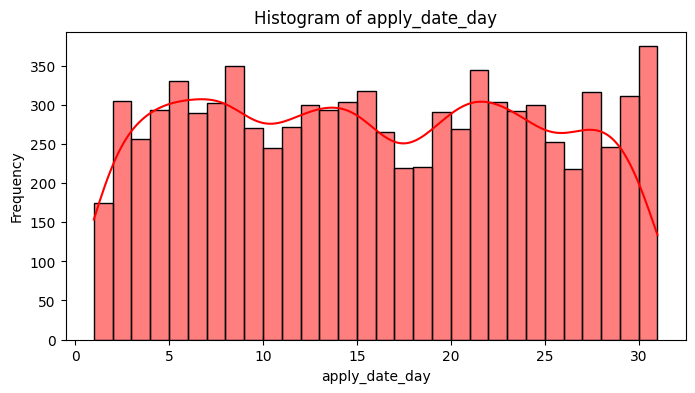

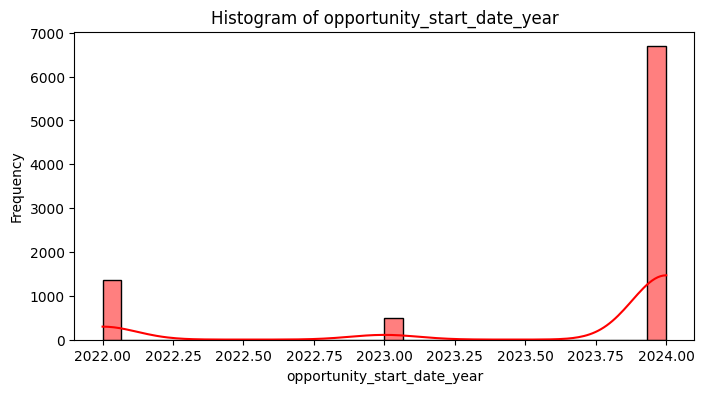

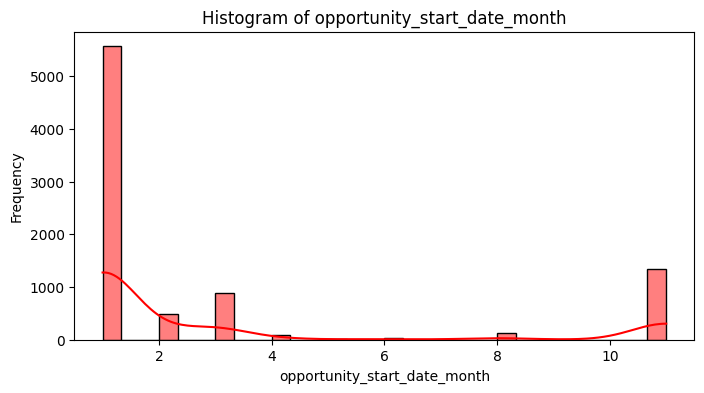

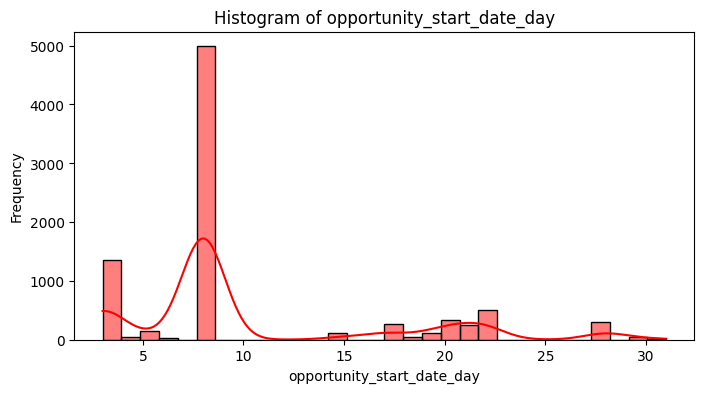

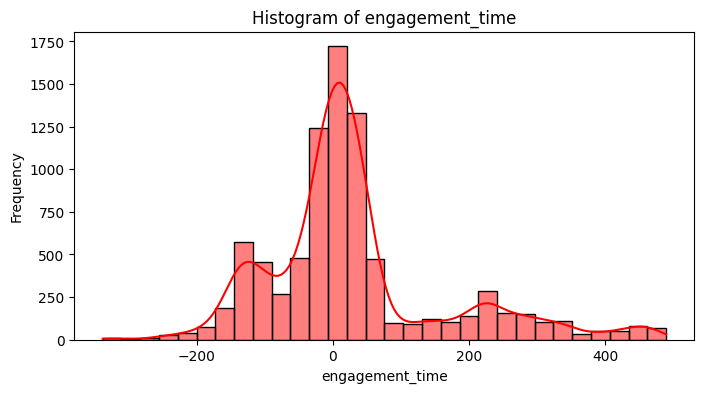

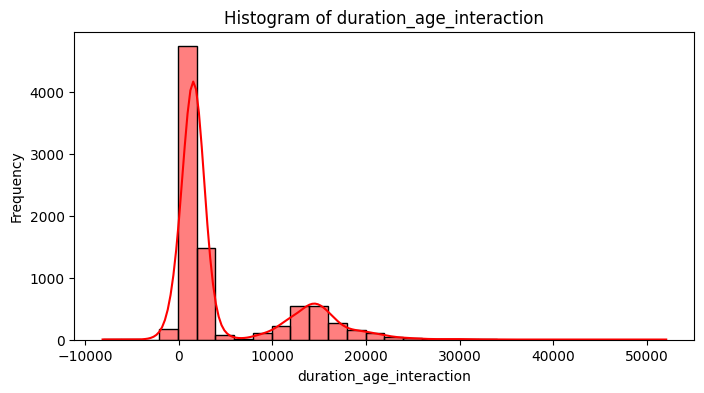

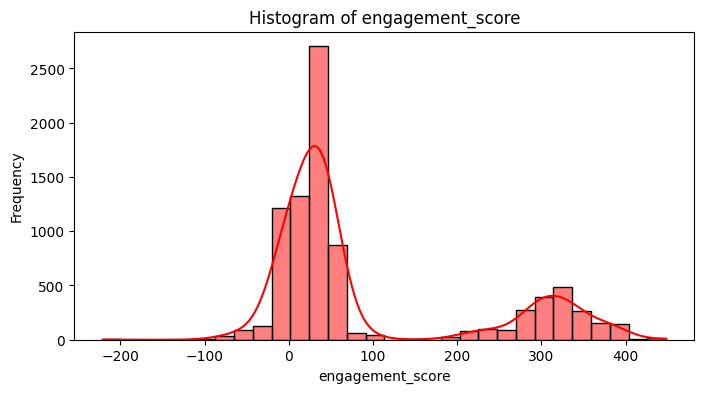

In [ ]:
# Histogram for all numerical columns

# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Plot each numerical column separately
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=30, kde=True, color="red")  # Add KDE for smoothness
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()



### Detecting Outliers

In [ ]:
numerical_columns

Index(['status_code', 'age', 'opportunity_duration',
       'learner_signup_datetime_year', 'learner_signup_datetime_month',
       'learner_signup_datetime_day', 'opportunity_end_date_year',
       'opportunity_end_date_month', 'opportunity_end_date_day',
       'date_of_birth_year', 'date_of_birth_month', 'date_of_birth_day',
       'entry_created_at_year', 'entry_created_at_month',
       'entry_created_at_day', 'apply_date_year', 'apply_date_month',
       'apply_date_day', 'opportunity_start_date_year',
       'opportunity_start_date_month', 'opportunity_start_date_day',
       'engagement_time', 'duration_age_interaction', 'engagement_score'],
      dtype='object')

In [ ]:
# defining a function to visualize outliers
def visualize_outliers(column_name):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column_name], color="orange")
    plt.title(f"Box Plot of {column_name}")

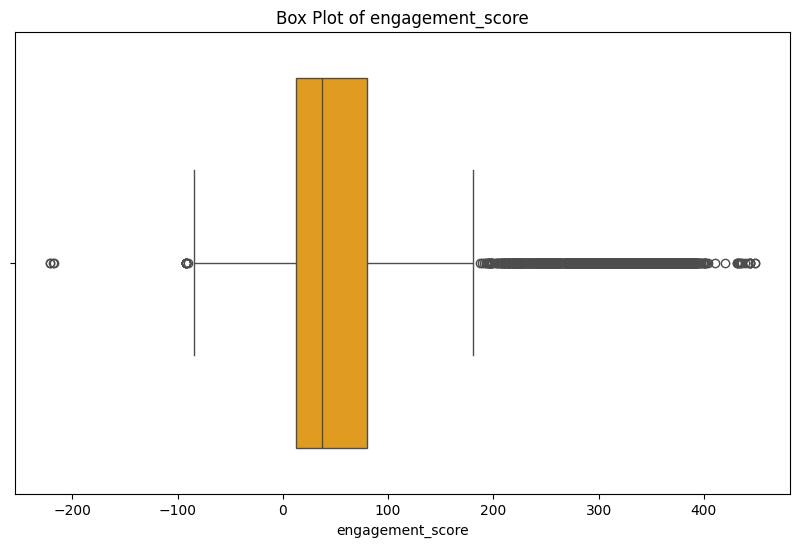

In [ ]:
visualize_outliers('engagement_score')

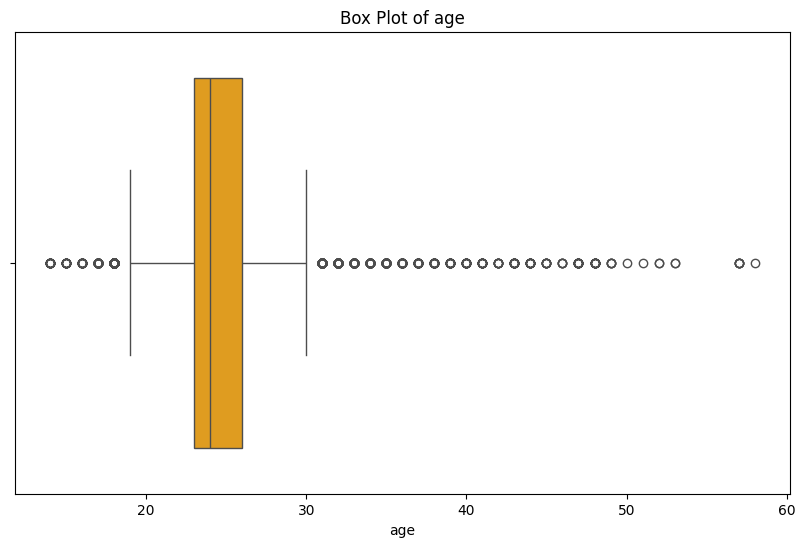

In [ ]:
# detect outliers in age column
visualize_outliers('age')

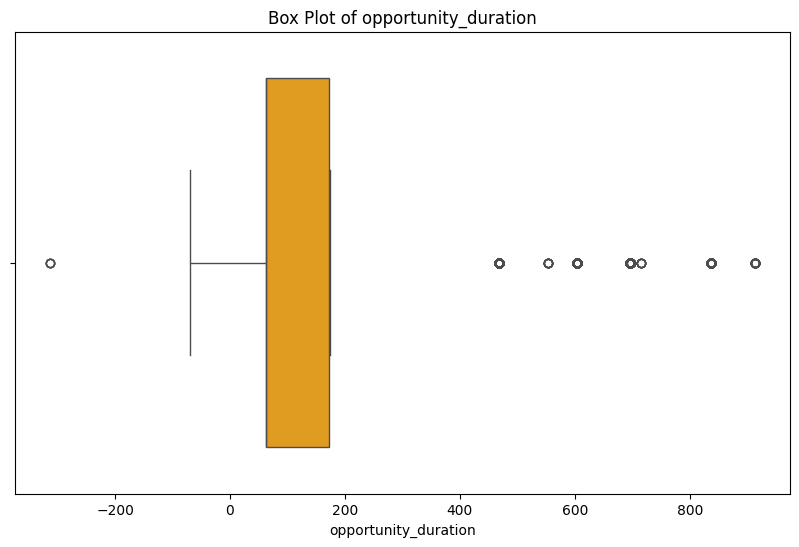

In [ ]:
# detect outliers in opportunity duration
visualize_outliers('opportunity_duration')

In [ ]:
df['engagement_time'].unique()

array([ 223,  179,  189,  340,   64,   54,  261,  202,  409,  305,   88,
        447,    7,  150,  362,  278,  302,  146,  248,  350,  213,  187,
         -4,  459,  134,   55,  211,  143,  289,  462,  224,  429,  371,
        294,  281,  131,  291,  263,  117,  -24,  142,  196,  322,  135,
        440,   56,  128,  304,  245,  475,  288,  141,  124,  290,  130,
        225,  252,  226,  464,  308,  445,  197,  465,  163,  144,  222,
        227,  220,  293,  228,  110,  382,   20,   52,   86,  473,  453,
        349,  251,  127,  200,  188,   53,  182,  273,   50,  313,  186,
        280,  229,  270,  272,  417,  217,  442,  242,  247,  356,  303,
        195,  258,  427,  474,  277,   89,  452,  472,  240,  471,  148,
        284,  490,  314,  266,  112,  316,  344,  312,  192,  160,  198,
        282,  177,  118,  392,  323,  274,  145,   59,  264,  221,  238,
        300,  307,  209,  381,  255,  369,  139,  402,  203,  232,  438,
        384,  399,  250,  230,  116,  364,  254,  3

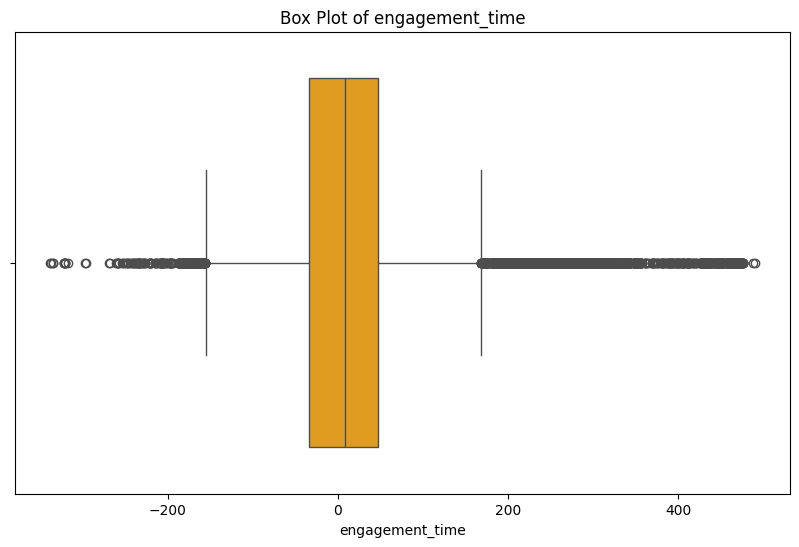

In [ ]:
# detect outliers in engagement time
visualize_outliers('engagement_time')

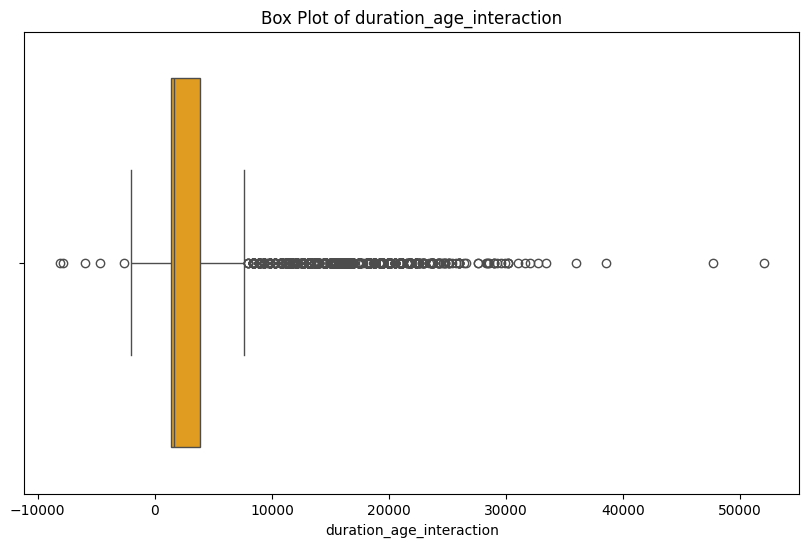

In [ ]:
# detect outliers in duration age interaction
visualize_outliers('duration_age_interaction')

# Bivariate Analysis